<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/rl/openai-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to OpenAI on Colab


## Step 1: Installation for Colab - just execute these cells and do not worry too much

* http://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb 
* https://docs.microsoft.com/en-us/message-passing-interface/microsoft-mpi
* https://nyu-cds.github.io/python-mpi/setup/
* https://medium.com/@kaleajit27/reinforcement-learning-on-google-colab-9cb2e1ef51e


In [1]:
!apt-get install python-opengl -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (486 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 110377 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...


In [2]:
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxmuu1 xauth
The following NEW packages will be installed:
  libxmuu1 xauth xvfb
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 818 kB of archives.
After this operation, 2,374 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxmuu1 amd64 2:1.1.2-2 [9,674 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 xauth amd64 1:1.0.10-1 [24.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.2 [783 kB]
Fetched 818 kB in 1s (684 kB/s)
Selecting previously unselected package libxmuu1:amd64.
(Reading database ... 112732 files and directories currently installed.)
Preparing to unpack .../libxmuu1_2%3a1.1.2-2_amd64.deb ...
Unpacking libxmuu1:amd64 (2:1.1.2-2) ...
Selecting previously unselected package xauth.
Pr

In [3]:
!pip install pyvirtualdisplay
!pip install piglet

  Running setup.py bdist_wheel for pyvirtualdisplay ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/d1/8c/16/1c64227974ae29c687e4cc30fd691d5c0fd40f54446dde99da
  Running setup.py bdist_wheel for EasyProcess ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/b4/c6/e3/c163b04029d8fccfd54b809802640c1af587a01be8d7a04e1a
Successfully built pyvirtualdisplay EasyProcess
    100% |████████████████████████████████| 61kB 3.9MB/s 
    100% |████████████████████████████████| 92kB 9.0MB/s 
  Running setup.py bdist_wheel for piglet ... - \ done
  Stored in directory: /root/.cache/pip/wheels/c7/59/a5/5bd1a35a4a4596714c4c7925a1751e7b1580b6ced363fd7969
Successfully built piglet


In [4]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [5]:
!pip install -e git+https://github.com/openai/baselines#egg=berater

Obtaining berater from git+https://github.com/openai/baselines#egg=berater
  Cloning https://github.com/openai/baselines to ./src/berater
  Running setup.py (path:/content/src/berater/setup.py) egg_info for package berater produced metadata for project name baselines. Fix your #egg=berater fragments.
  Running setup.py develop for baselines


In [6]:
!pip install JSAnimation

  Running setup.py bdist_wheel for JSAnimation ... - done
  Stored in directory: /root/.cache/pip/wheels/3c/c2/b2/b444dffc3eed9c78139288d301c4009a42c0dd061d3b62cead
Successfully built JSAnimation


In [7]:
!pip install gym

In [0]:
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 144)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='once'))

## Step 2: Understanding Standard Environments

The OpenAI gym provides us with a number of environments. You could view then as simulators that 

1. deiliver observations and rewards based on
1. actions executed by an agent who learns to behave well in the simulated world

The environment also defines which actions are allowed (actions space) and how observations look like (observation space). The agent should try to maximize the cumulated reward.

![Learning Cycle](http://gym.openai.com/assets/docs/aeloop-138c89d44114492fd02822303e6b4b07213010bb14ca5856d2d49d6b62d88e53.svg)

Links
* http://gym.openai.com/docs/
* https://github.com/openai/gym


In [9]:
import gym
# env = gym.make('CartPole-v0')
# env = gym.make('MountainCar-v0')
# env = gym.make('Pendulum-v0')

# https://github.com/openai/gym#atari
# http://gym.openai.com/envs/MsPacman-v0/

# env = gym.make('MsPacman-v0') 
env = gym.make('SpaceInvaders-v0')

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [10]:
env.action_space

Discrete(6)

In [11]:
env.observation_space

Box(210, 160, 3)

In [15]:
# Run a demo of the environment
observation = env.reset()
cumulated_reward = 0

frames = []
for t in range(1000):
#     print(observation)
    frames.append(env.render(mode = 'rgb_array'))
    # very stupid agent, just makes a random action within the allowd action space
    action = env.action_space.sample()
#     print("Action: {}".format(t+1))    
    observation, reward, done, info = env.step(action)
#     print(reward)
    cumulated_reward += reward
    if done:
        print("Episode finished after {} timesteps, accumulated reward = {}".format(t+1, cumulated_reward))
        break
env.close()

Episode finished after 821 timesteps, accumulated reward = 155.0



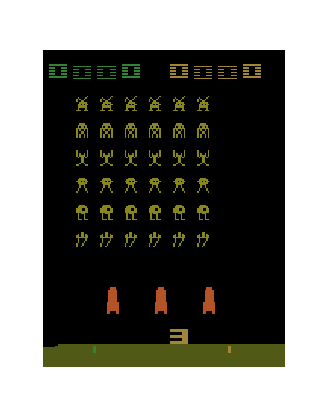
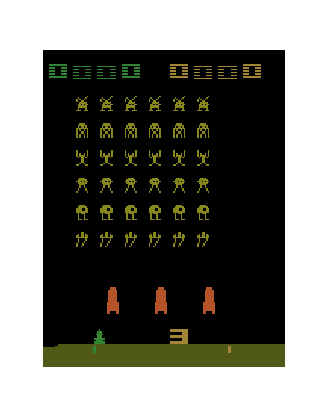
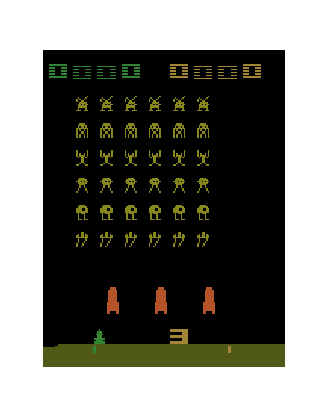
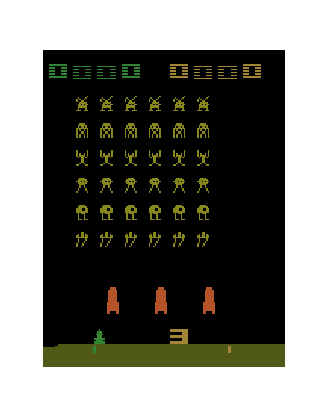
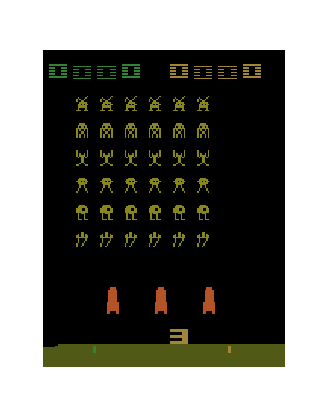
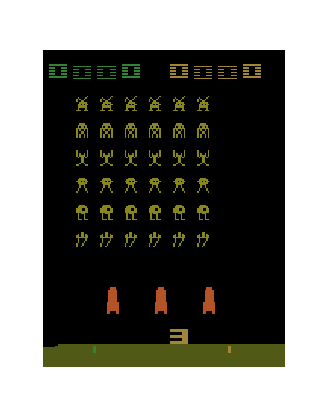
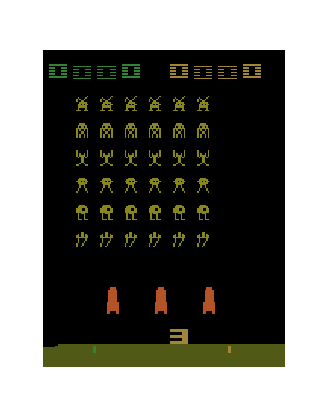
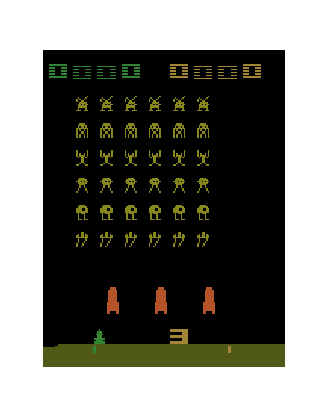
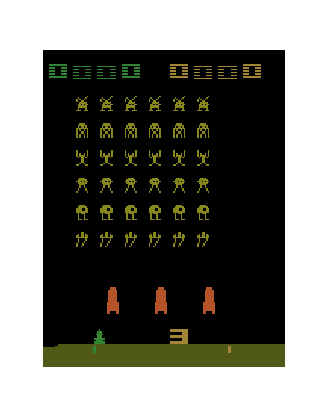
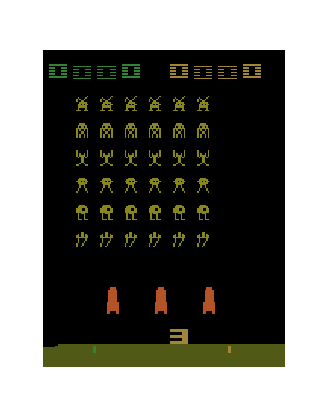
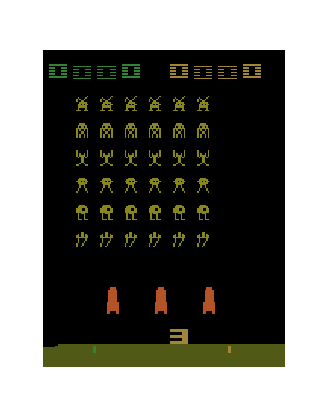
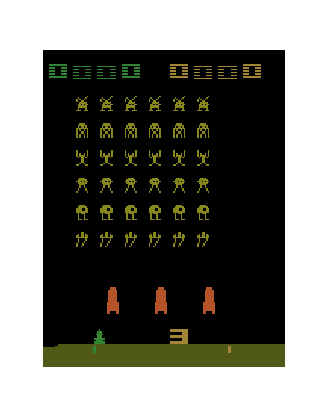
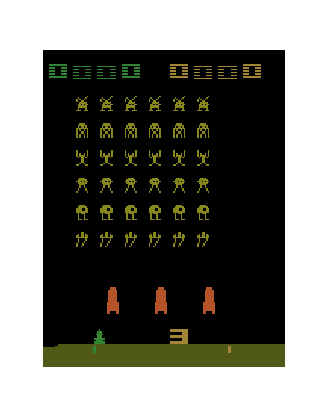
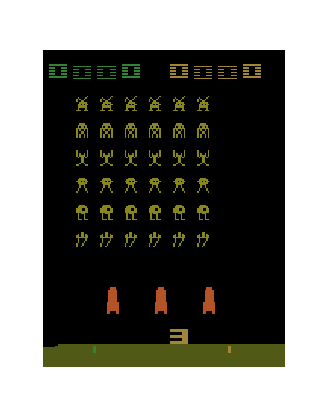
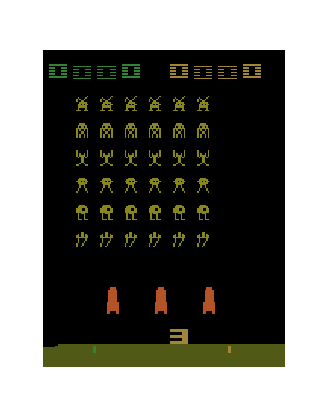
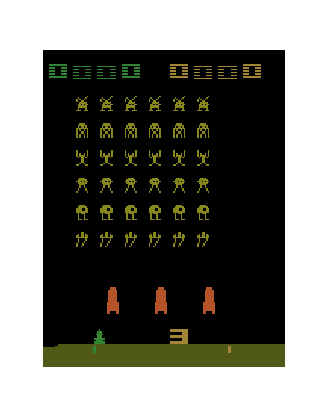
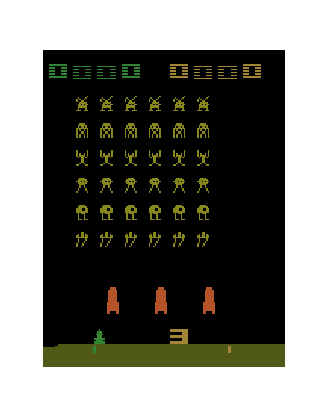
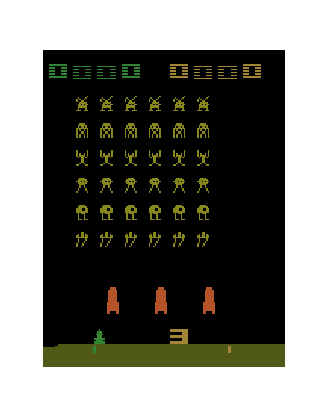
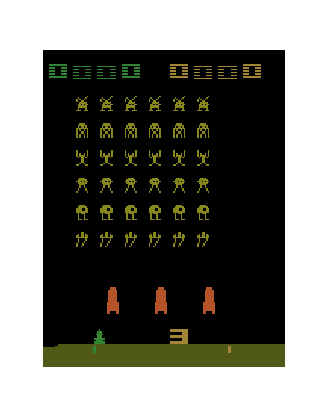
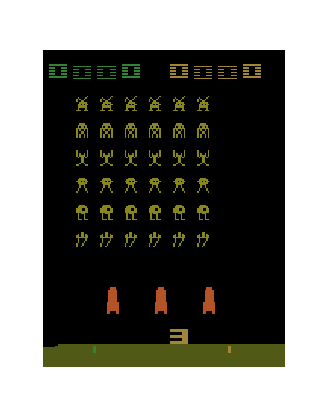
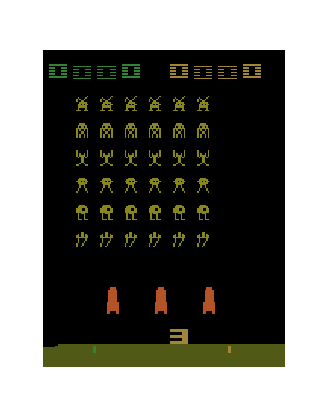
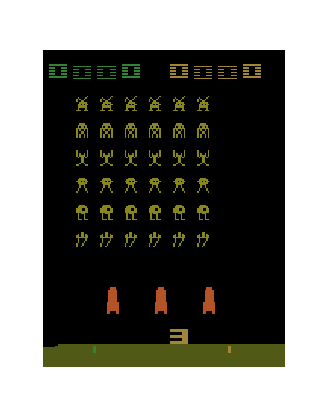
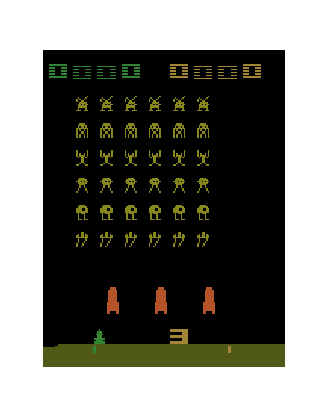
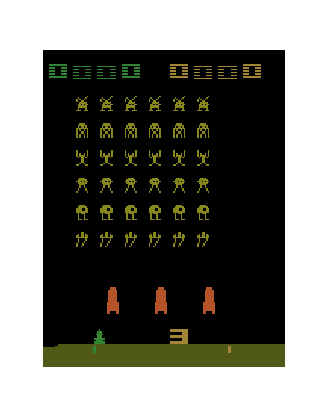
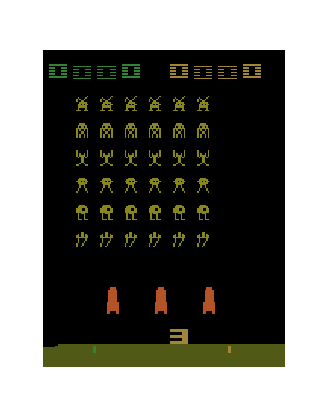
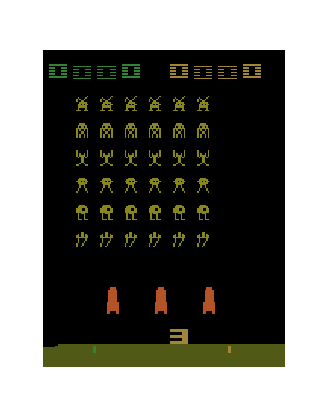
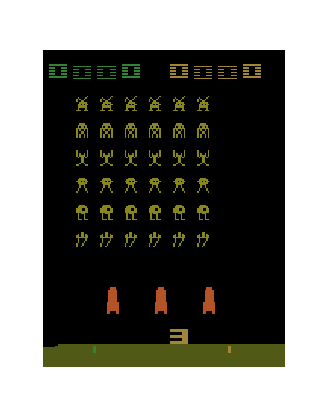
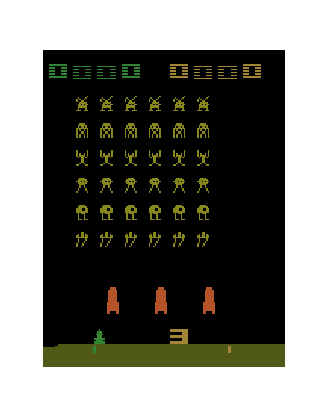
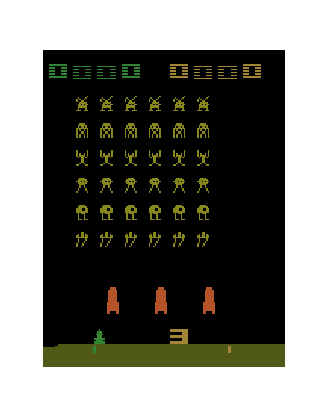
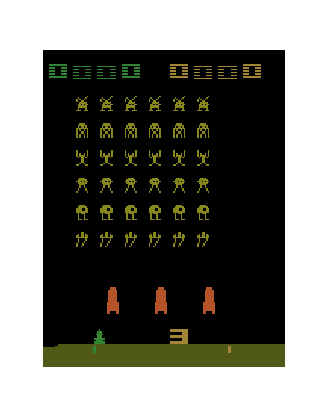
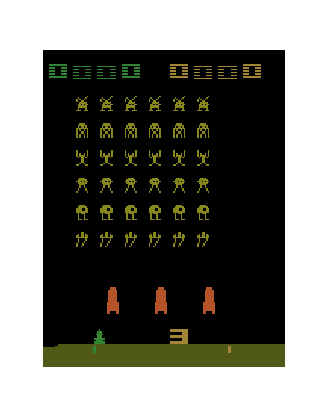
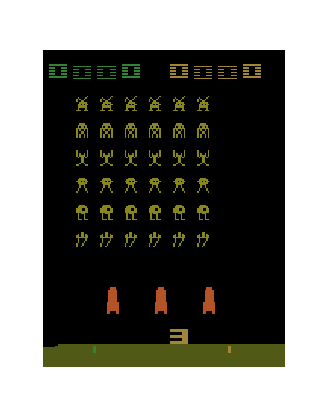
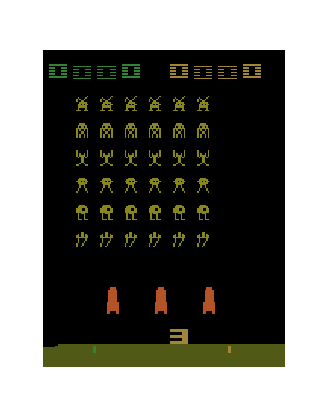
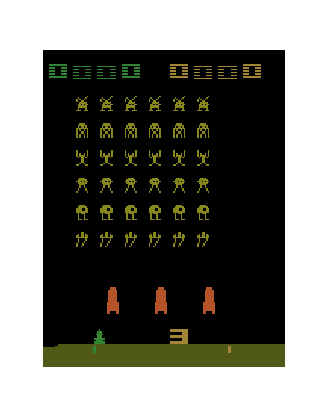
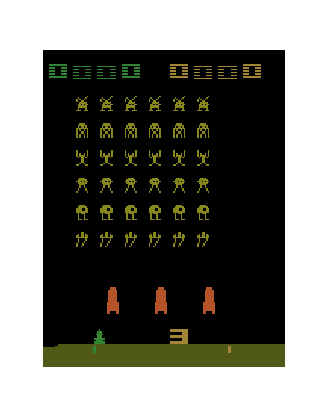
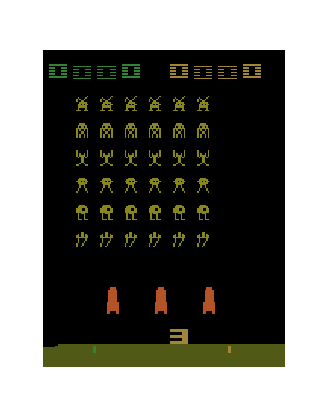
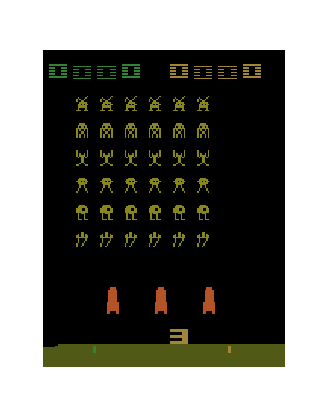
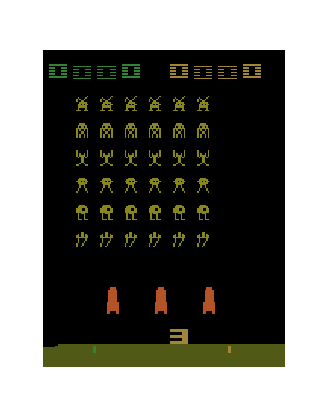
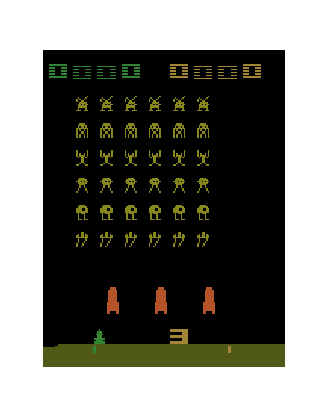
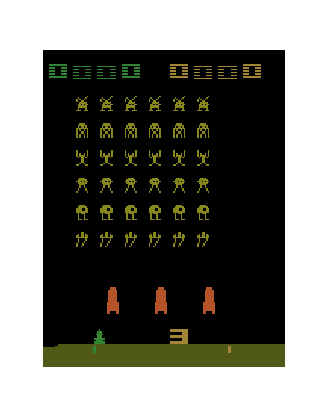
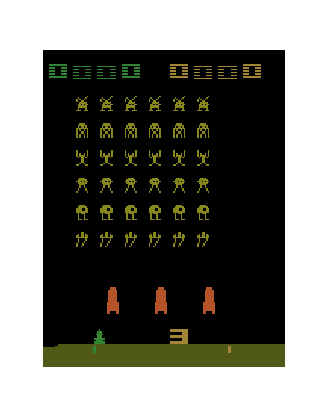
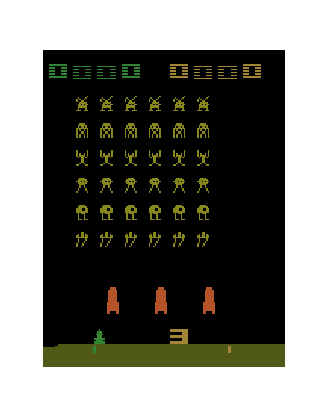
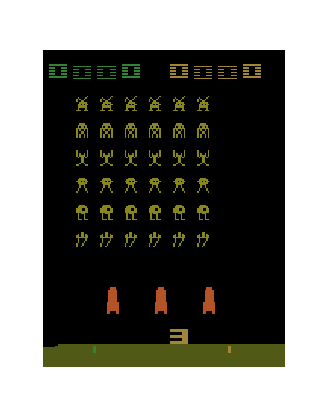
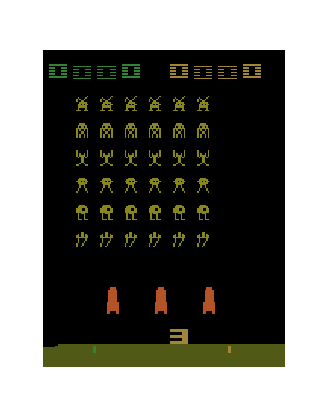
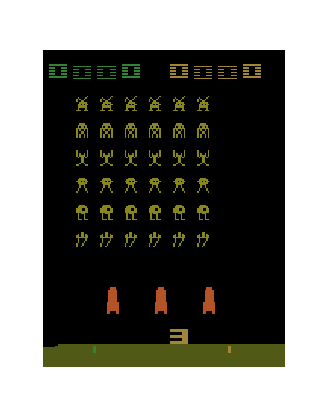
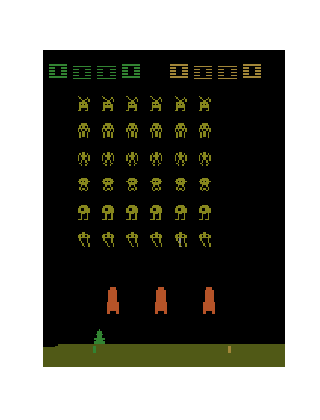
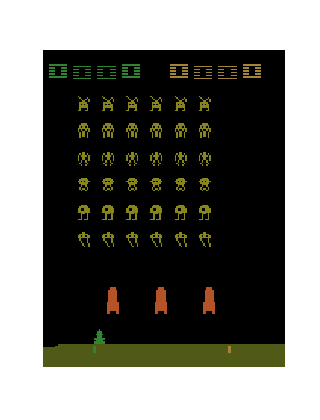
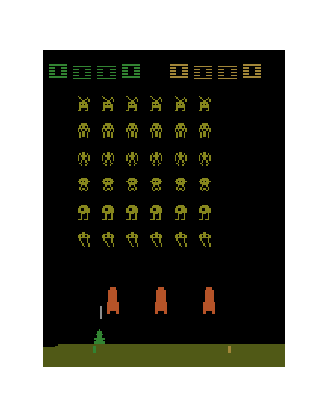
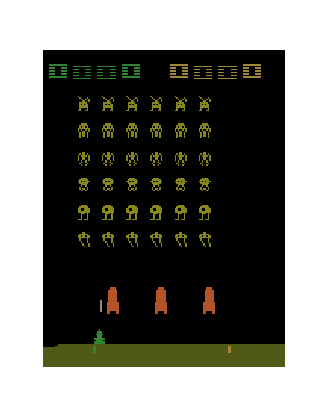
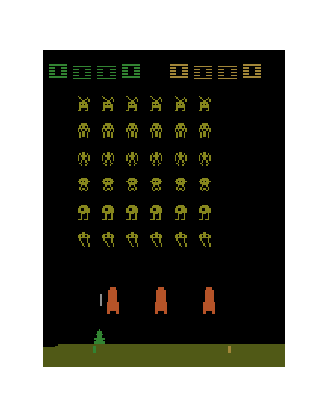
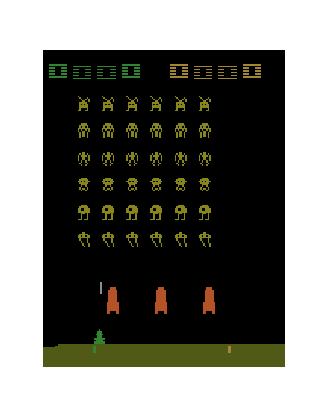
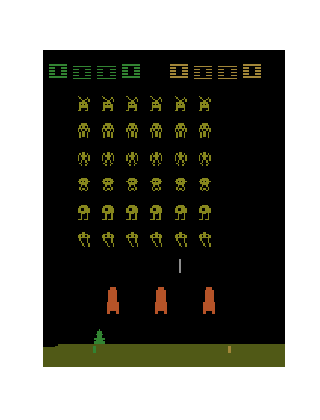
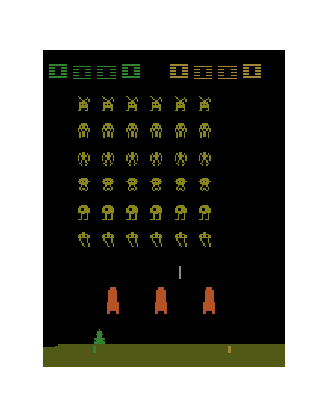
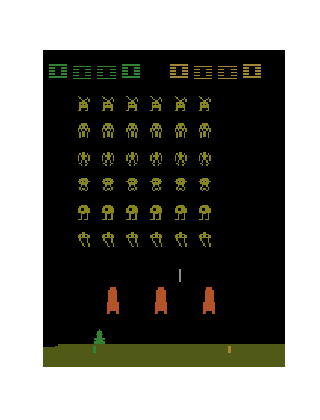
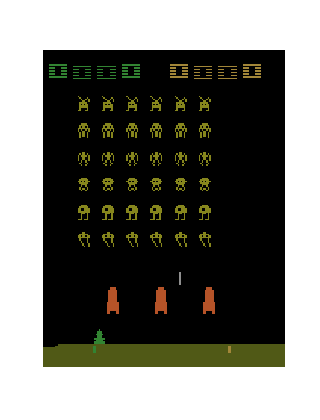
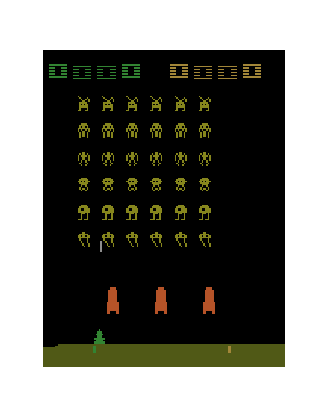
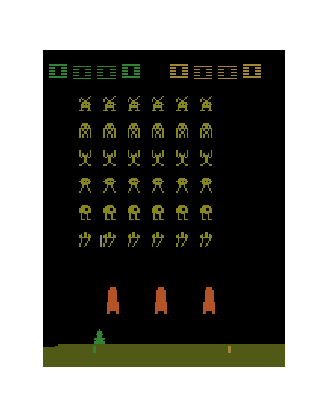
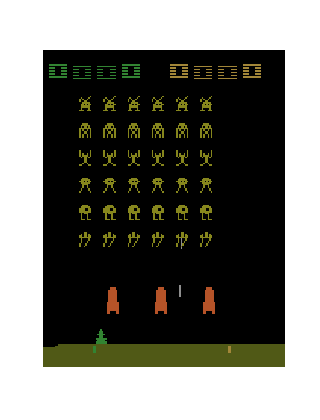
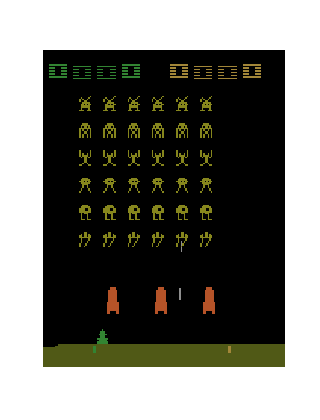
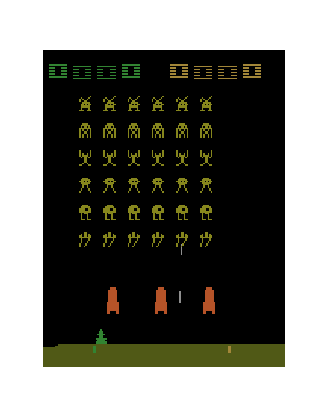
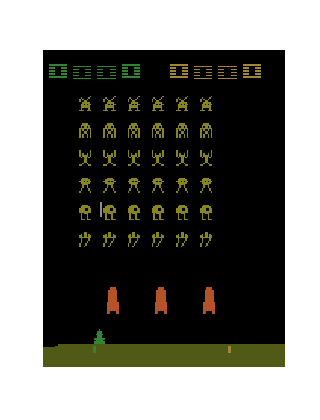
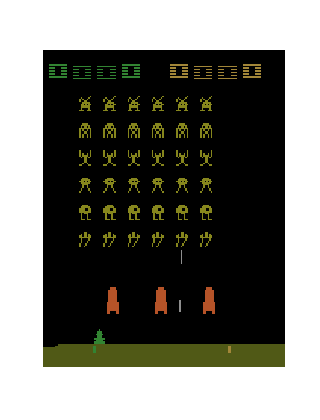
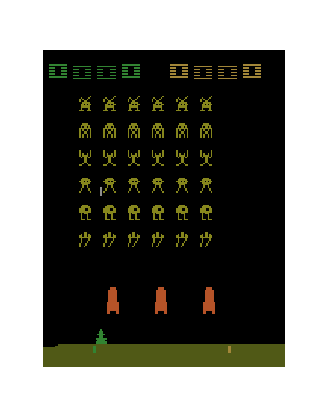
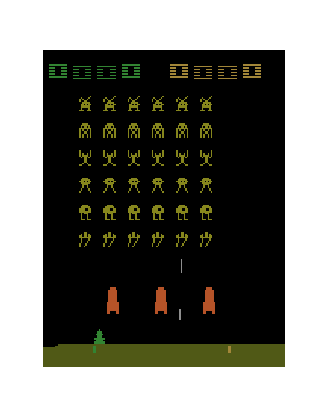
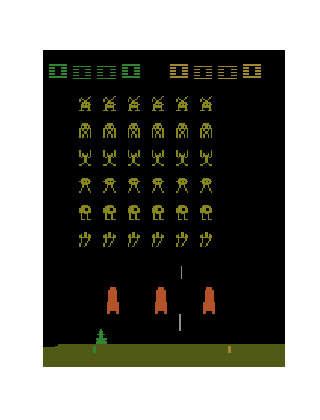
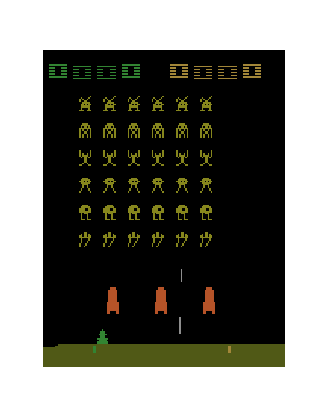
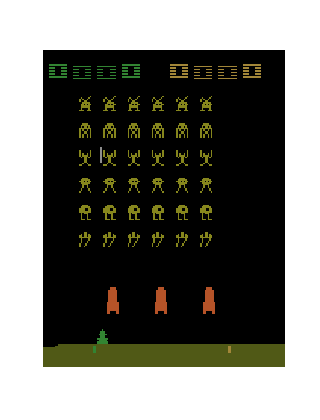
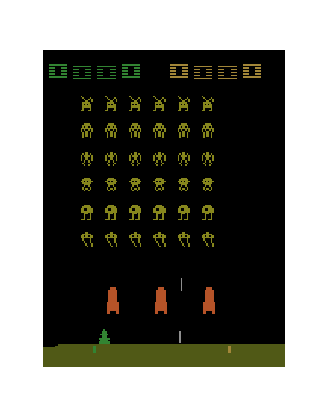
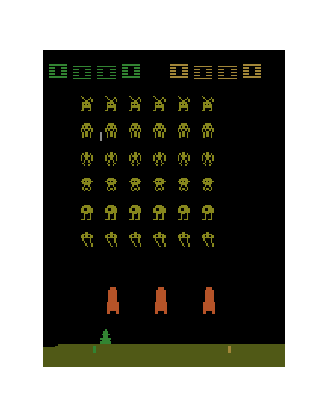
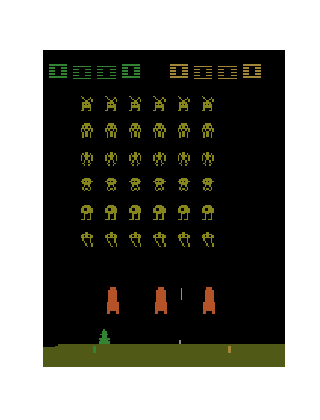
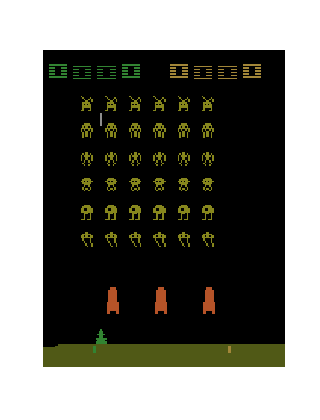
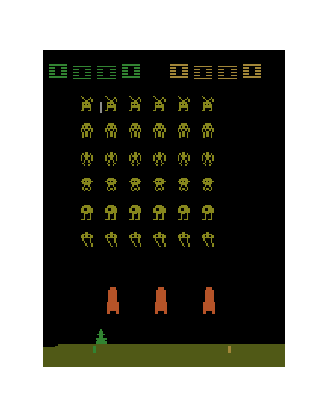
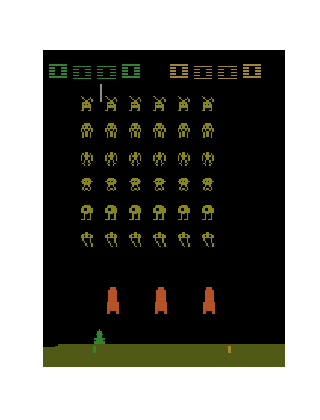
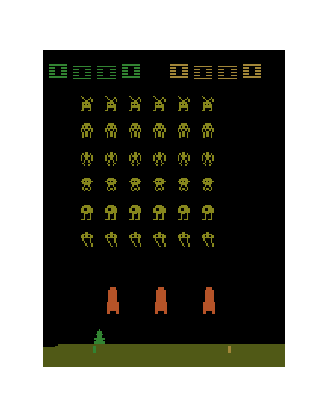
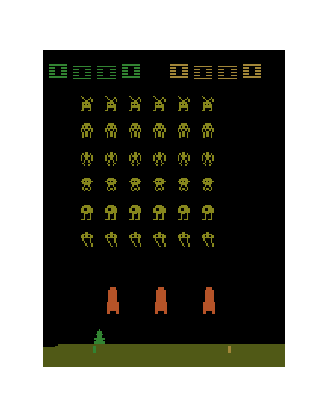
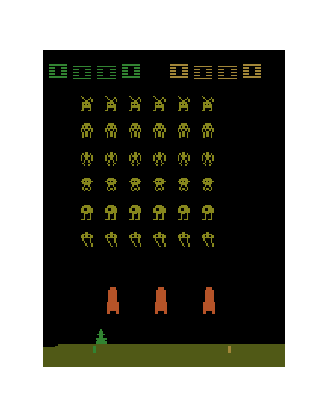
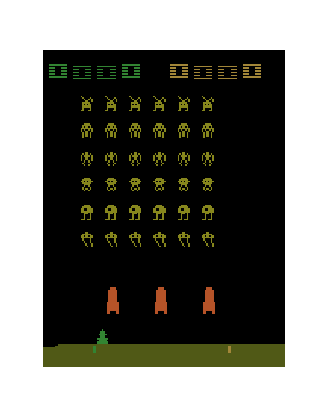
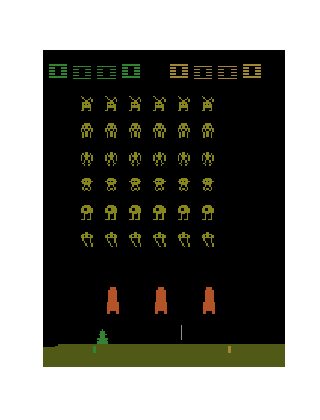
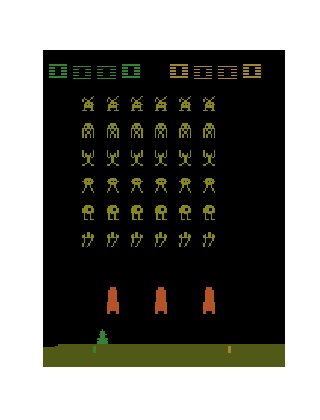
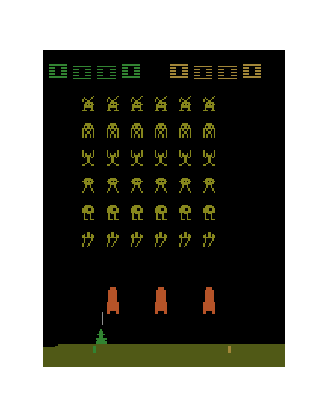
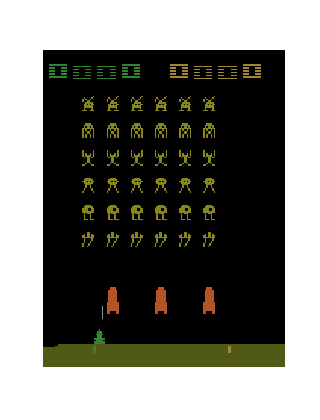
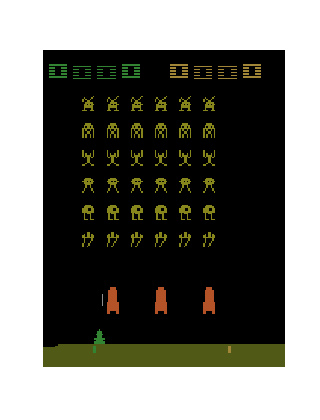
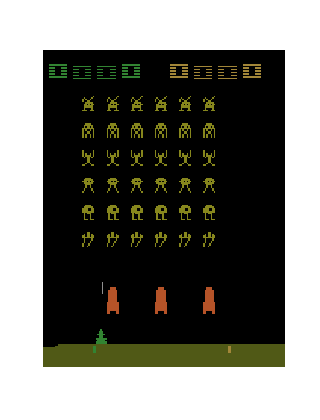
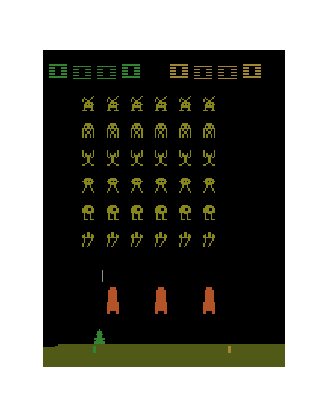
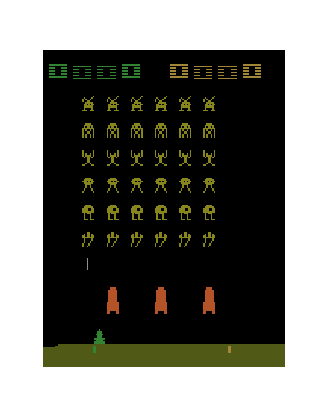
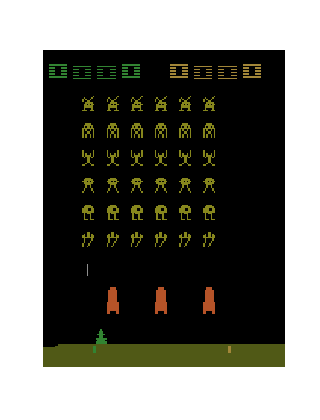
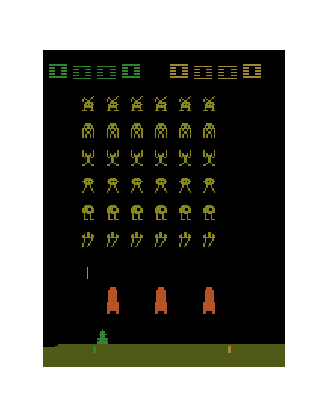
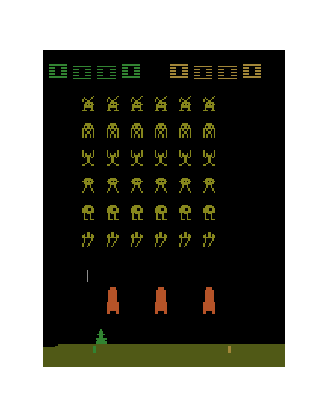
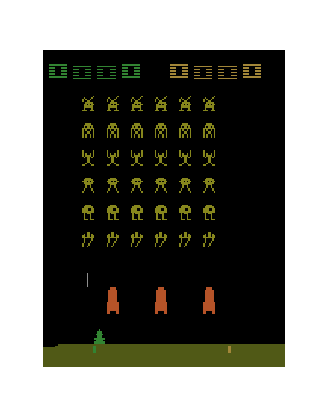
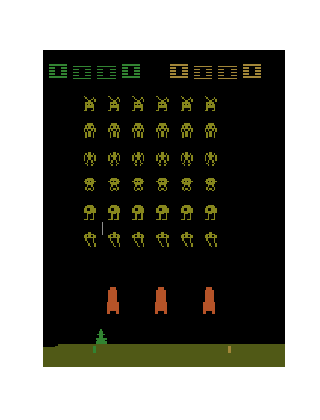
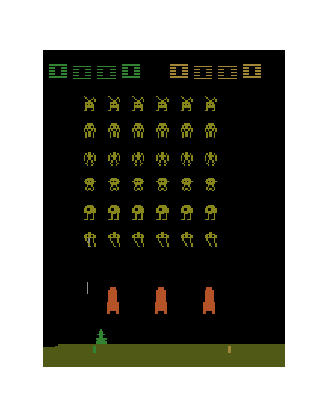
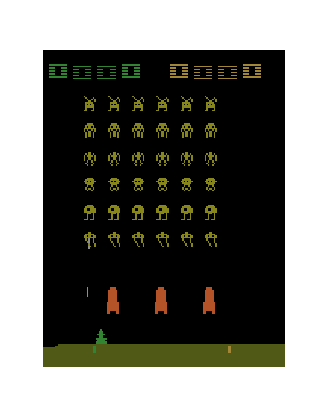
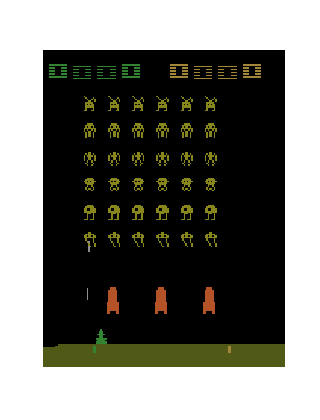
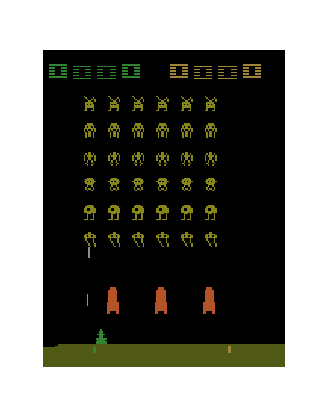
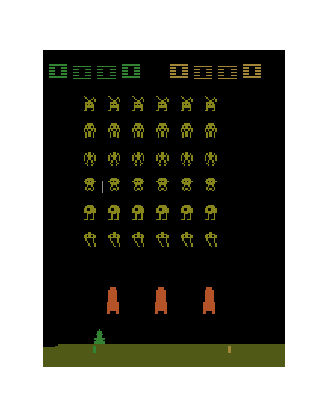
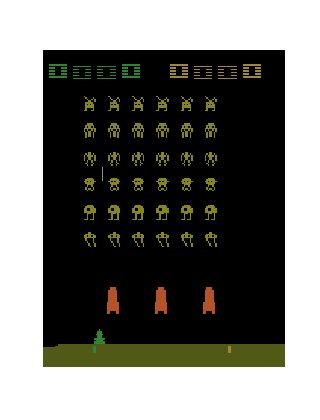
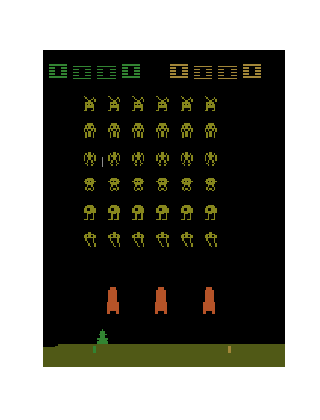
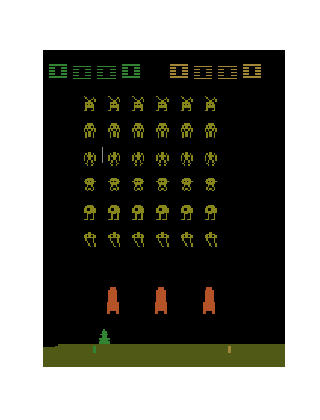
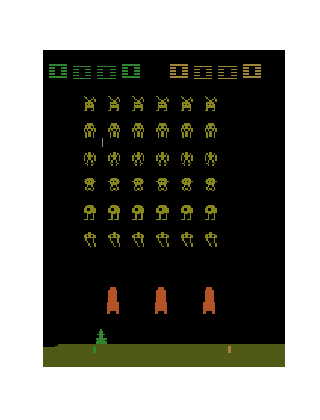
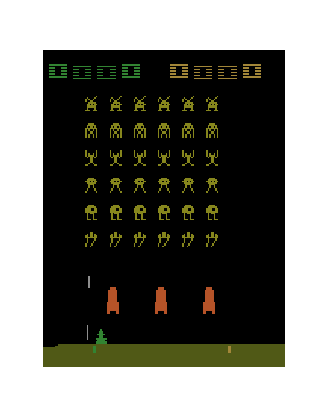
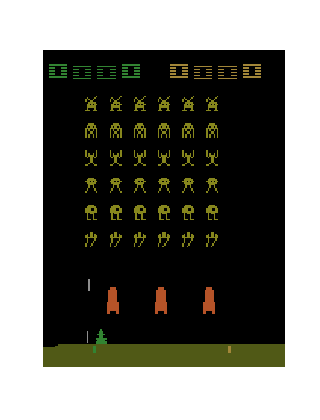
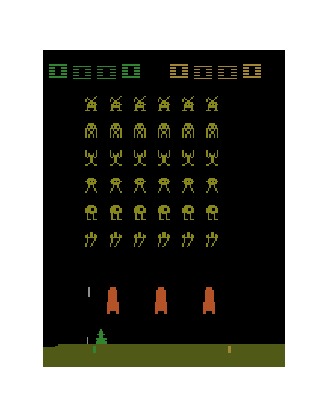
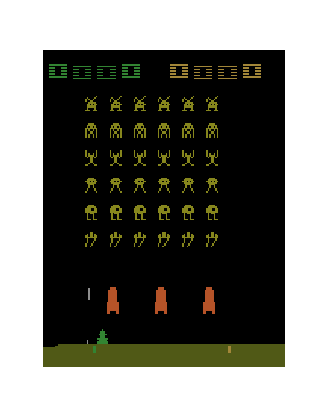
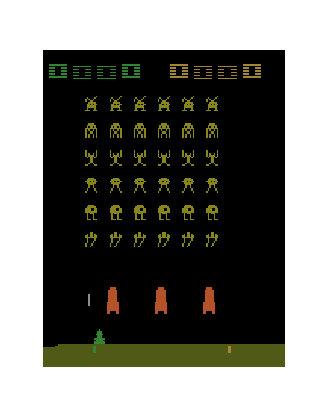
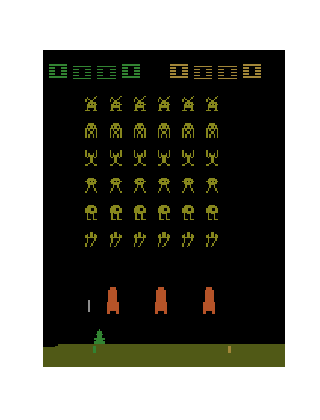
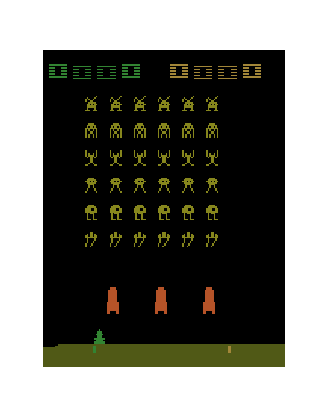
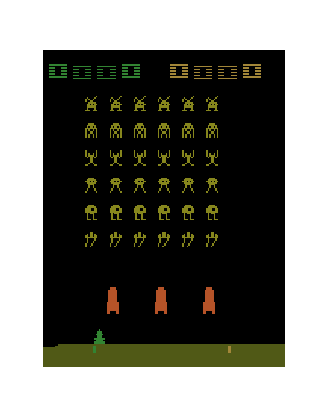
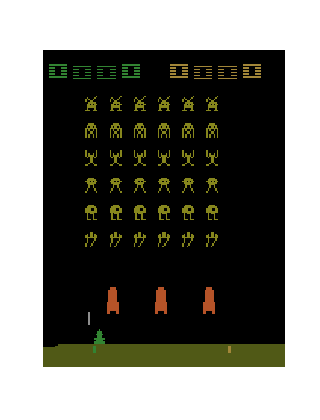
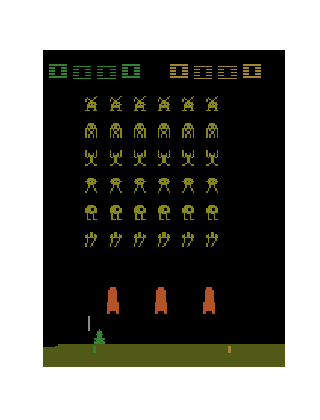
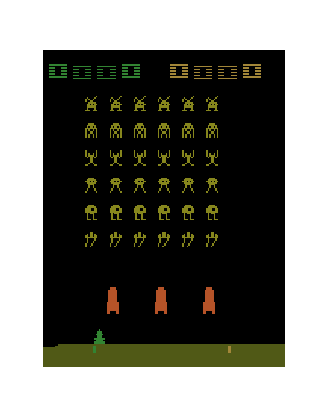
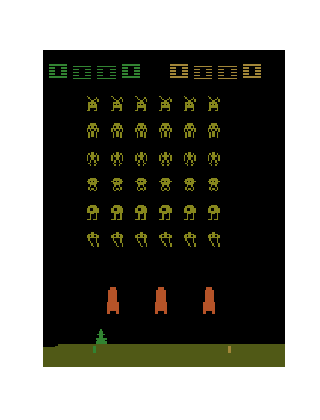
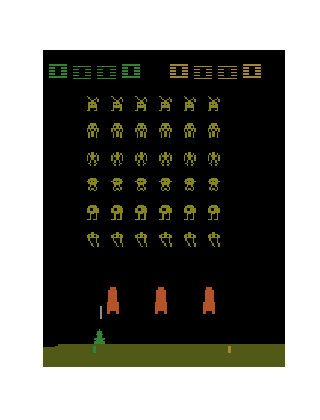
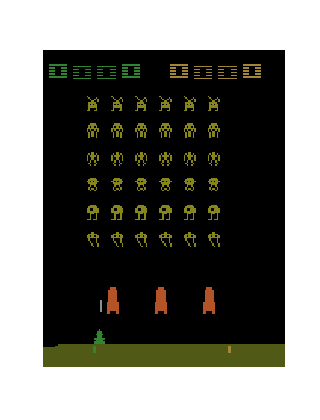
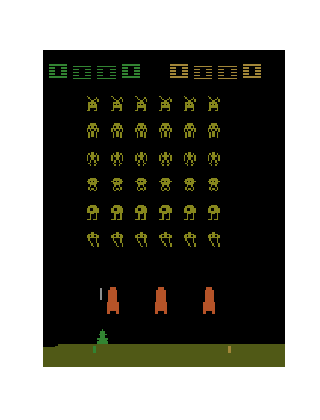
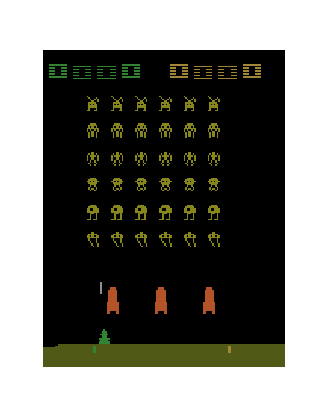
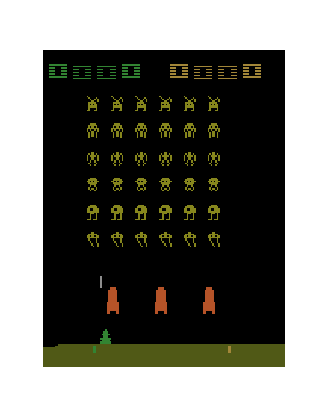
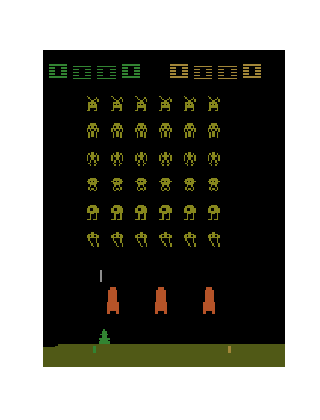
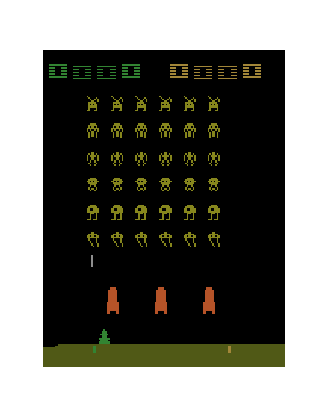
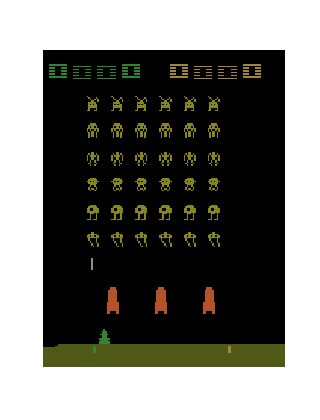
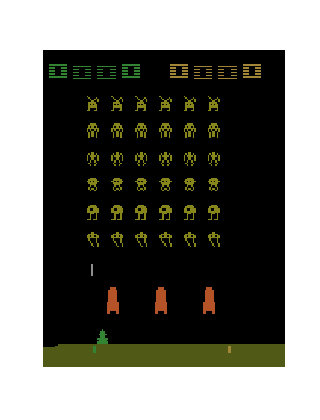
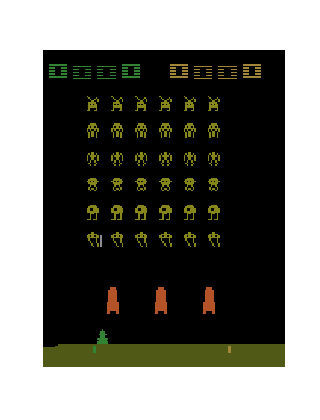
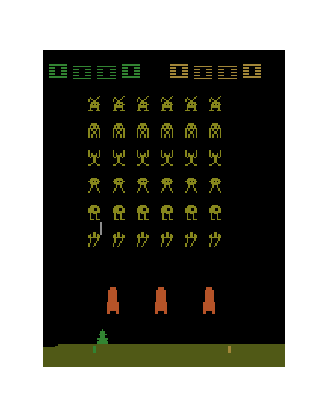
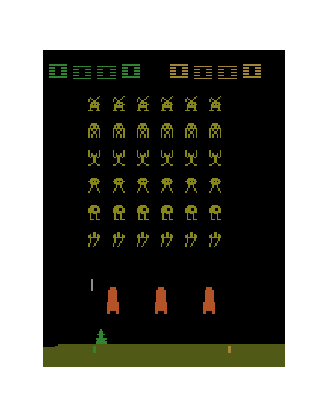
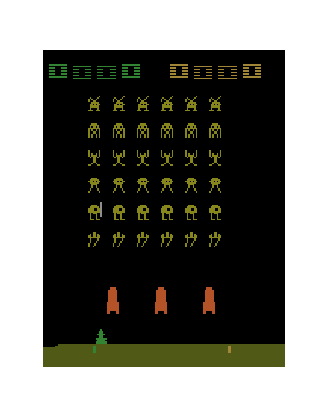
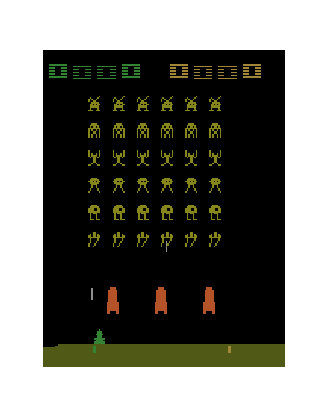
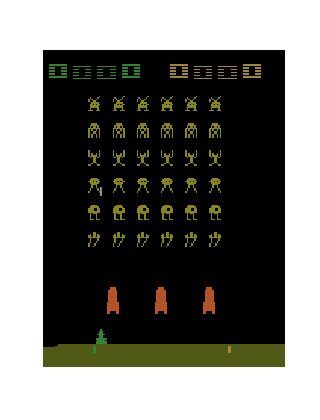
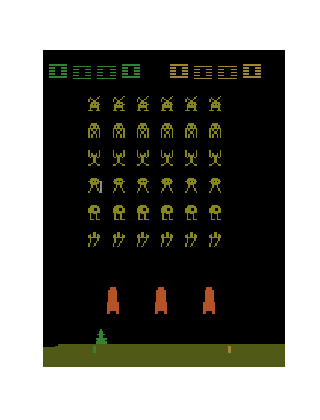
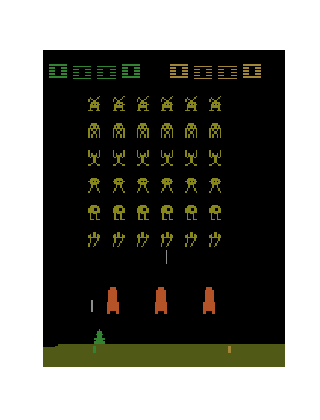
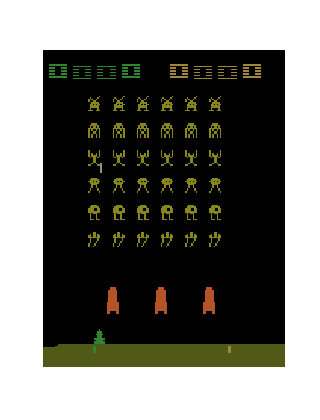
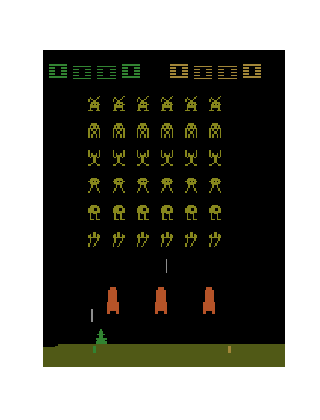
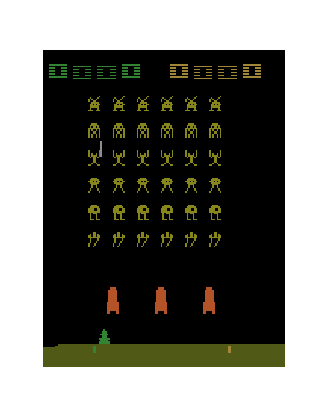
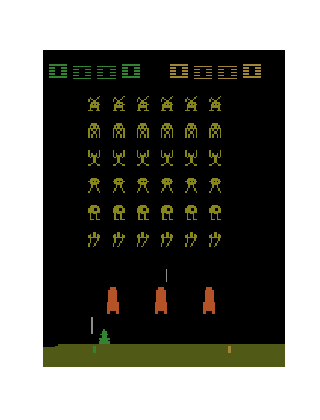
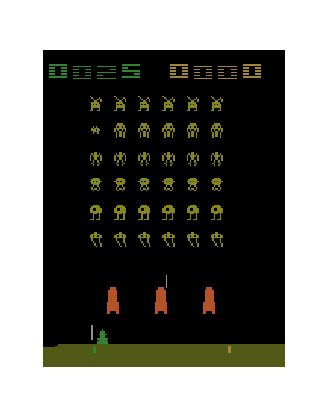
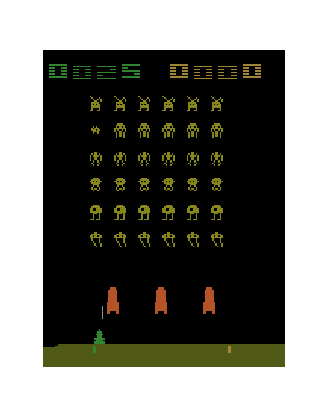
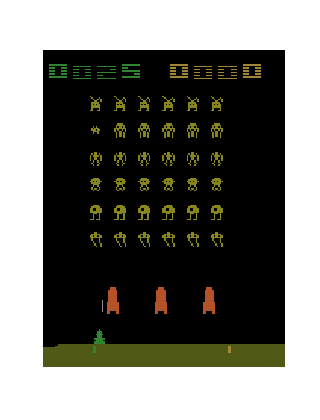
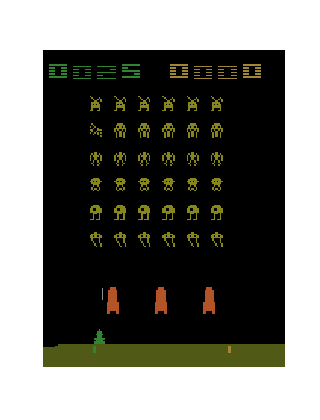
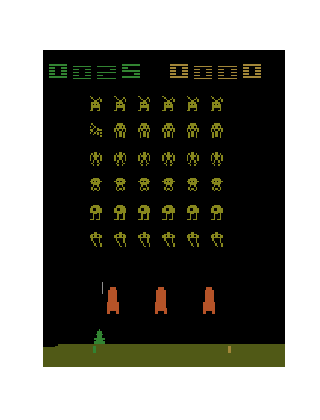
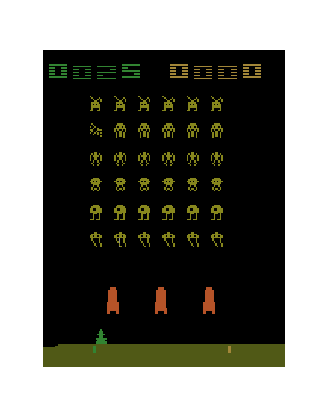
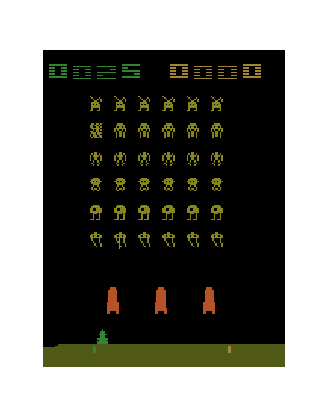
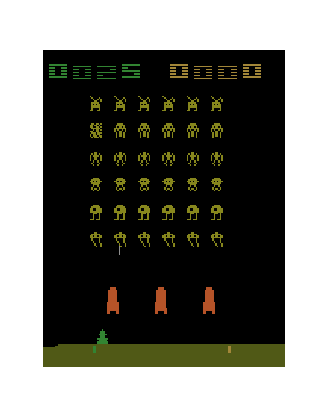
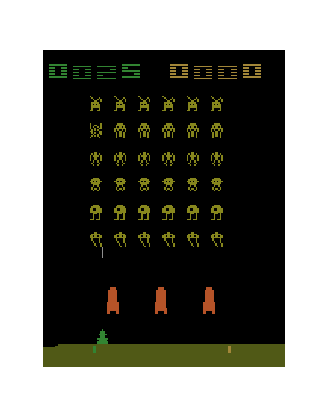
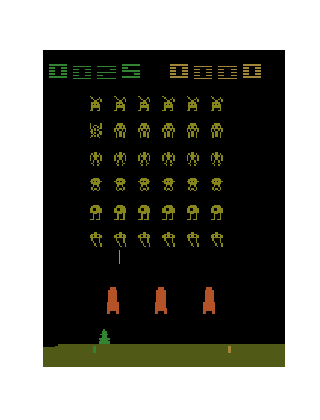
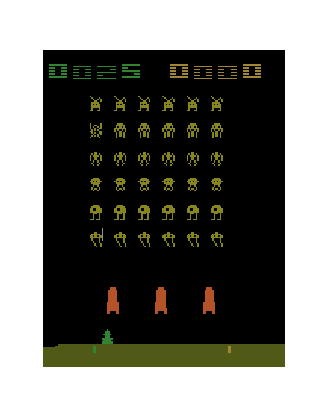
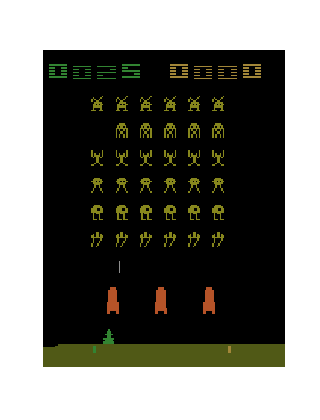
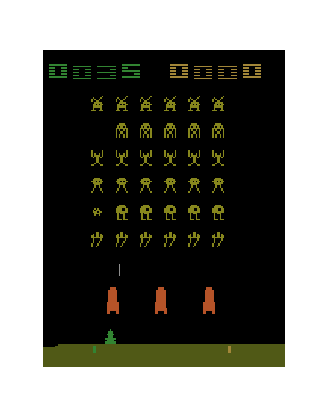
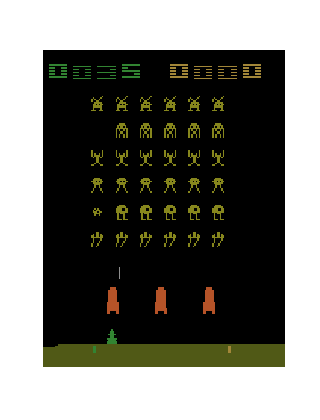
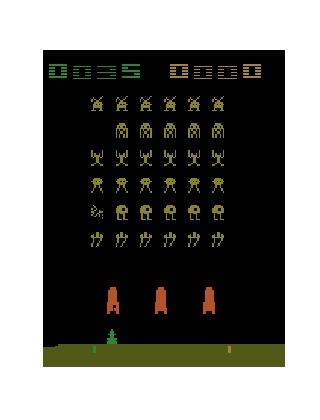
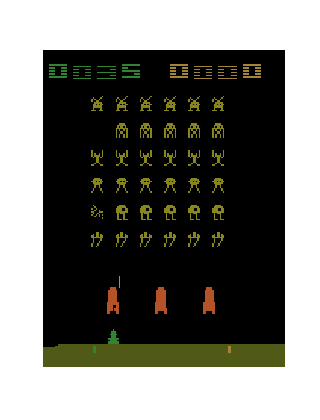
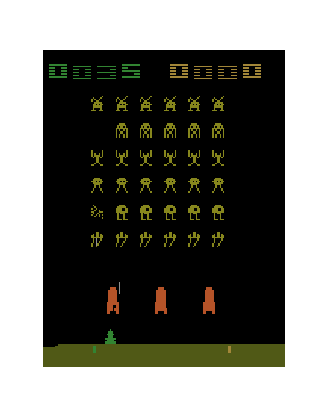
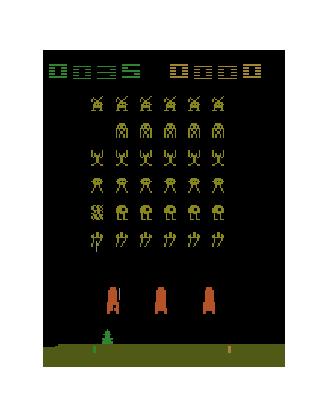
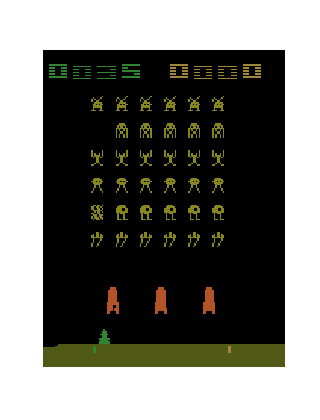
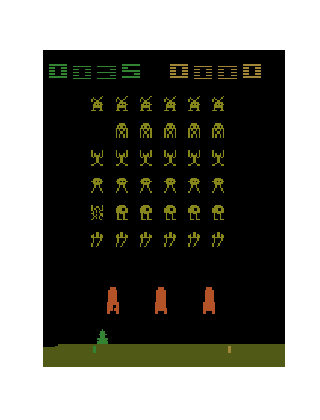
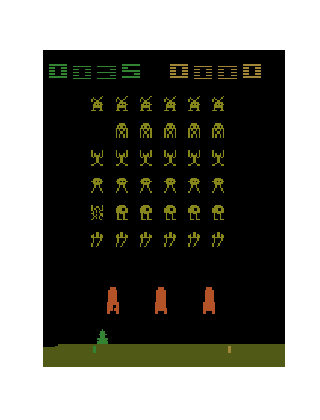
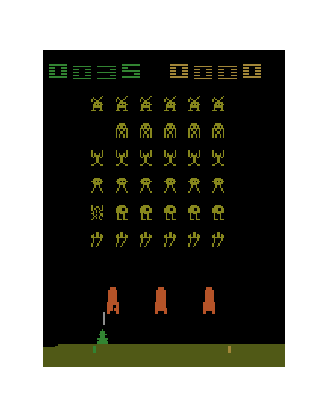
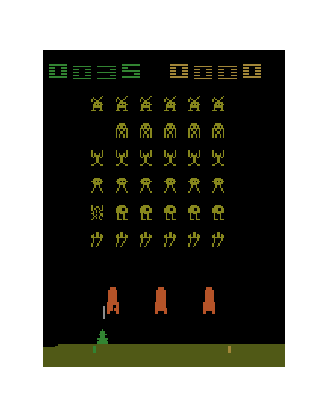
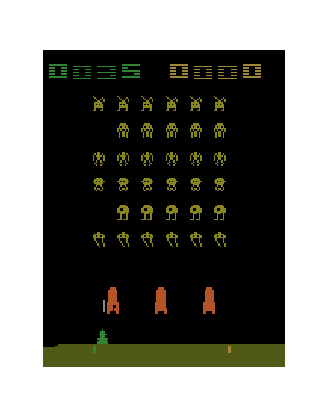
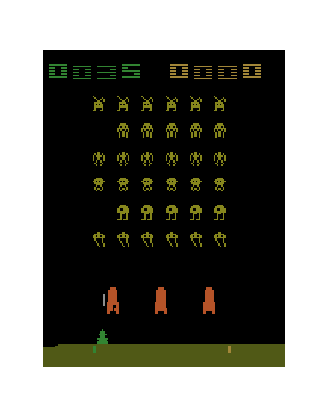
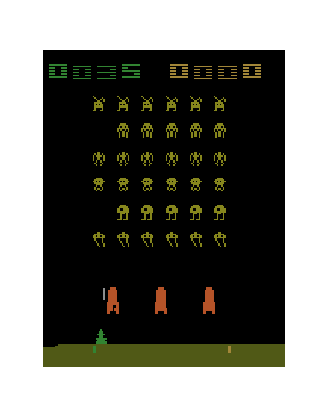
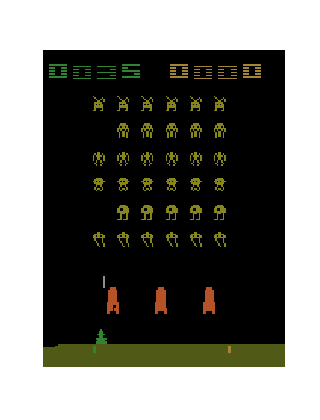
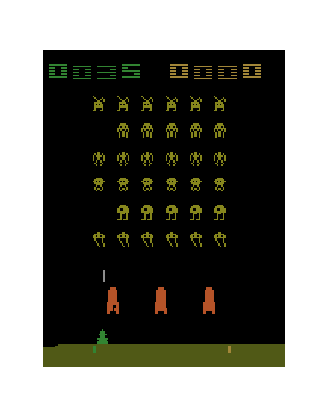
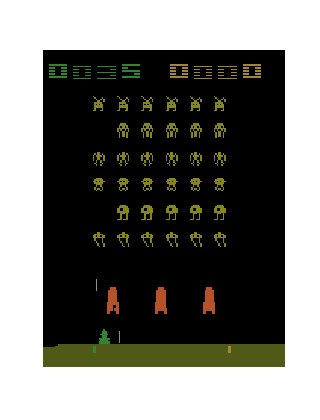
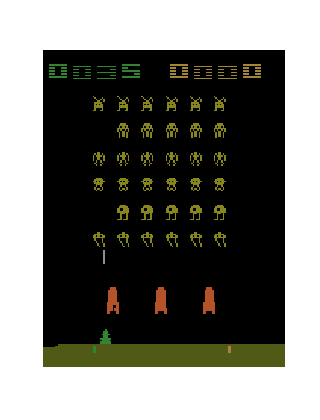
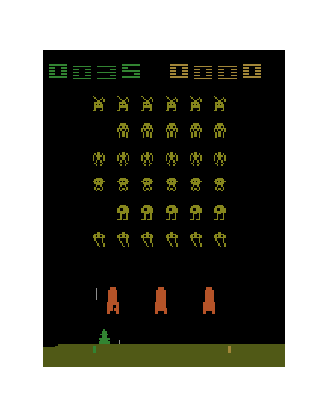
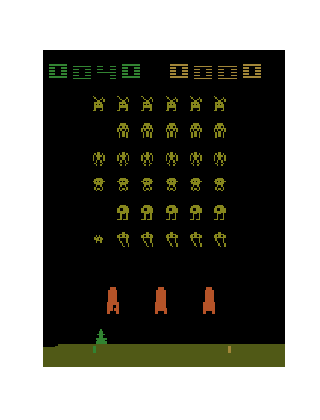
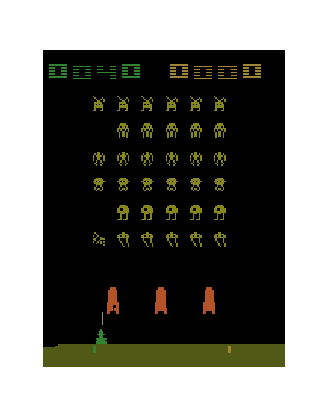
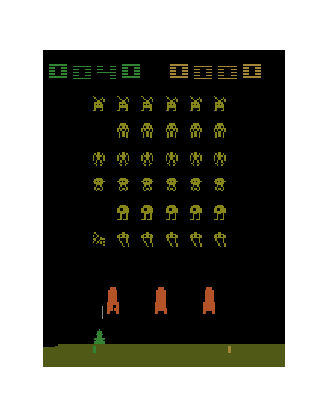
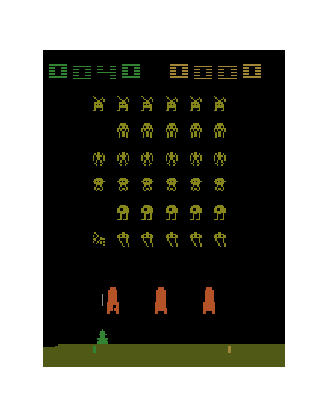
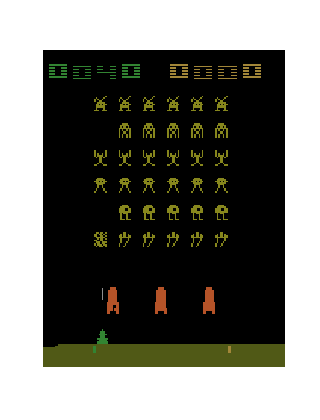
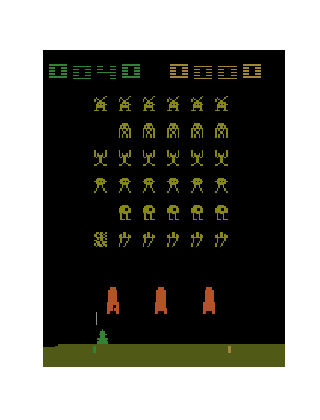
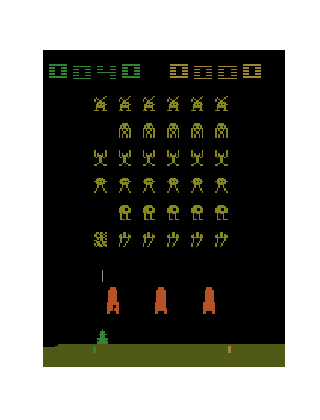
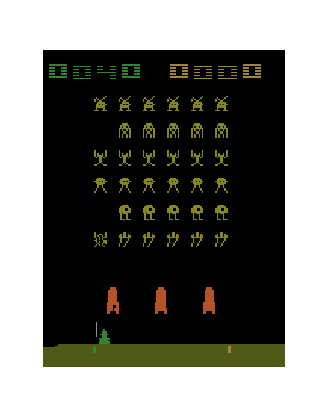
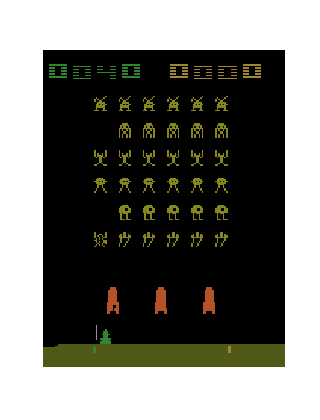
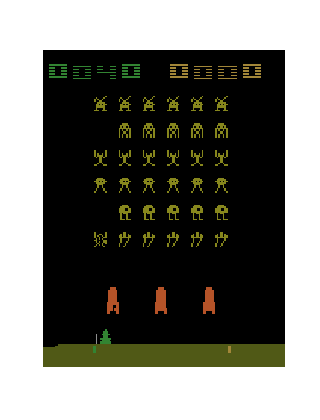
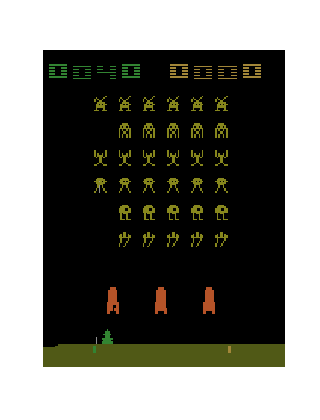
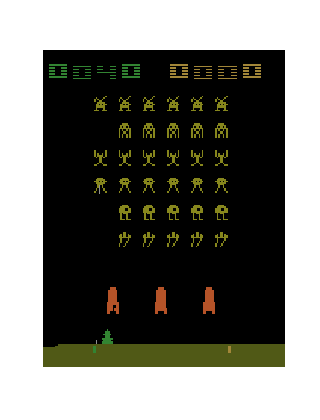
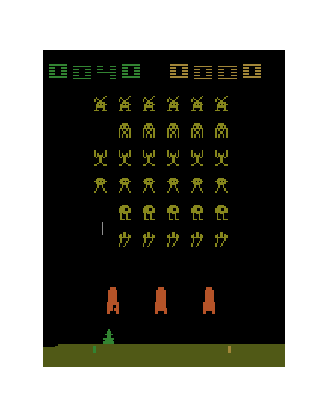
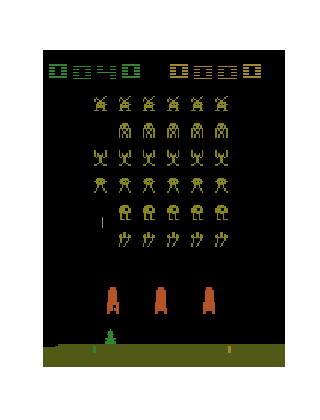
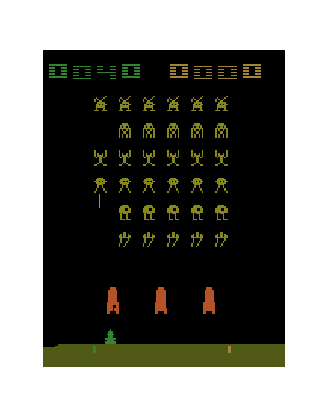
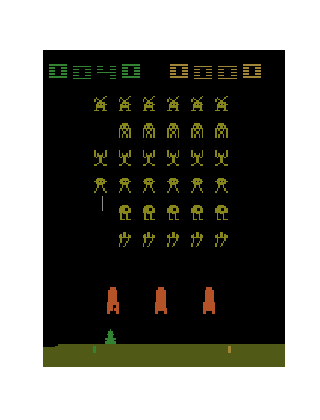
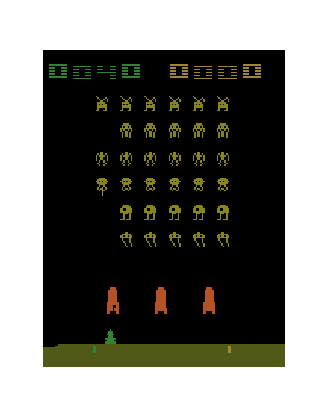
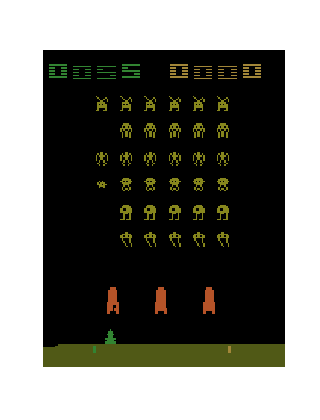
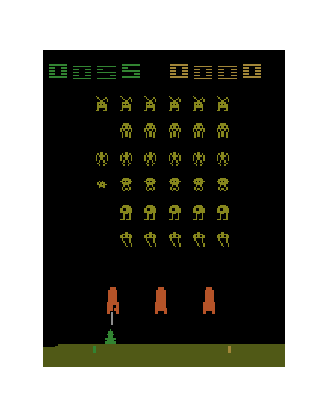
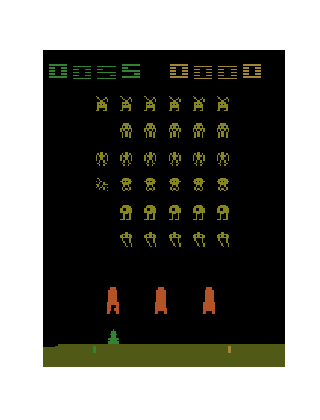
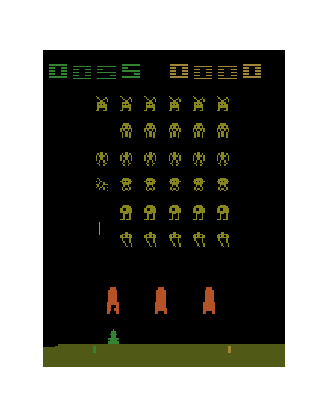
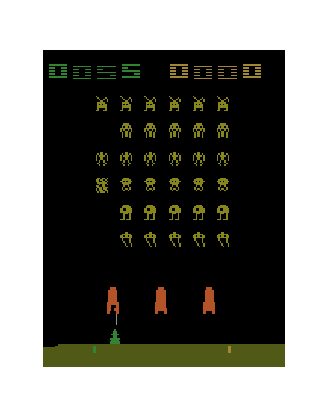
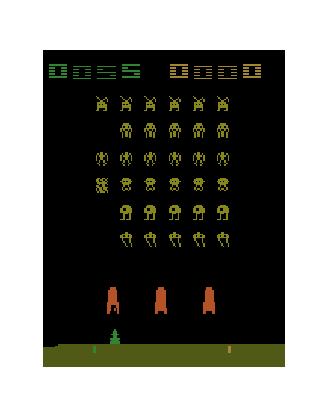
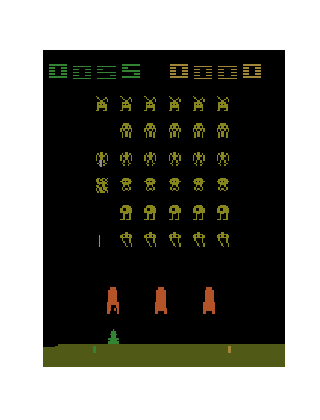
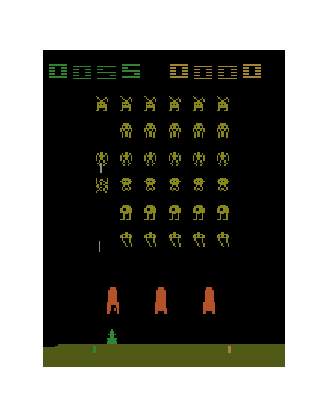
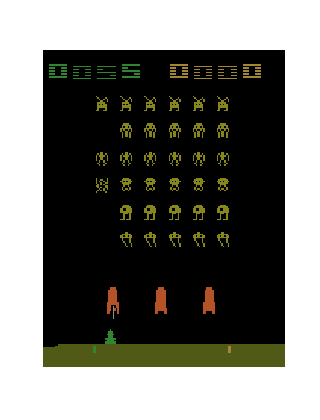
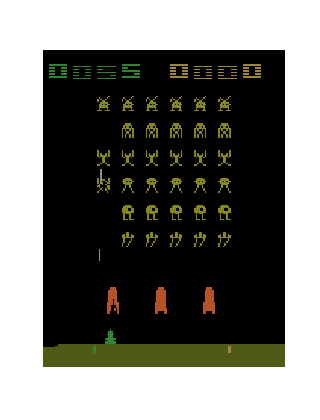
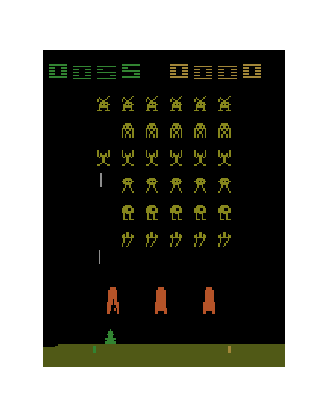
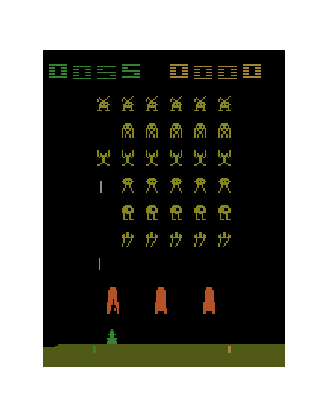
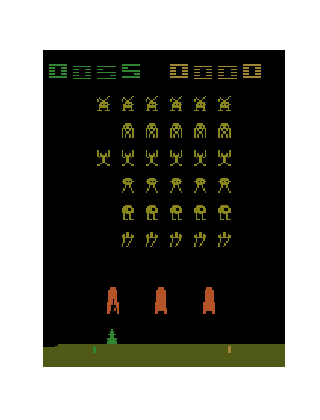
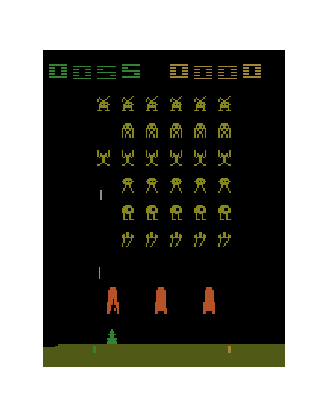
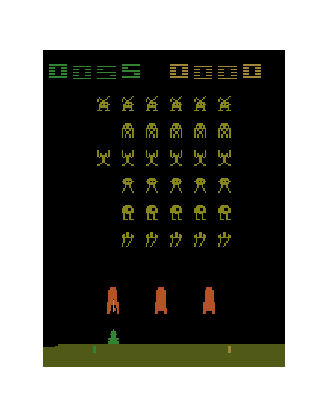
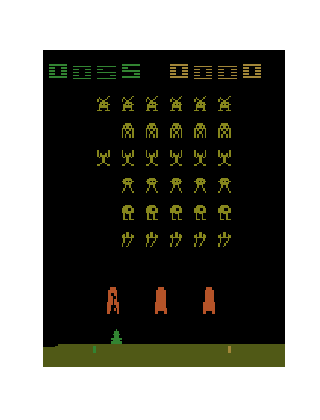
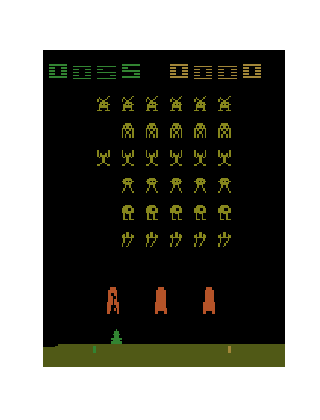
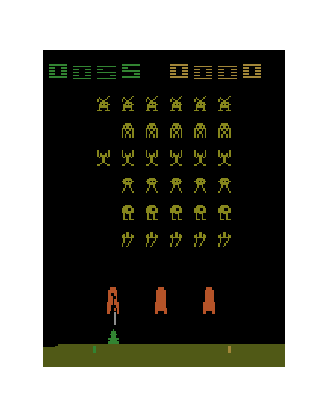
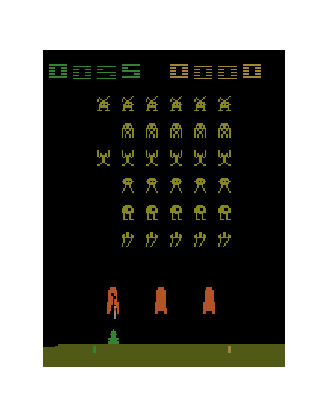
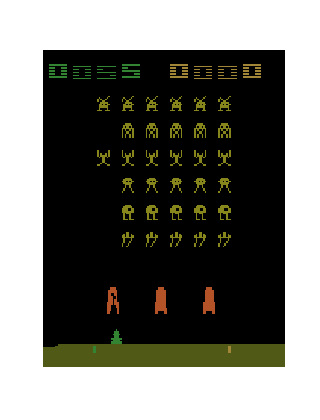
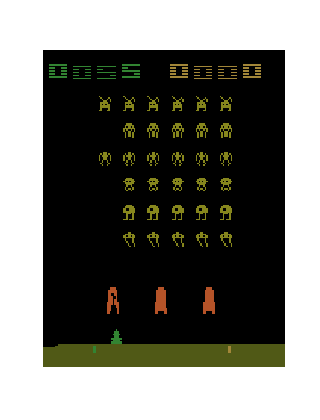
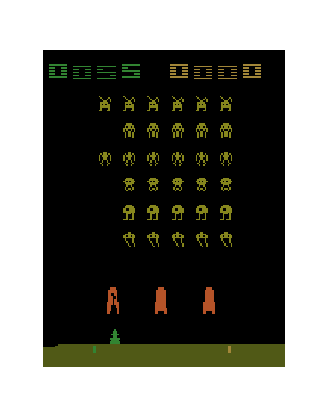
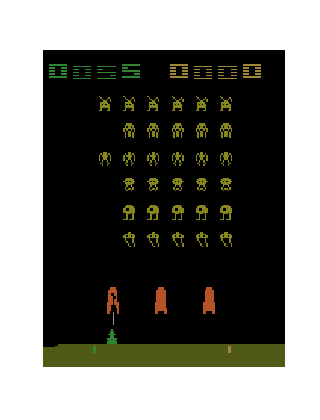
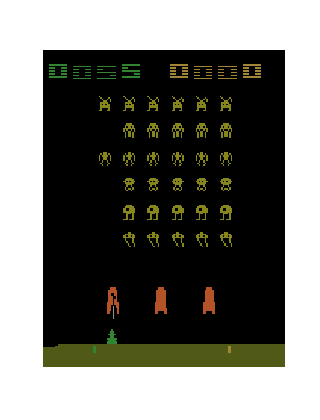
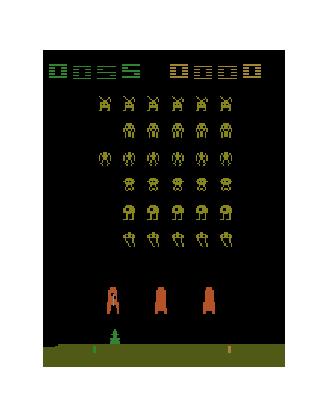
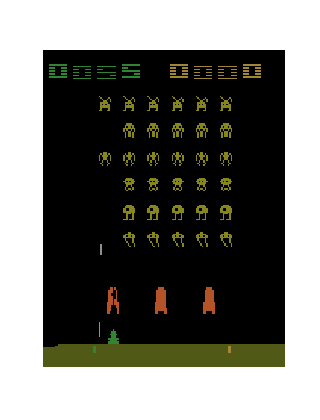
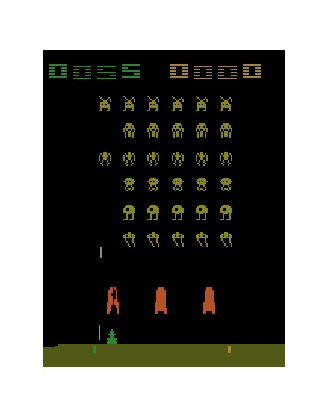
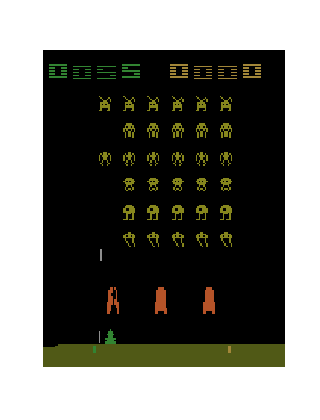
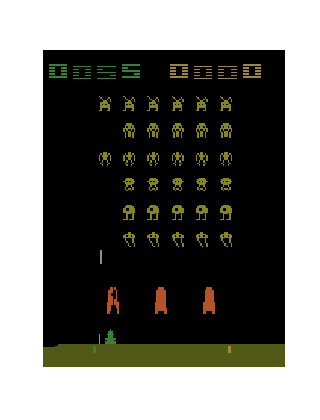
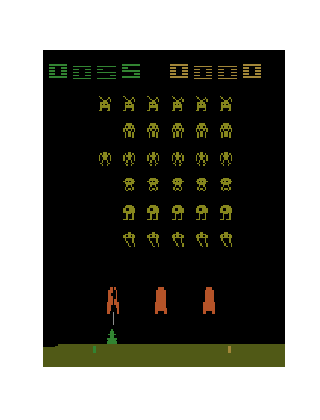
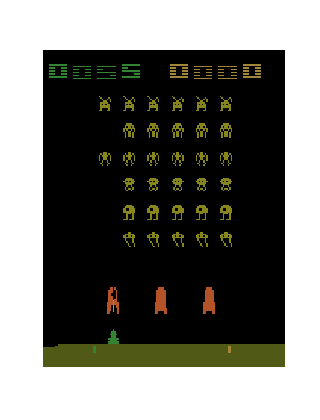
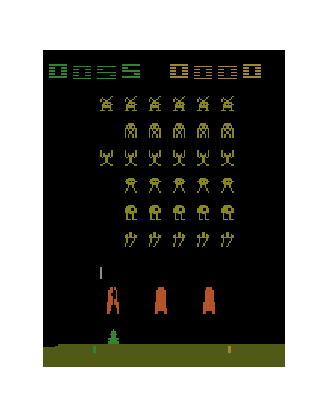
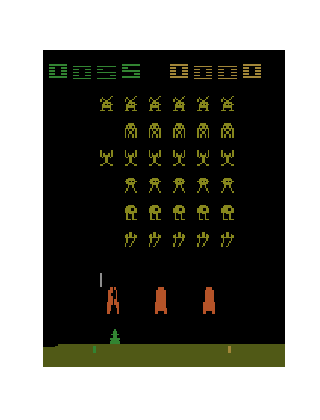
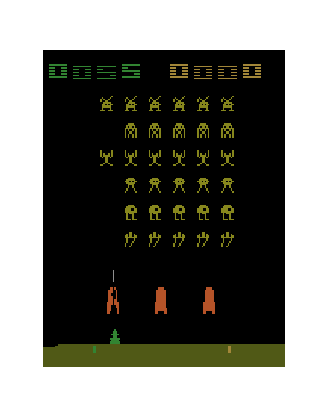
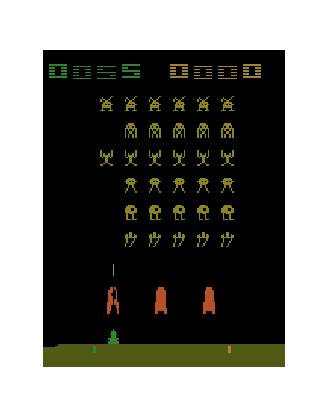
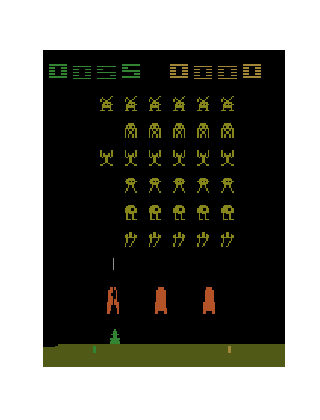
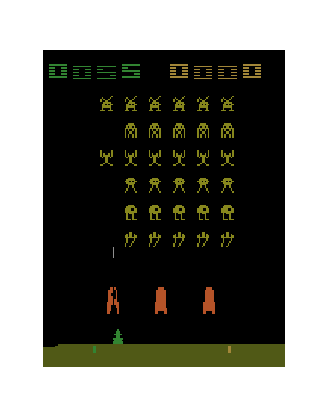
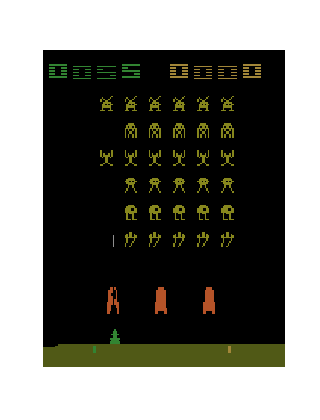
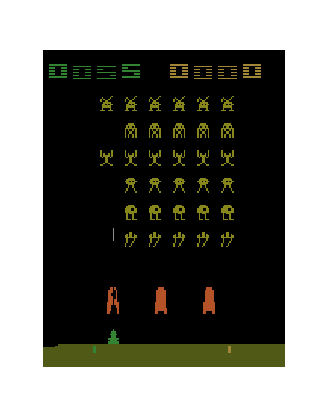
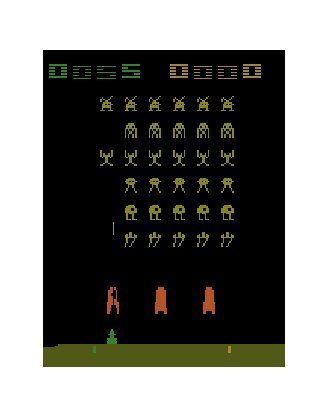
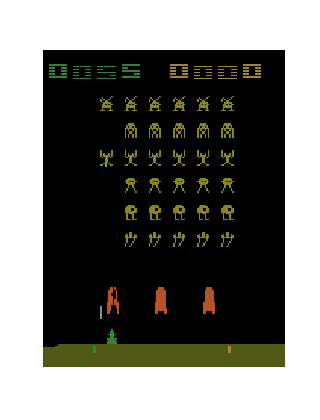
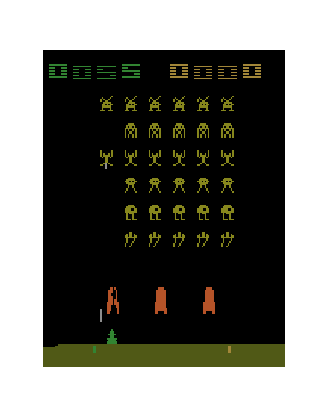
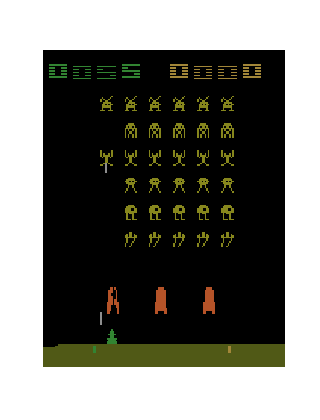
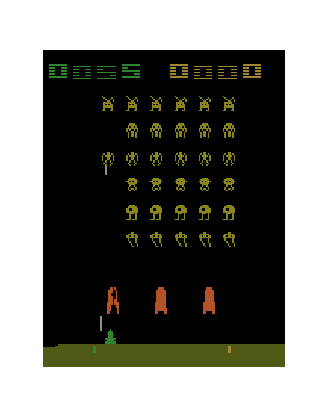
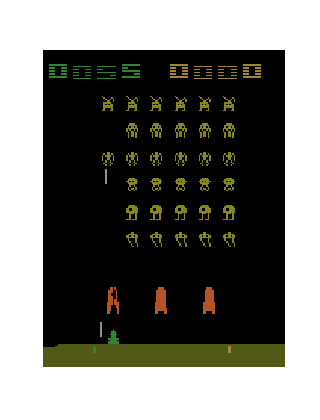
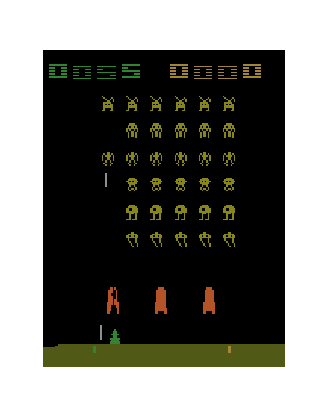
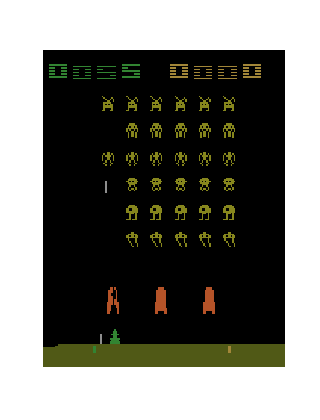
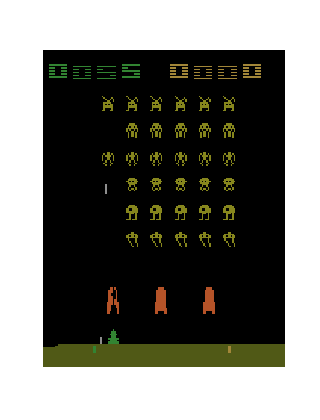
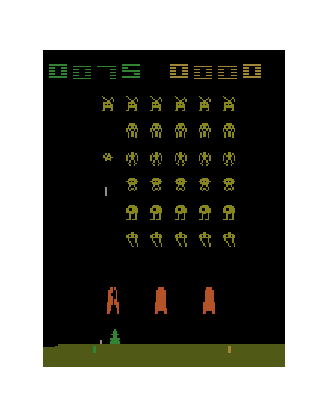
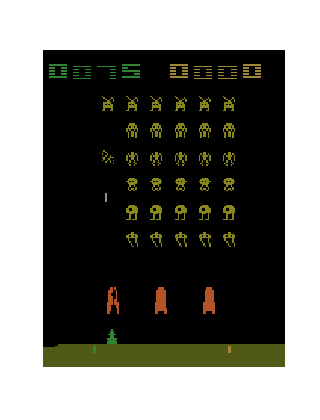
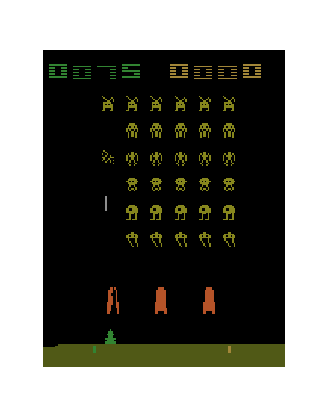
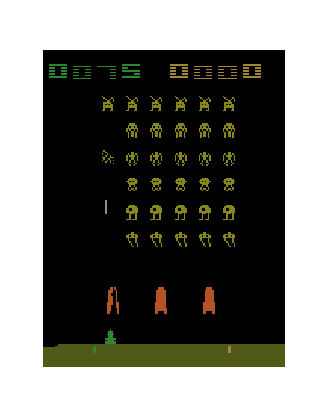
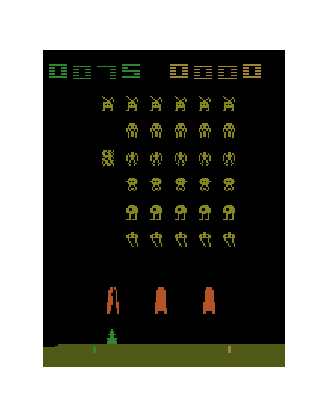
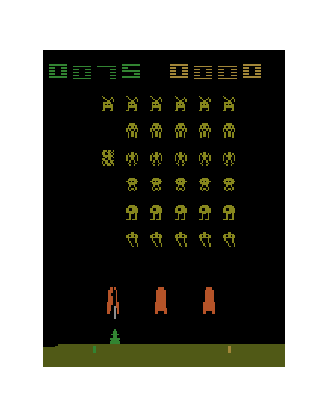
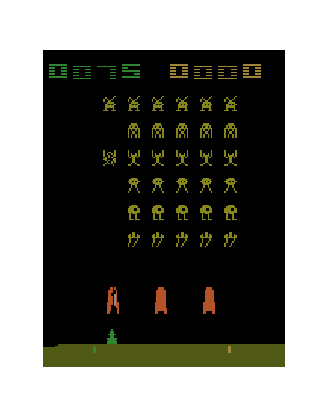
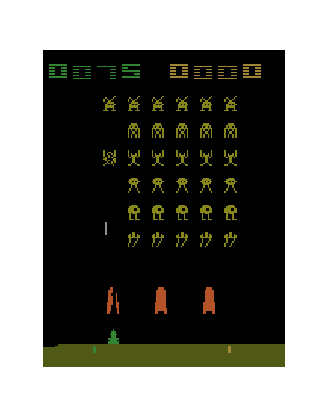
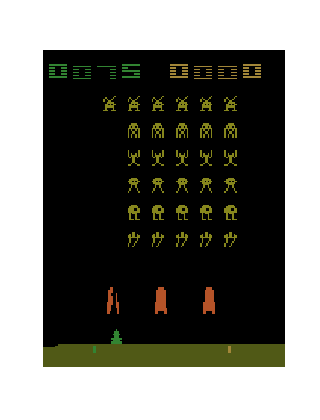
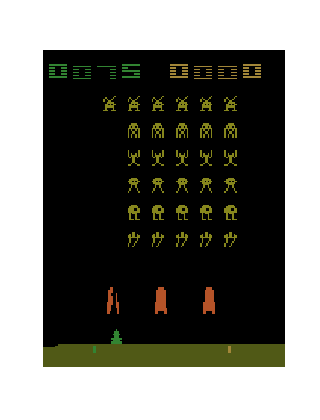
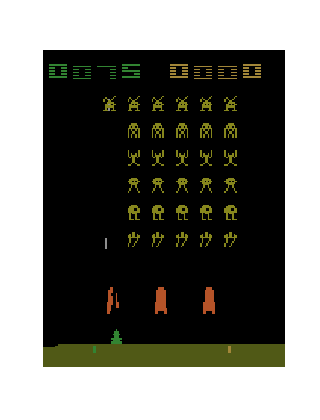
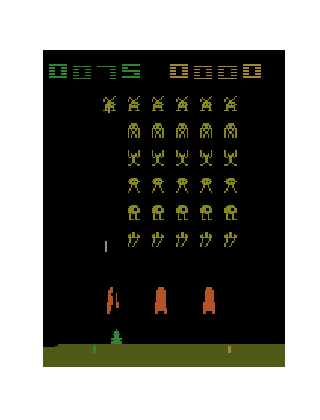
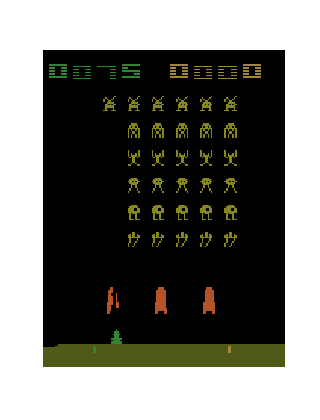
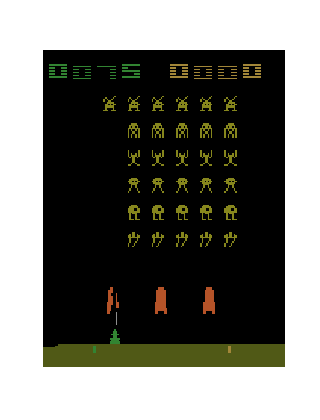
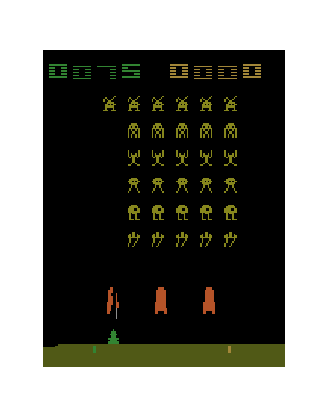
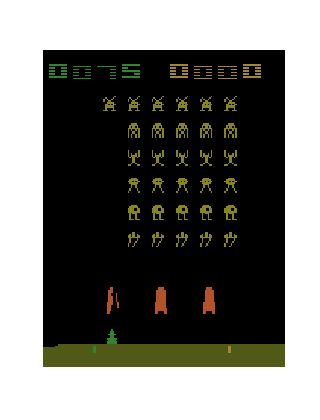
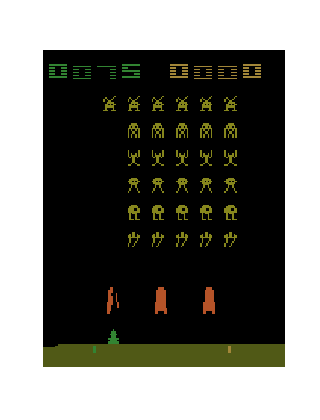
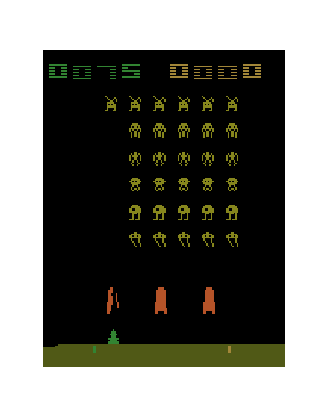
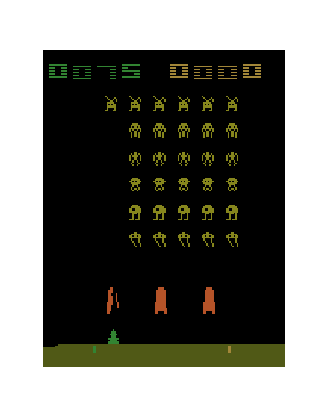
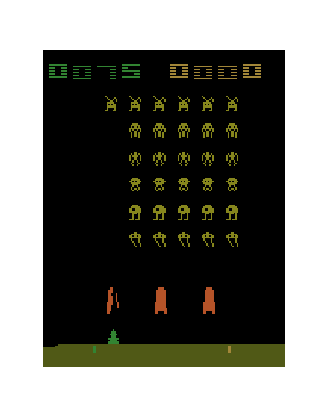
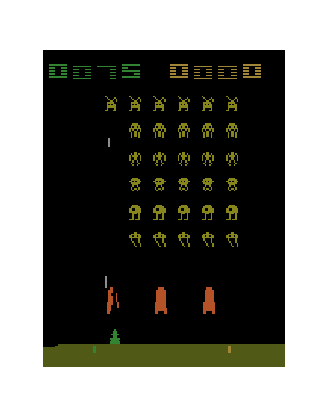
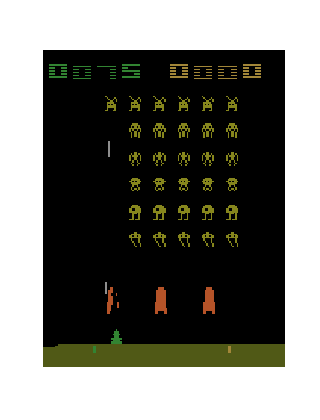
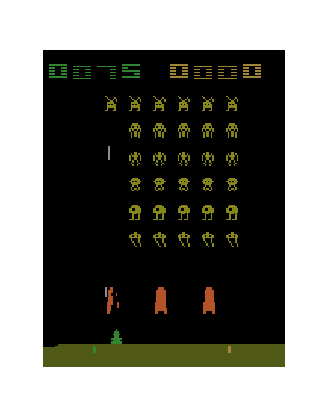
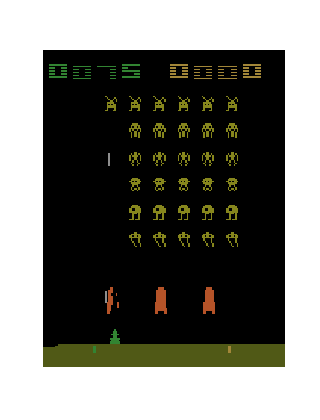
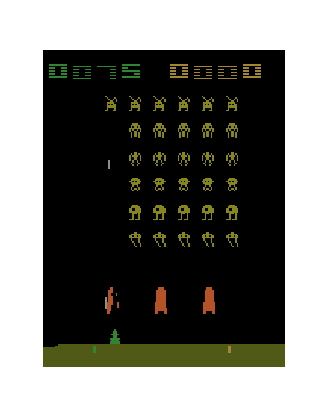
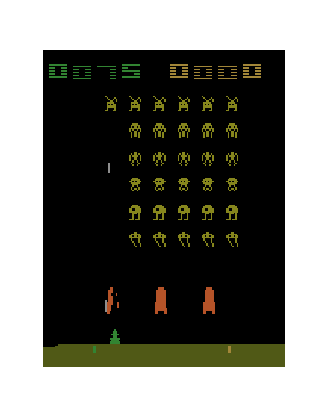
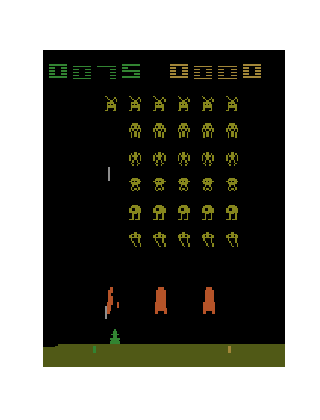
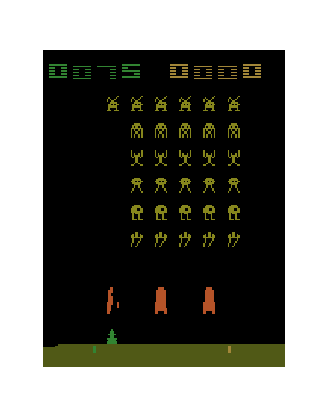
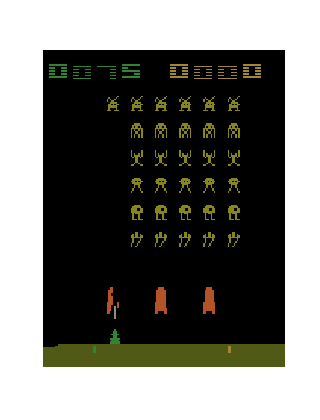
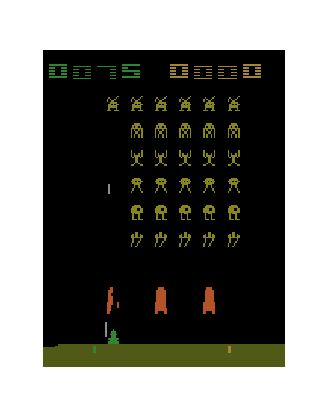
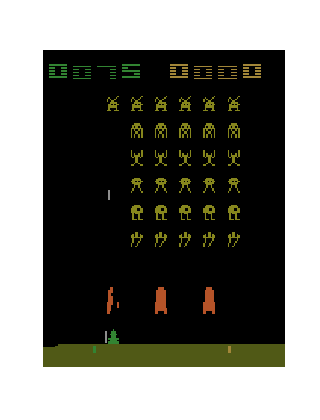
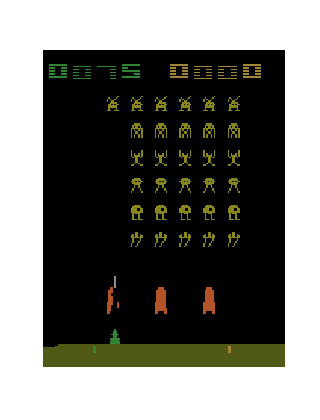
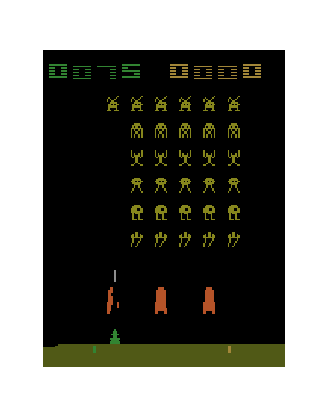
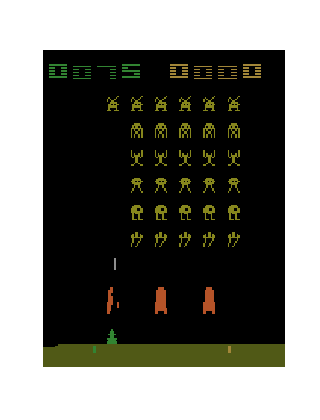
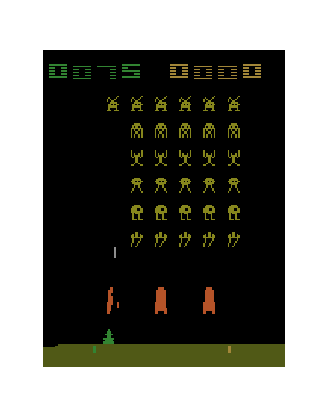
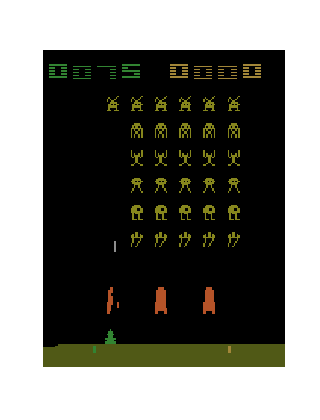
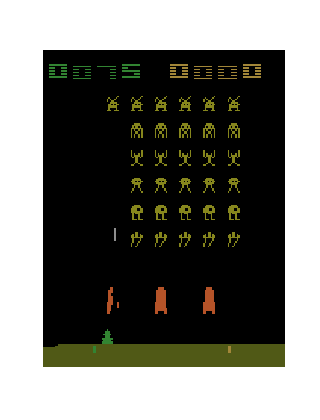
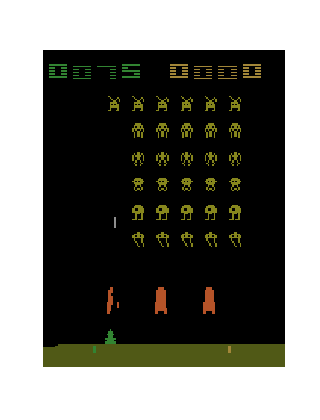
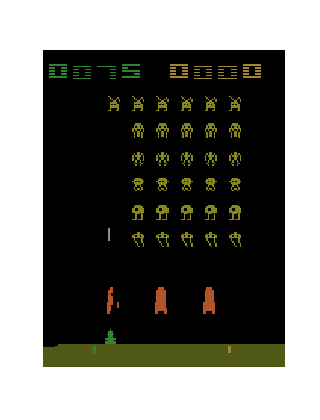
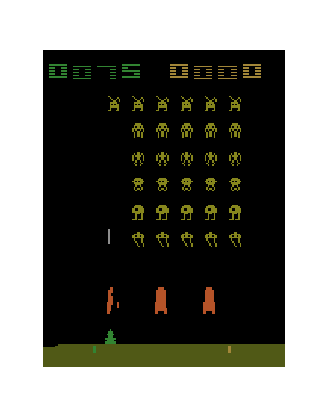
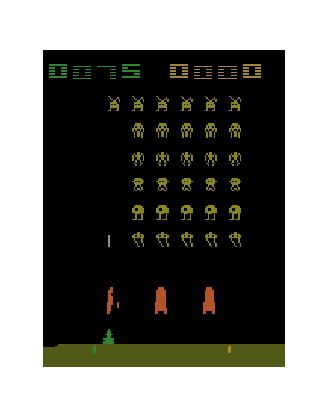
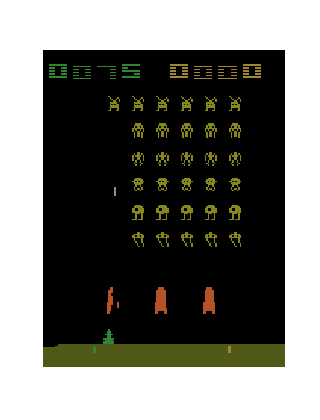
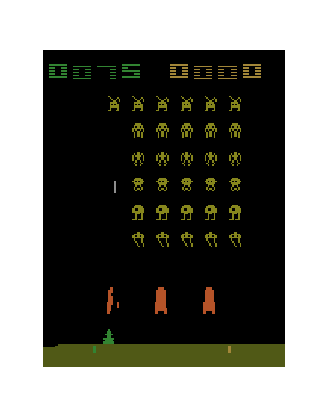
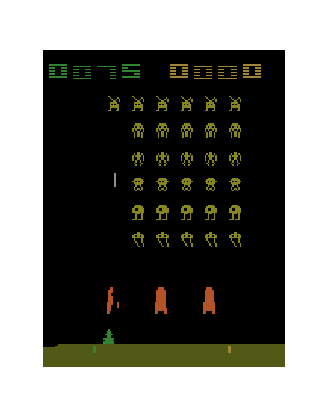
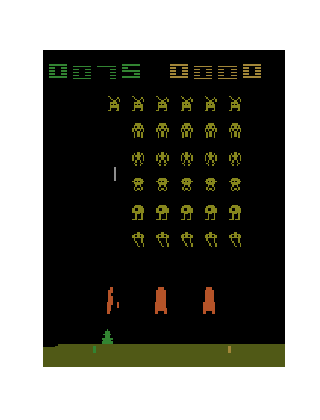
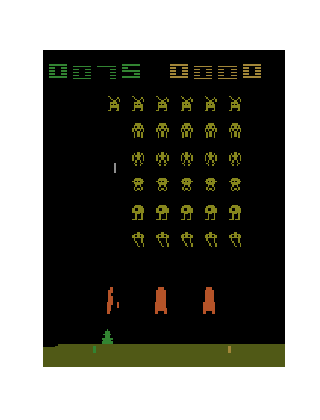
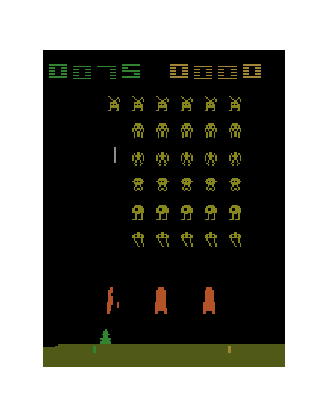
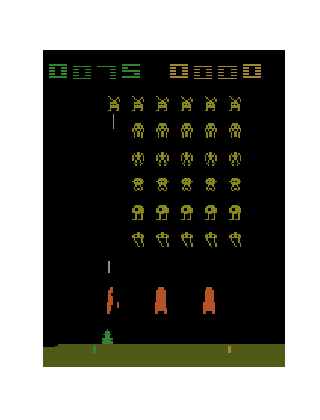
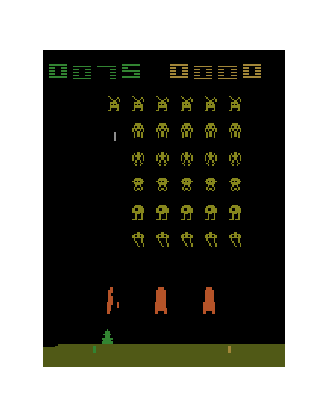
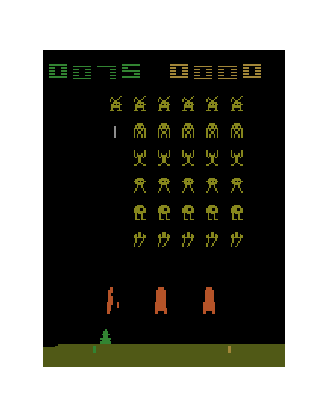
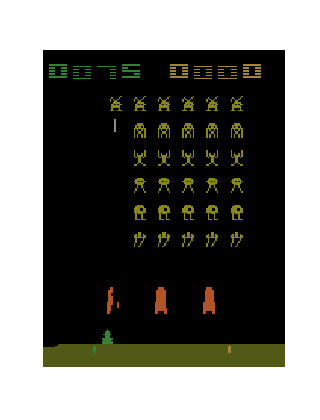
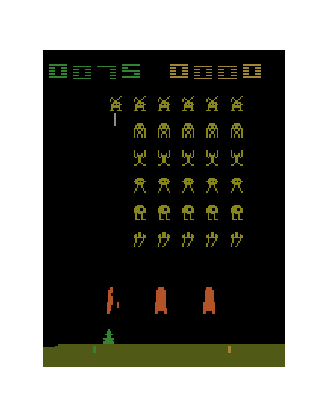
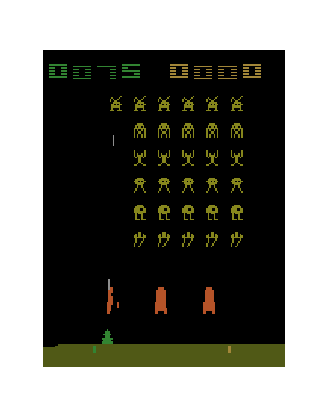
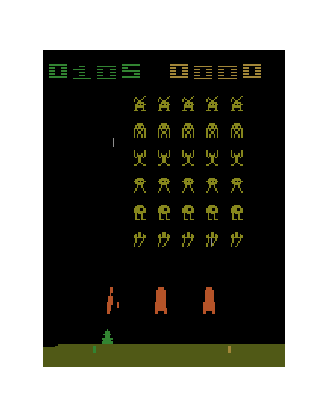
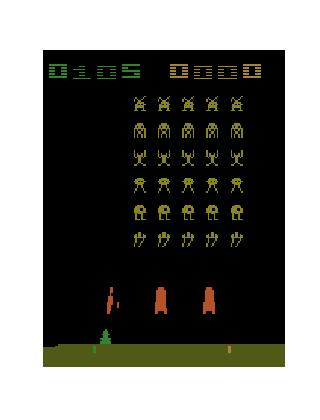
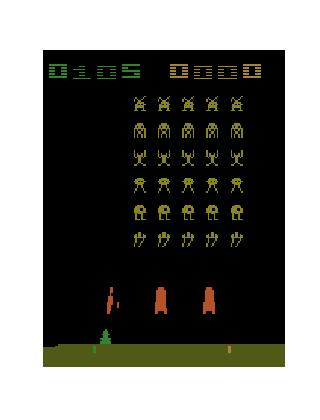
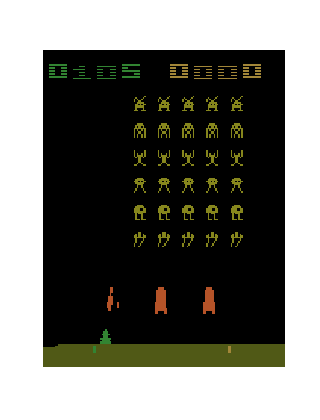
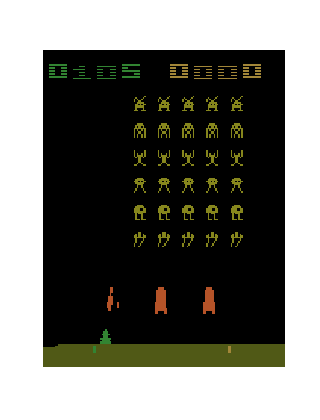
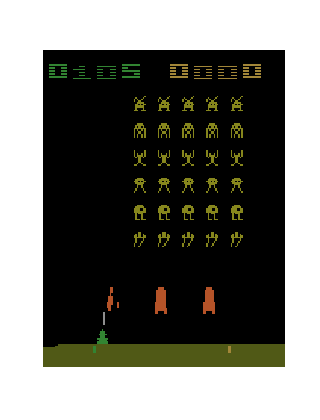
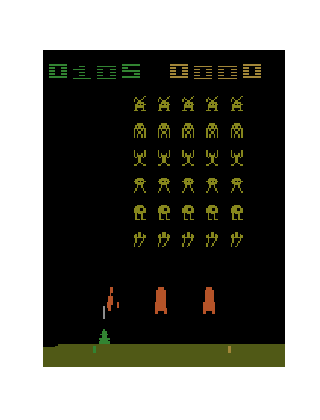
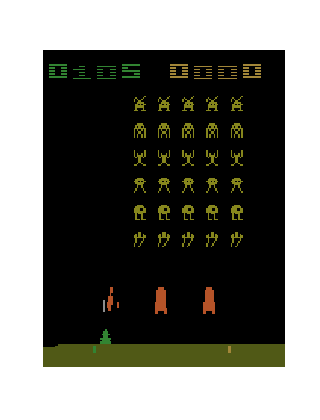
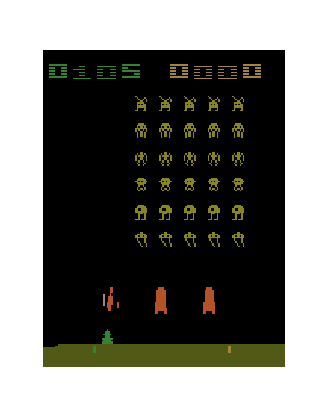
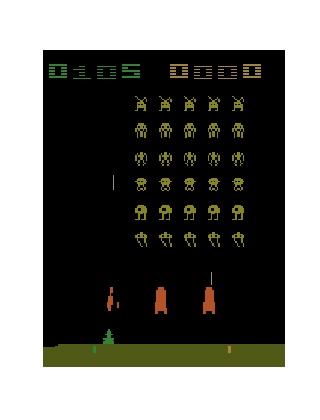
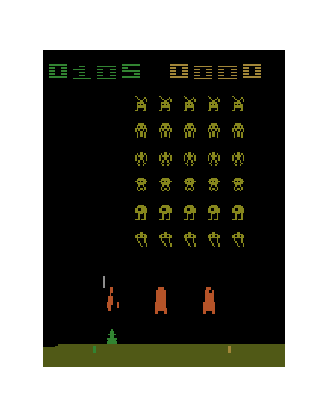
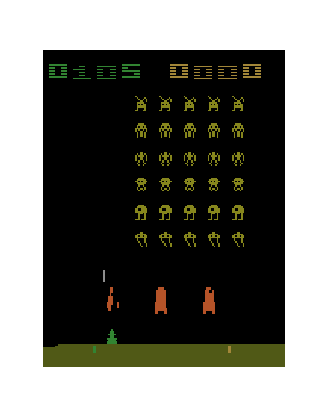
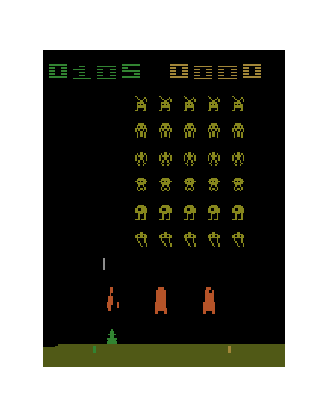
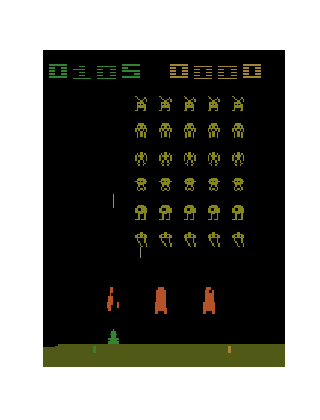
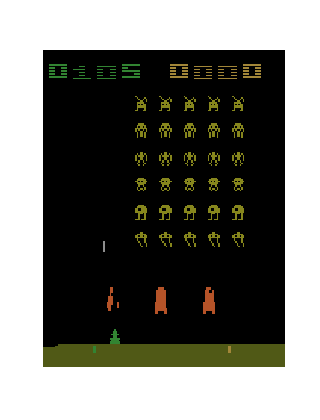
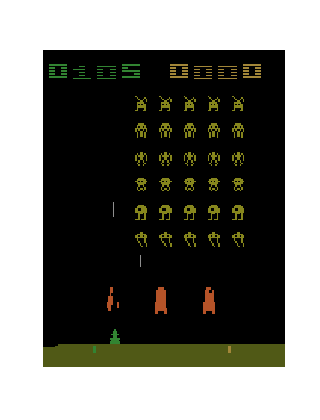
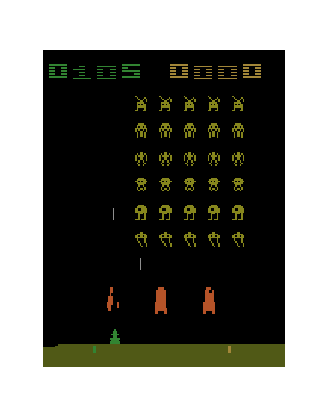
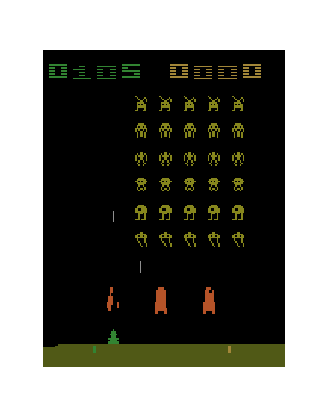
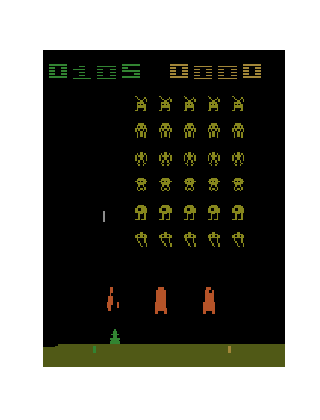
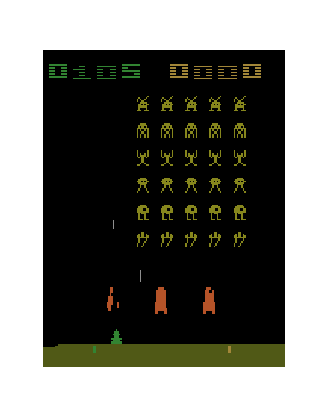
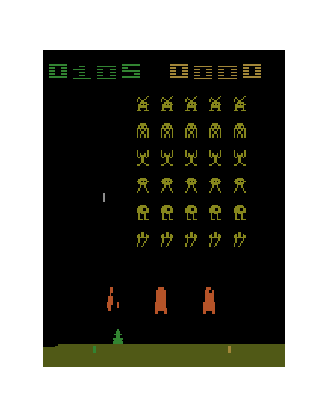
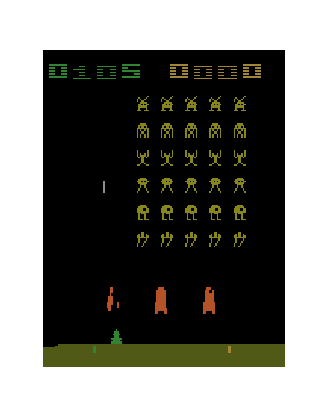
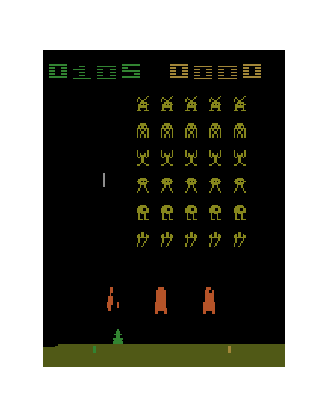
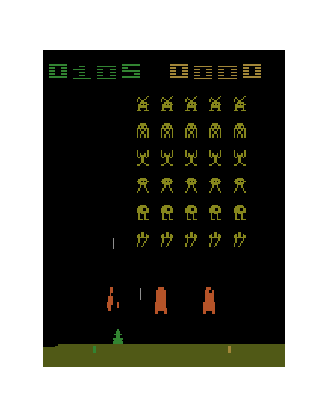
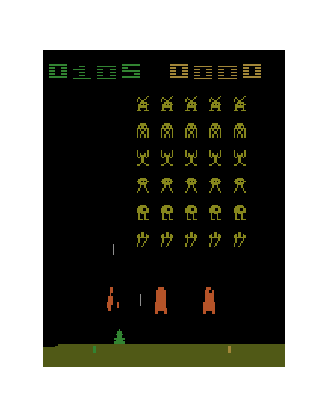
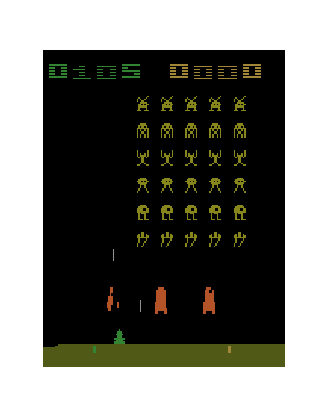
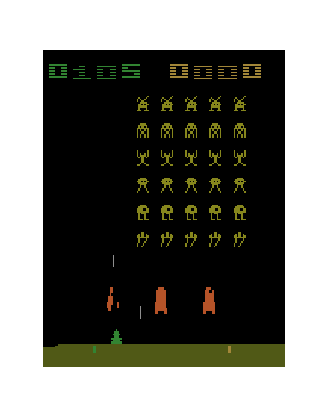
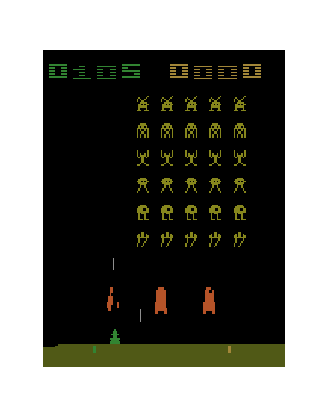
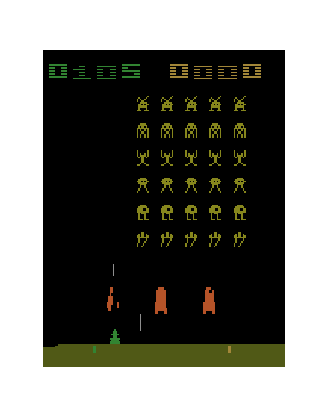
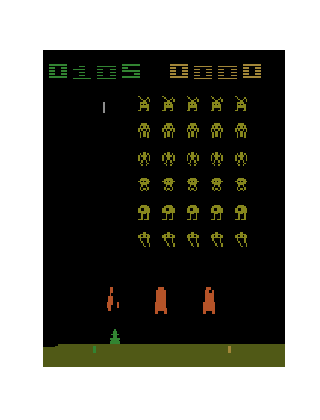
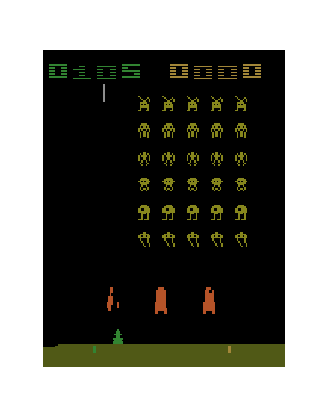
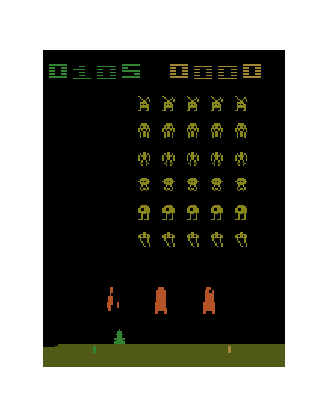
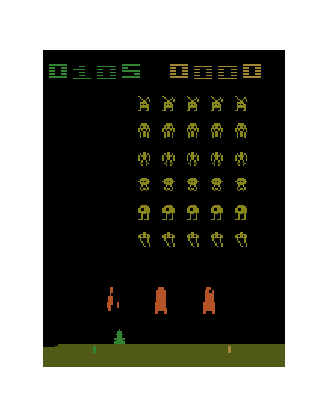
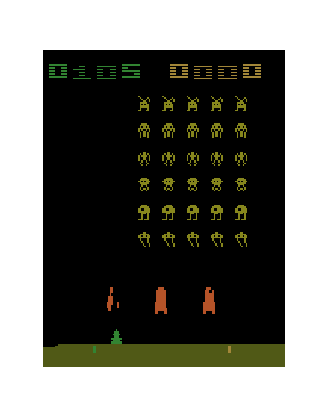
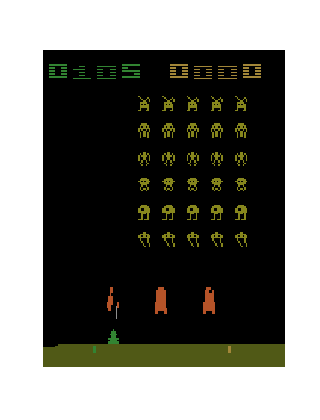
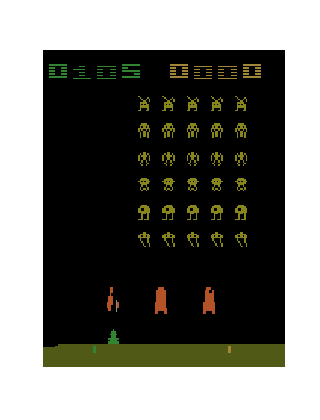
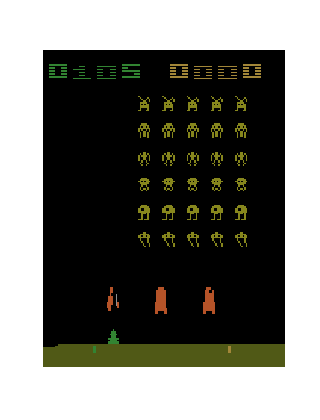
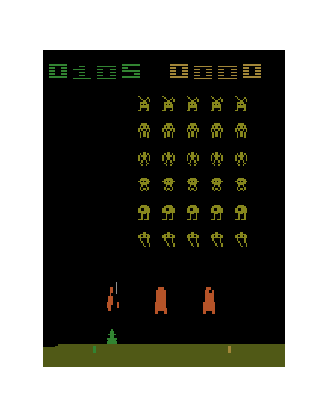
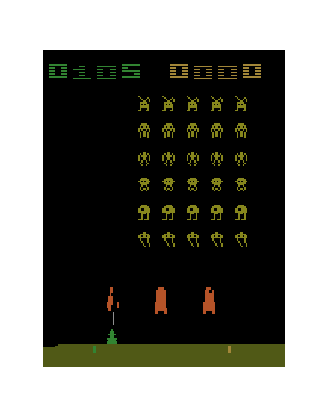
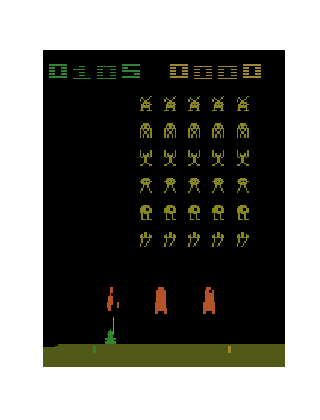
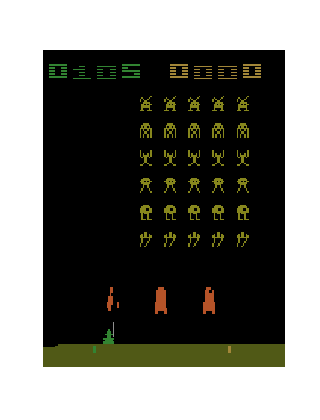
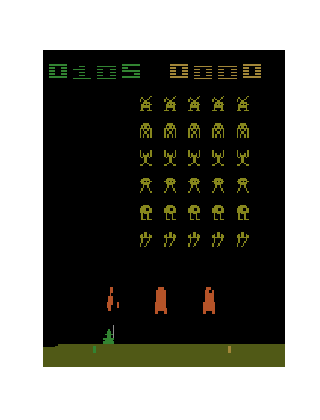
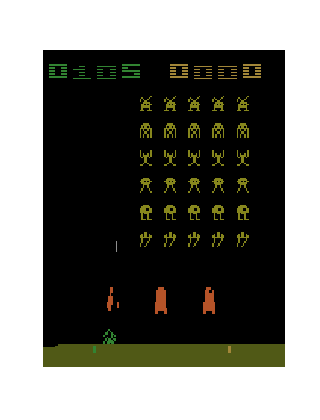
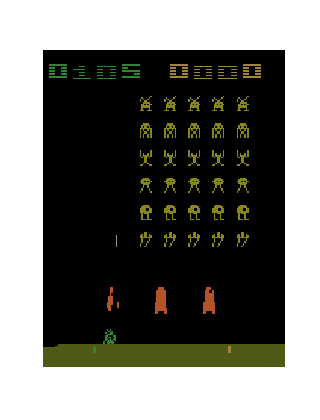
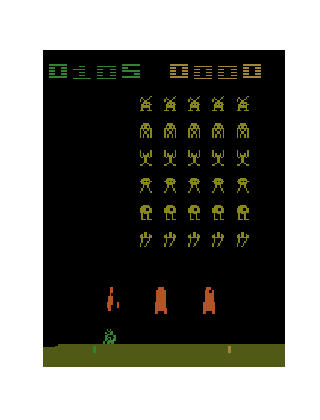
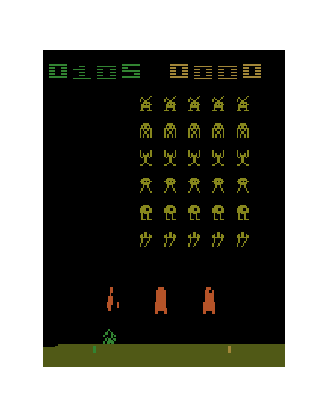
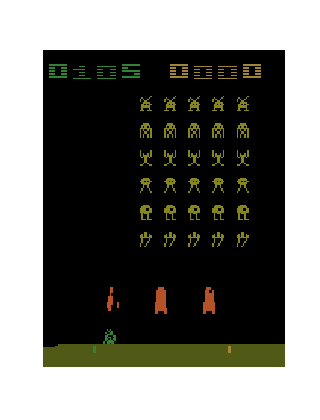
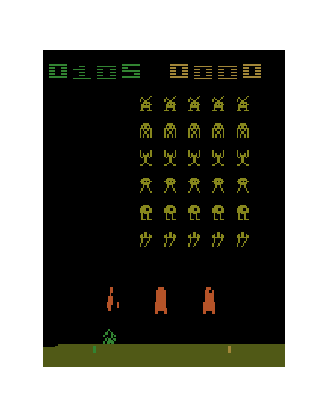
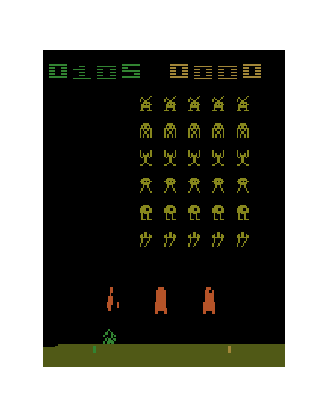
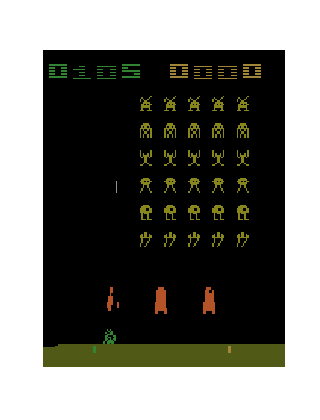
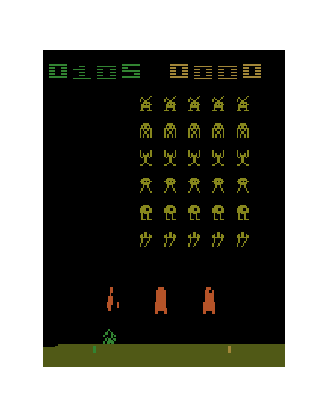
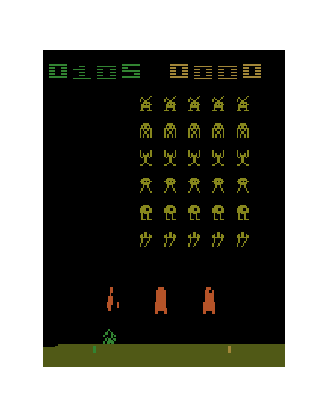
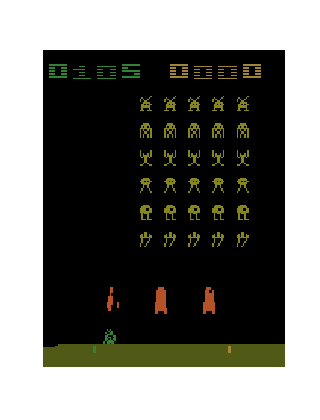
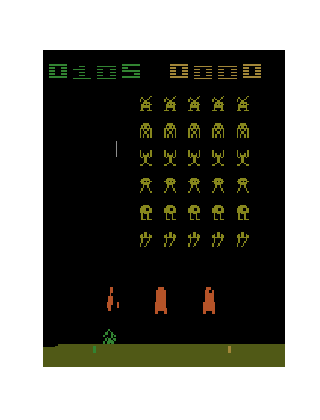
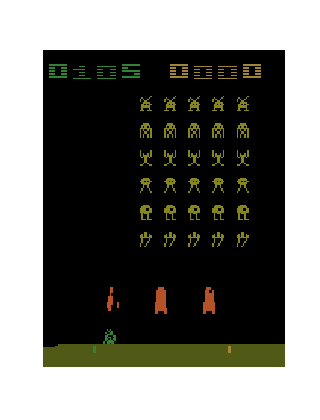
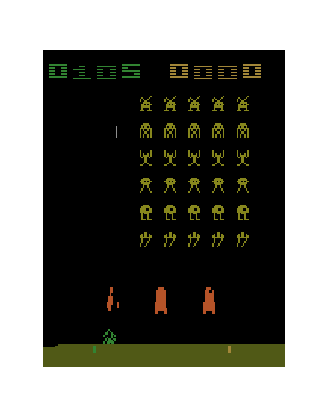
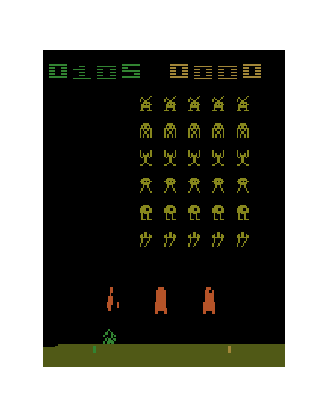
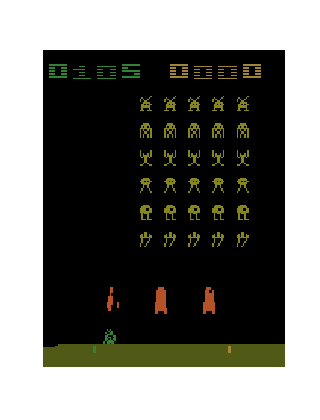
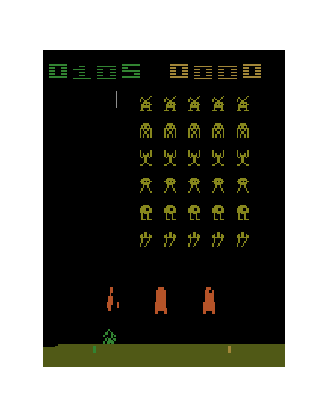
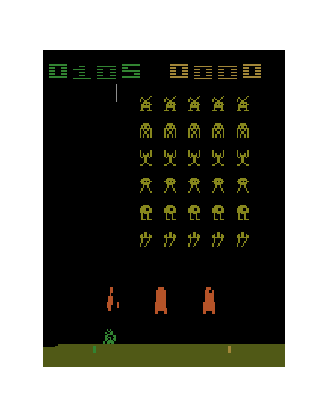
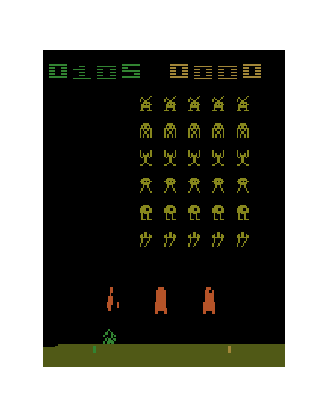
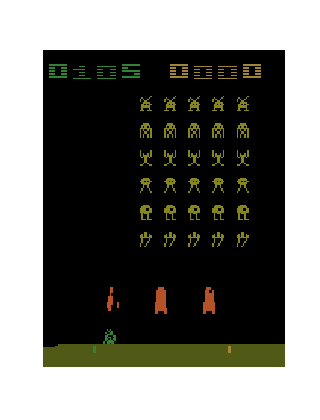
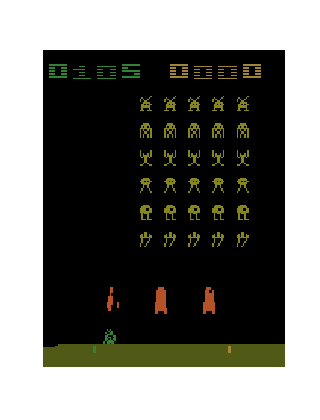
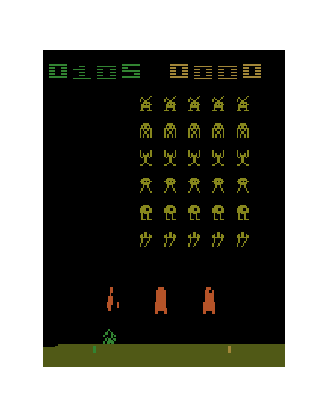
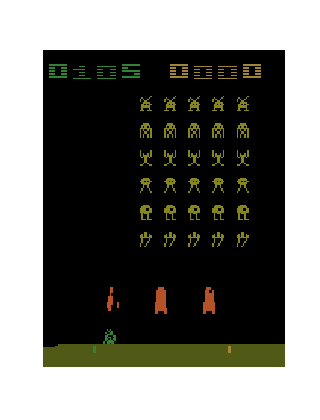
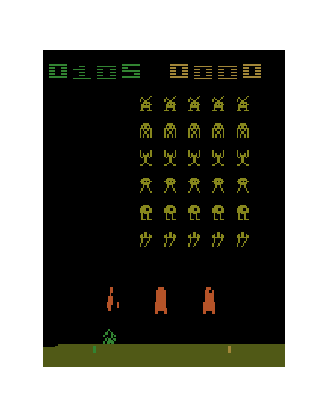
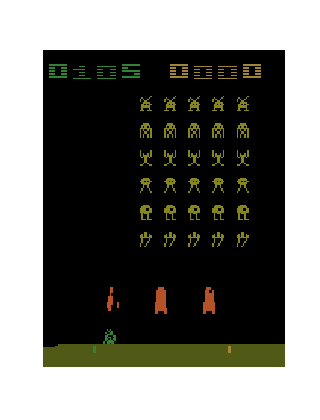
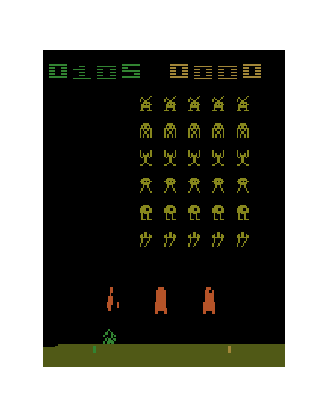
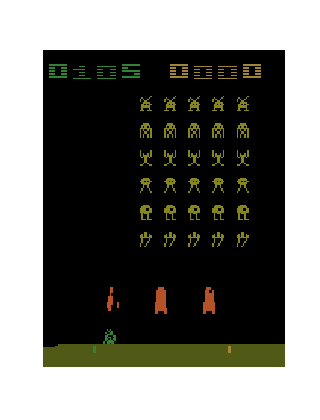
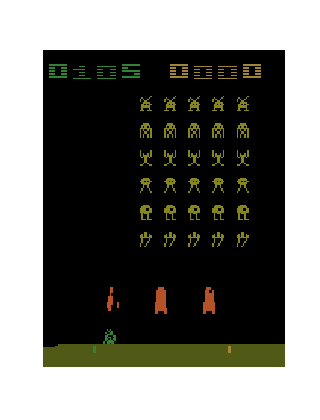
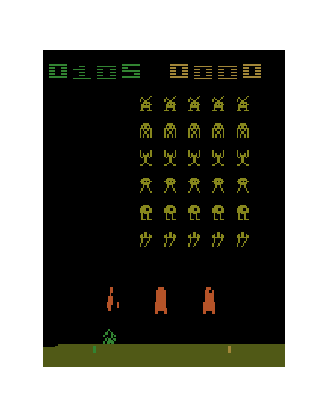
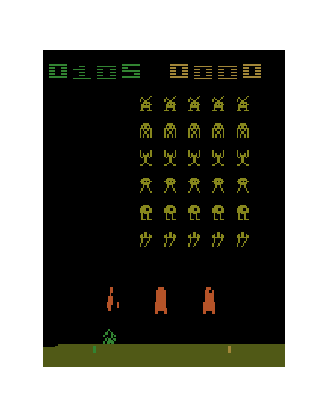
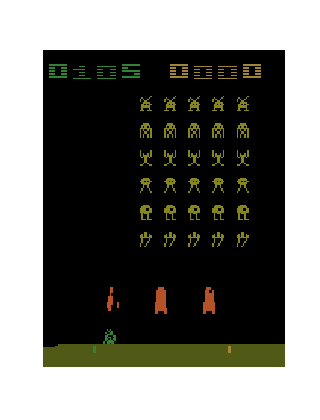
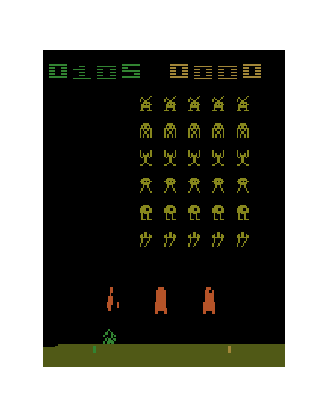
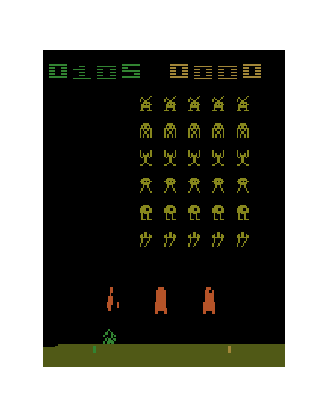
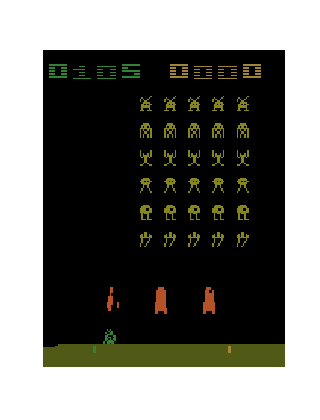
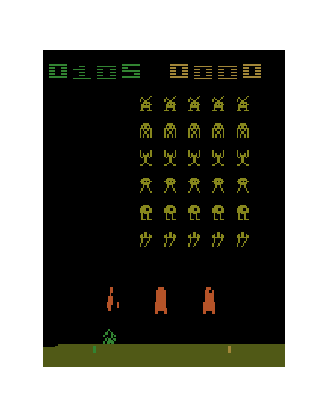
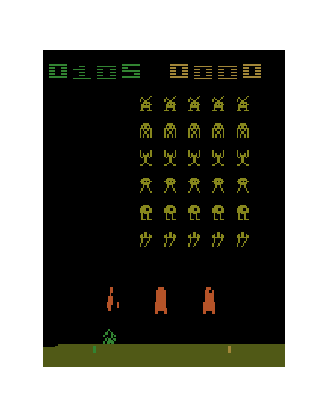
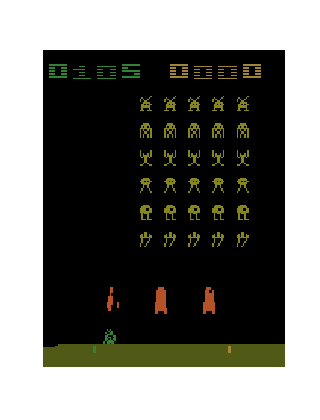
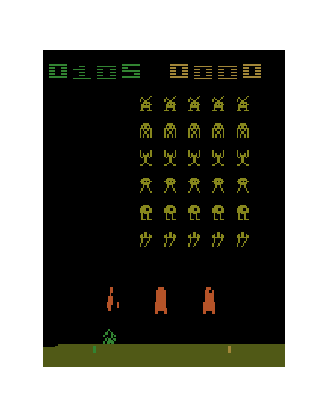
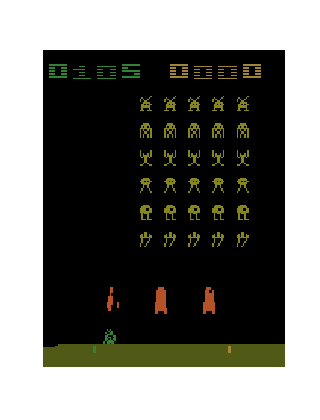
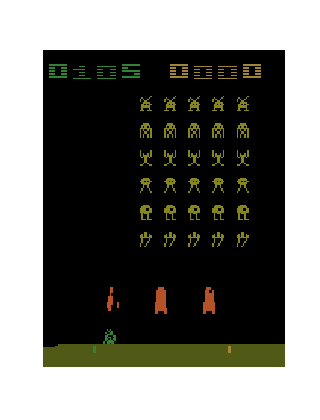
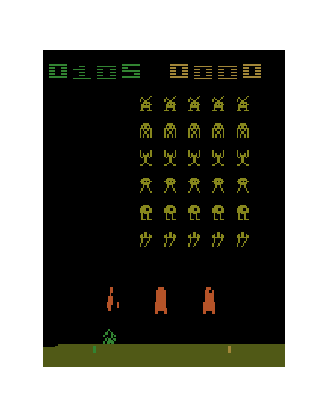
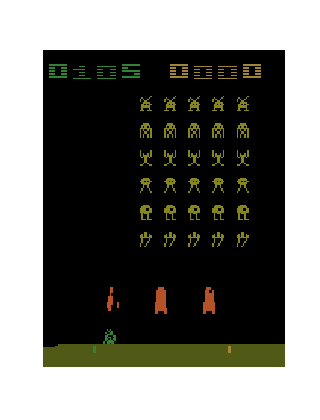
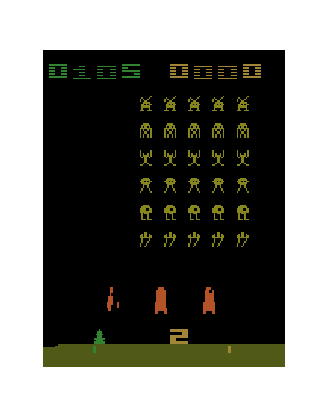
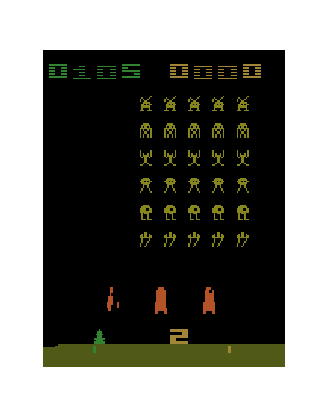
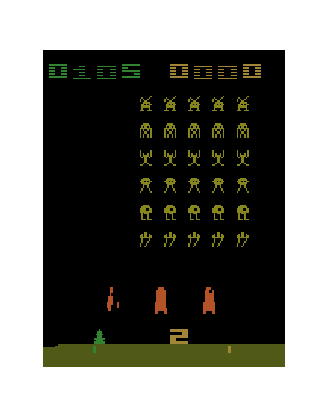
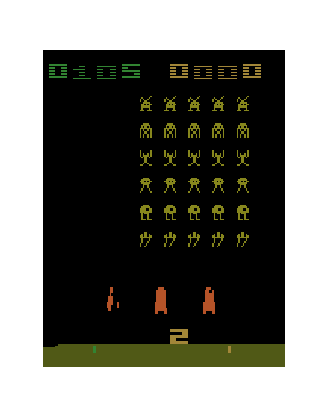
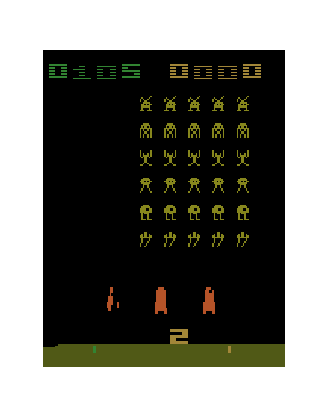
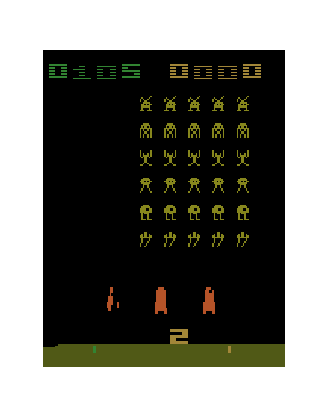
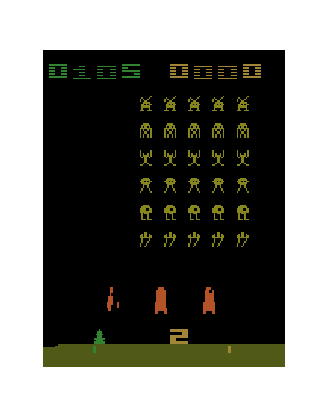
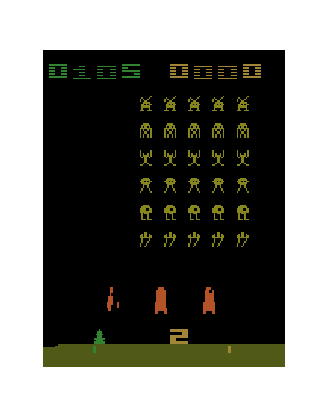
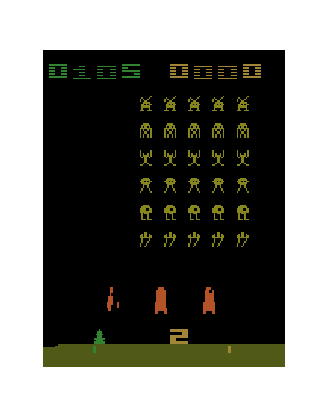
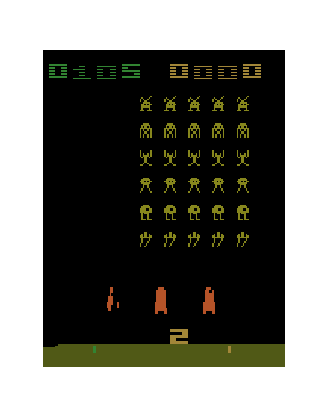
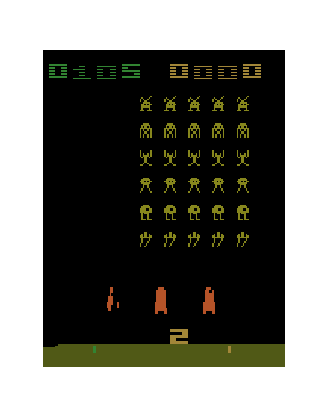
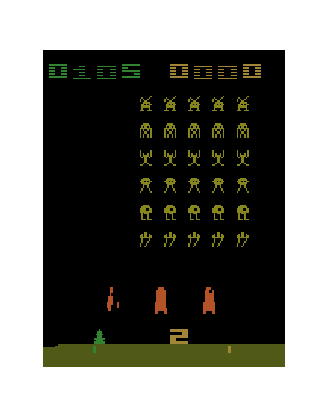
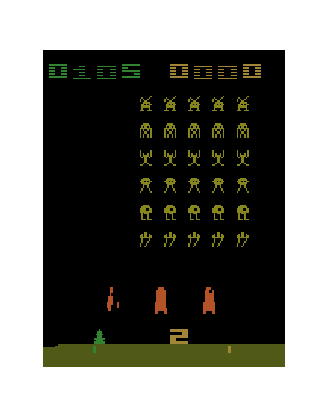
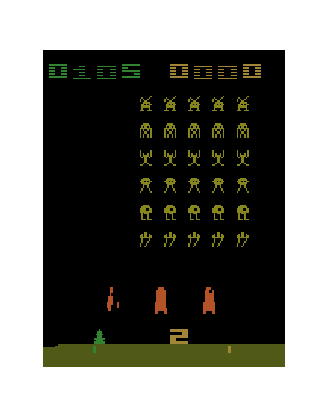
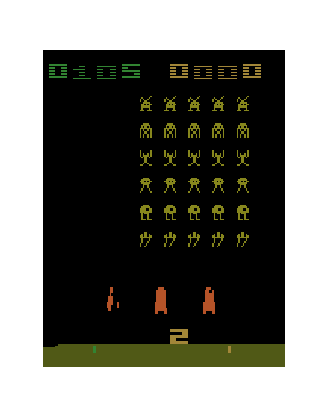
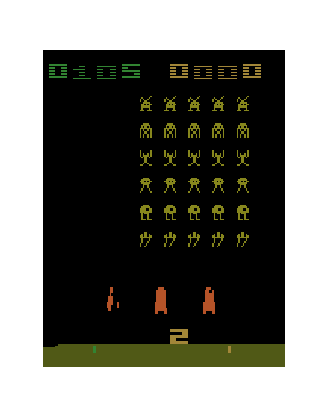
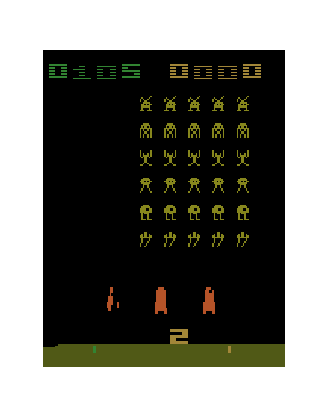
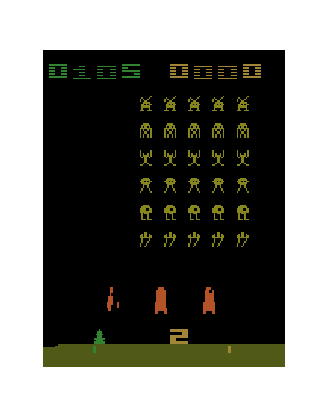
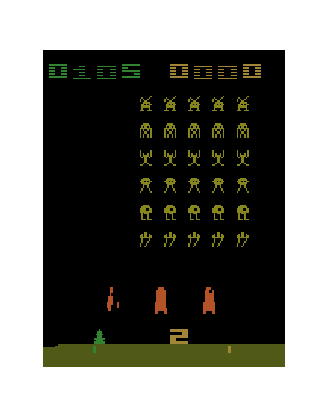
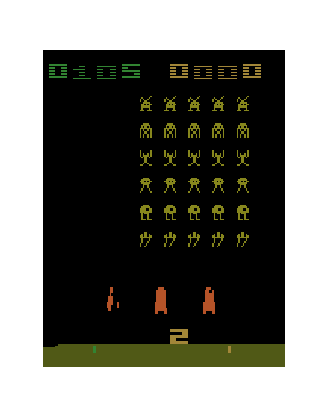
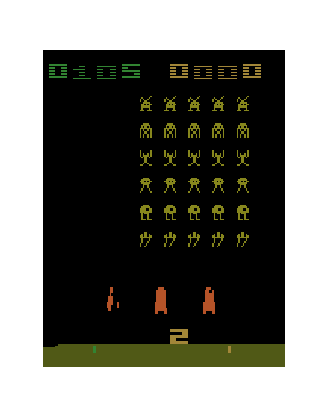
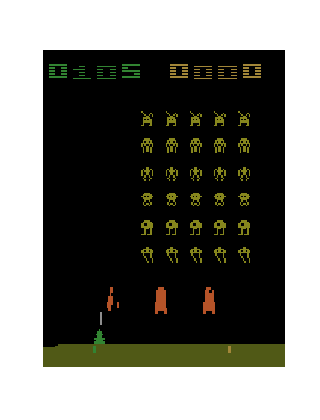
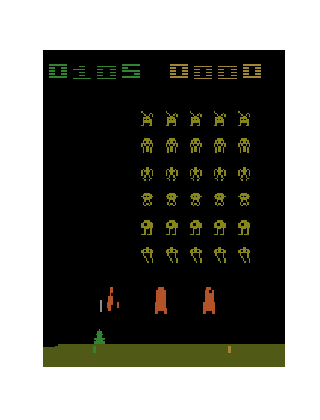
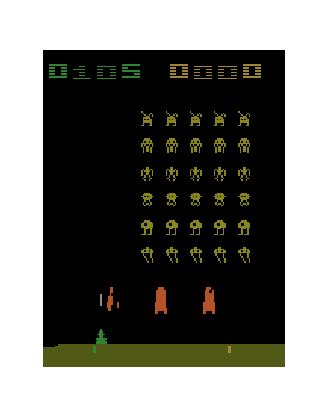
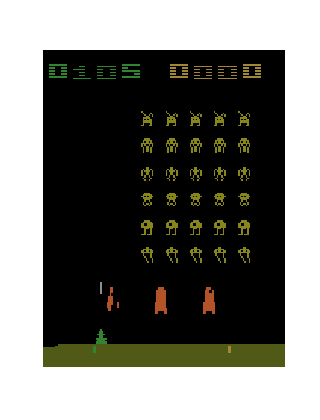
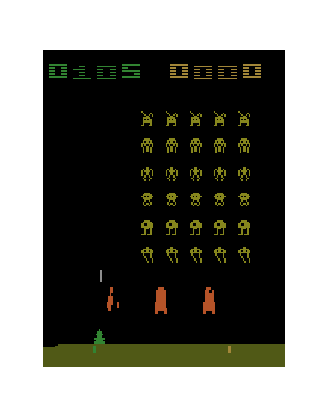
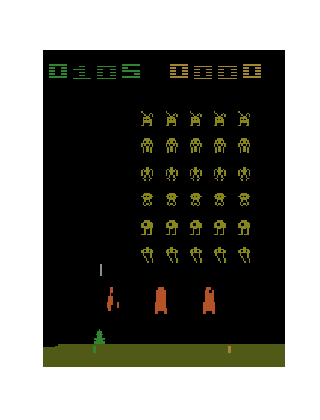
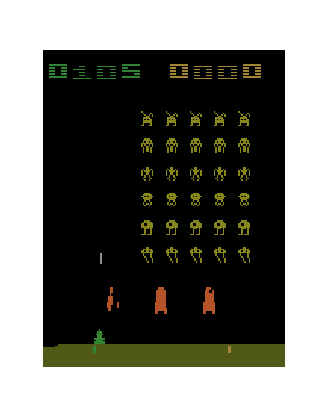
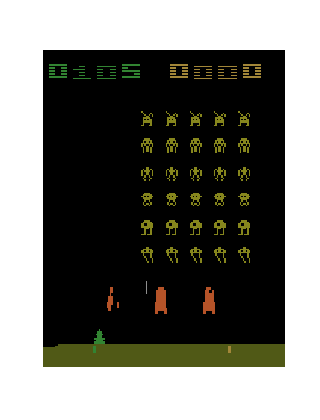
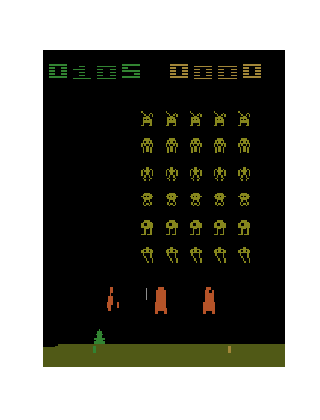
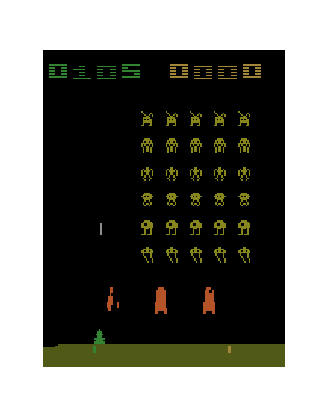
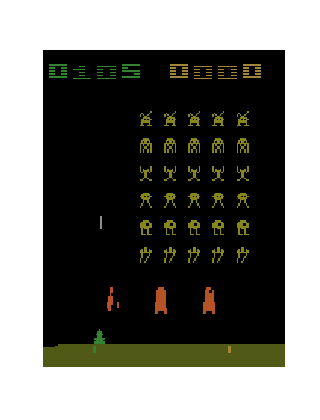
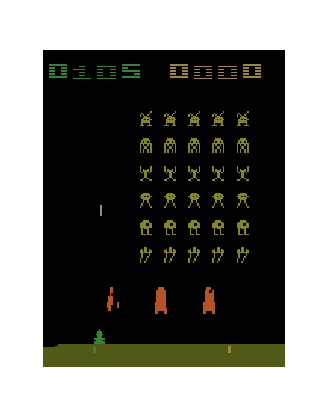
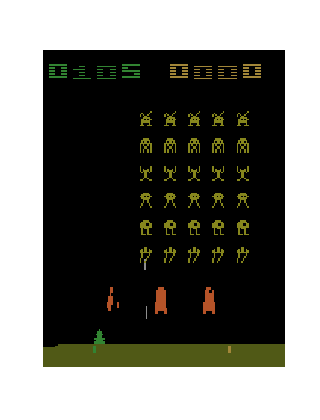
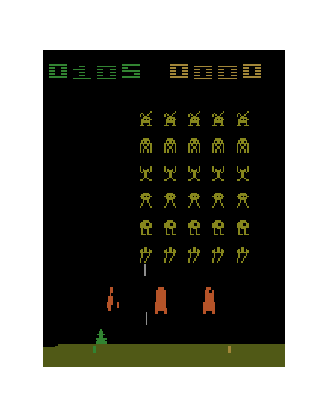
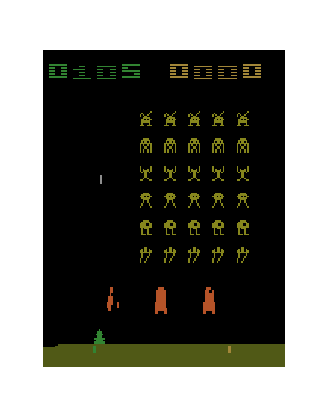
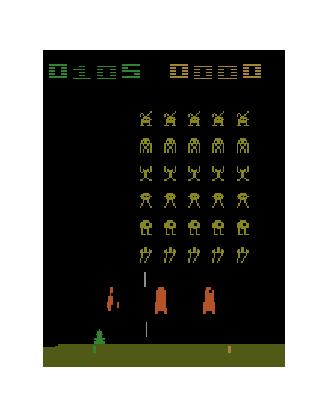
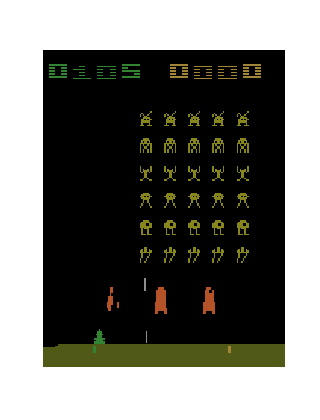
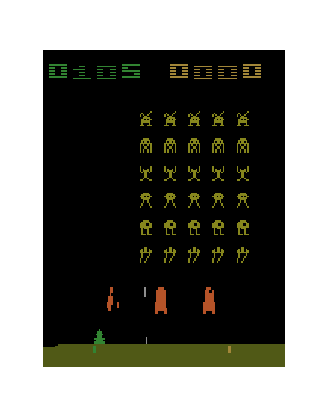
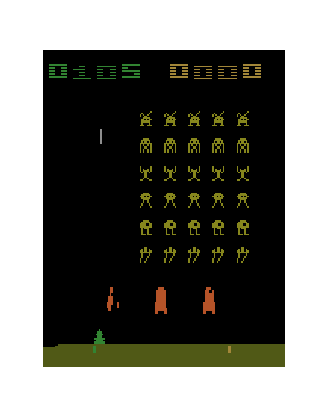
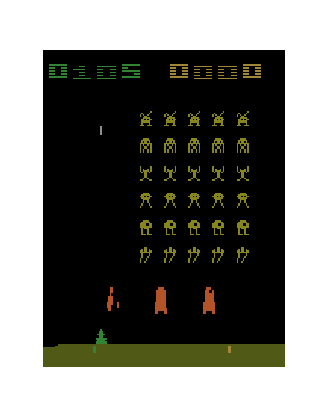
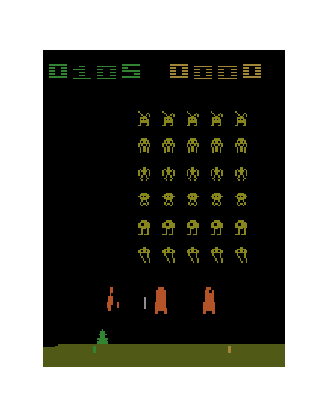
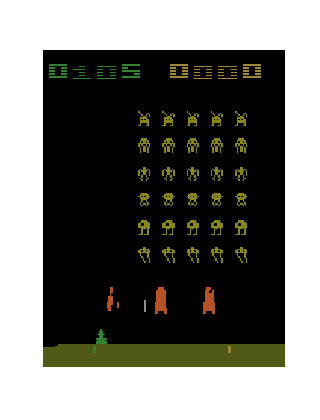
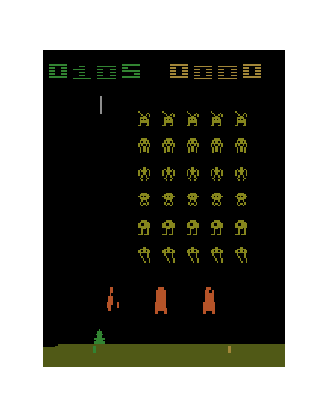
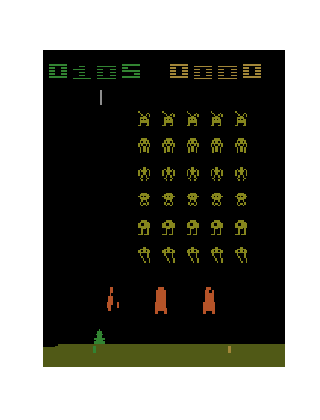
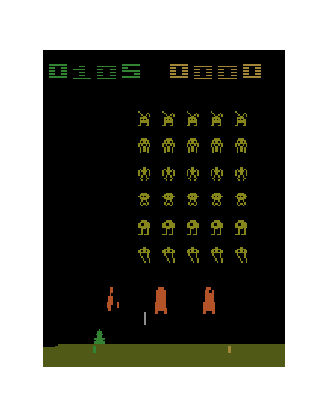
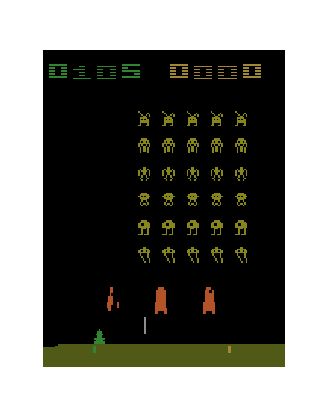
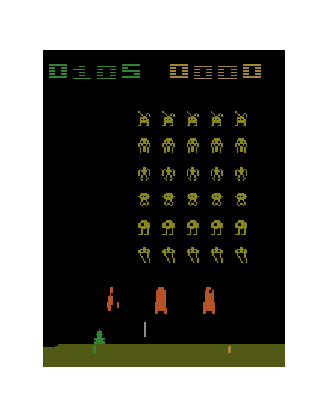
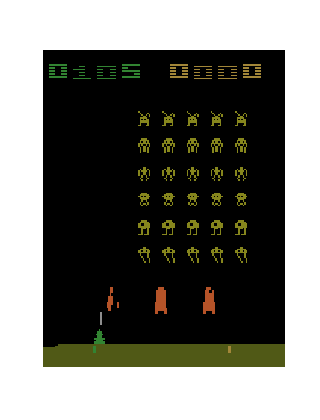
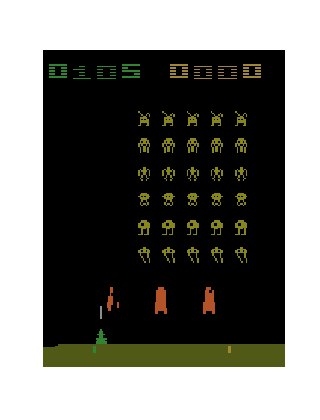
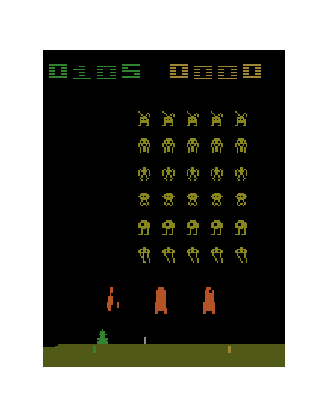
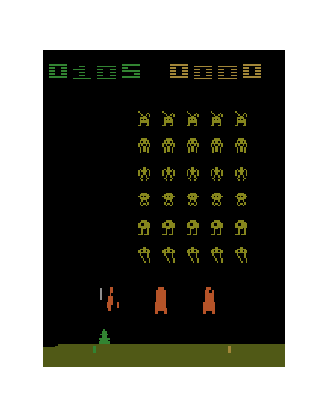
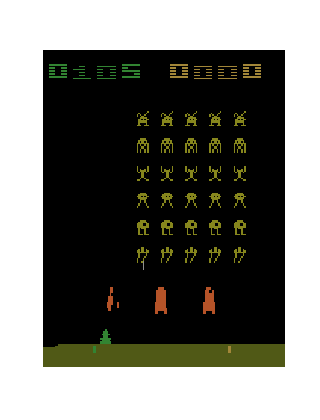
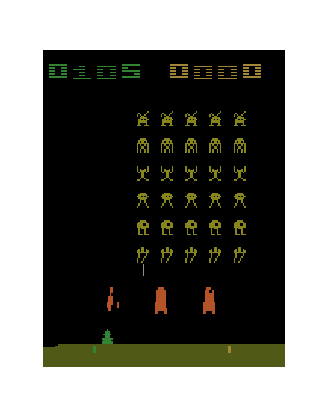
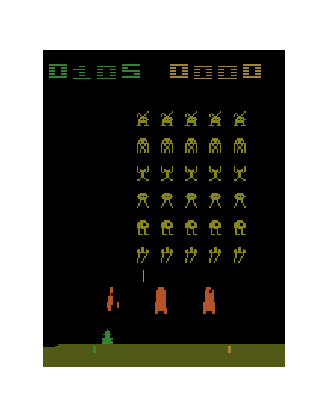
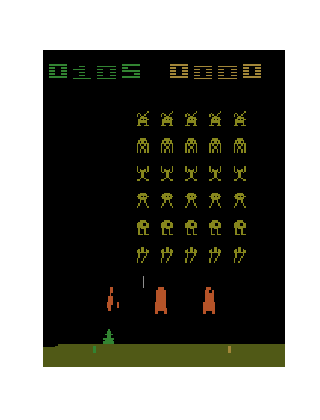
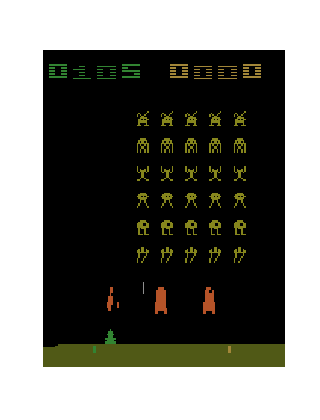
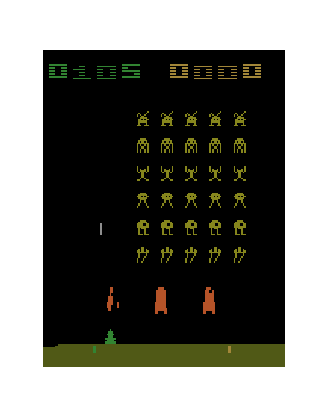
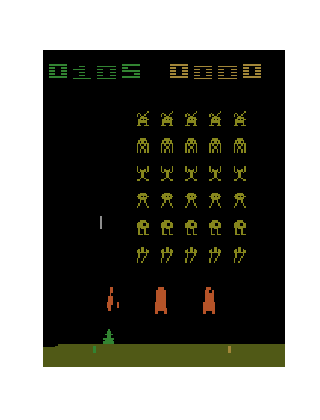
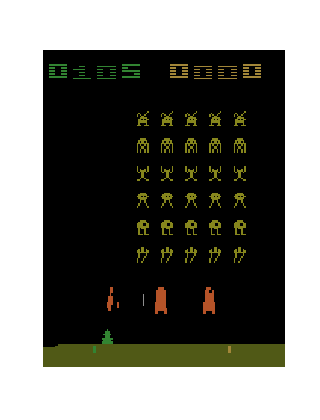
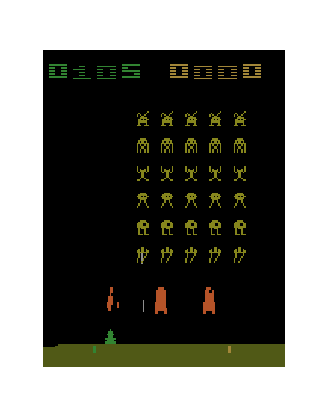
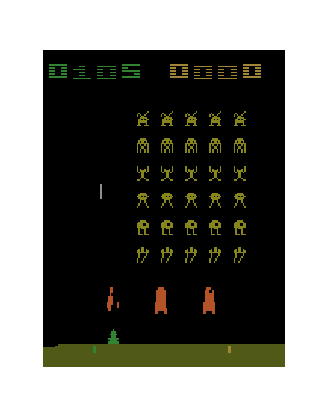
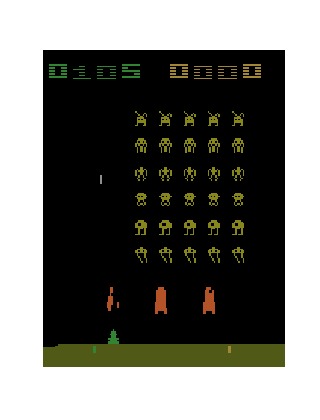
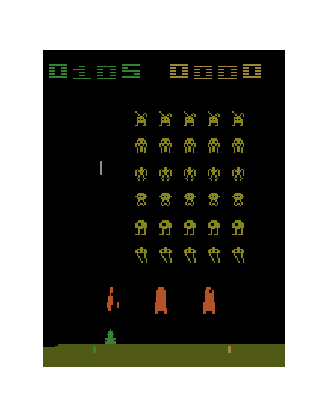
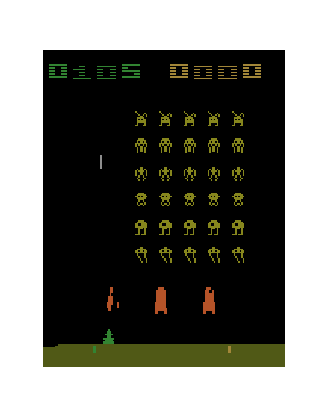
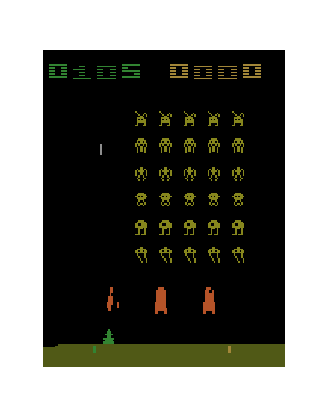
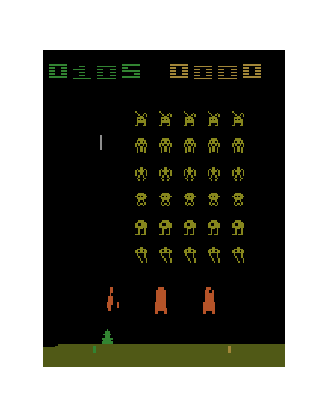
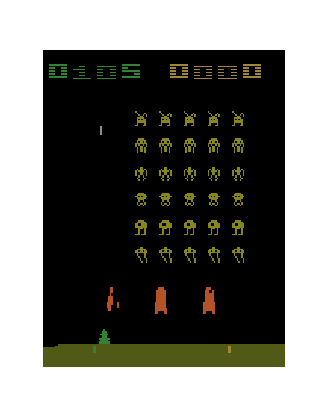
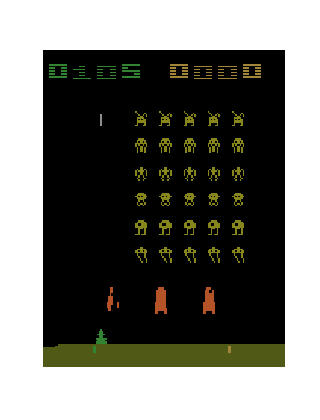
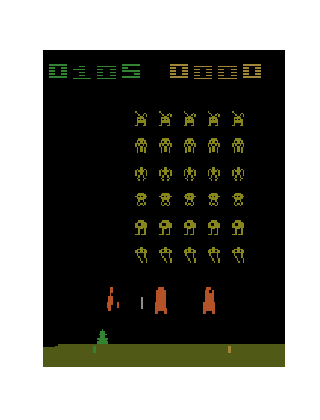
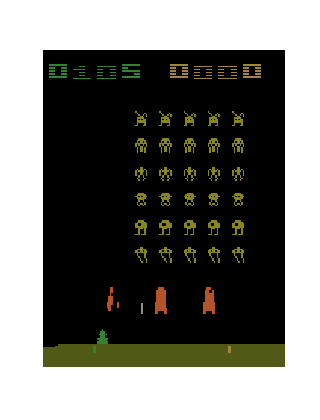
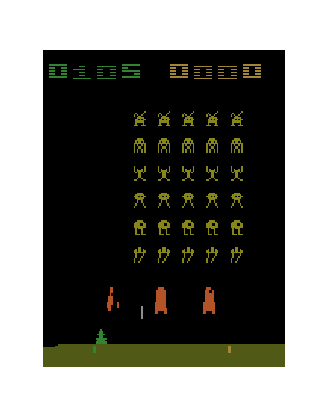
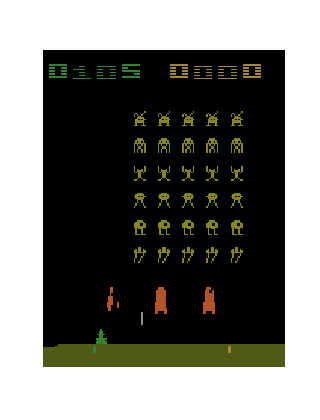
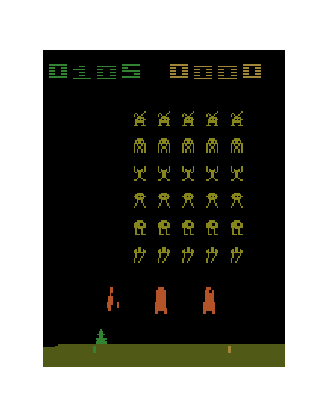
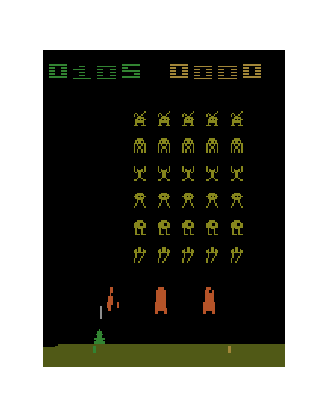
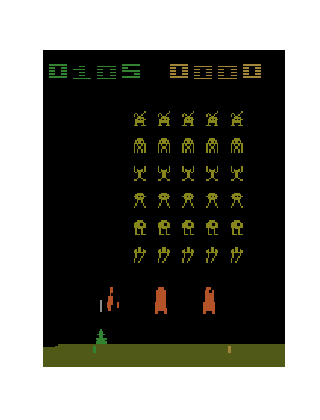
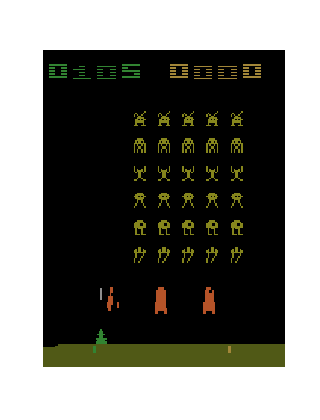
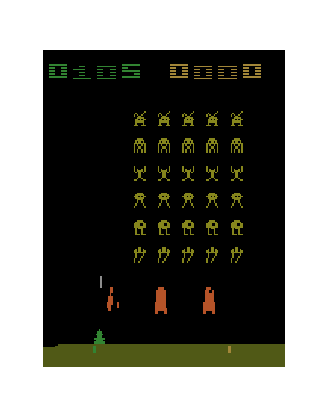
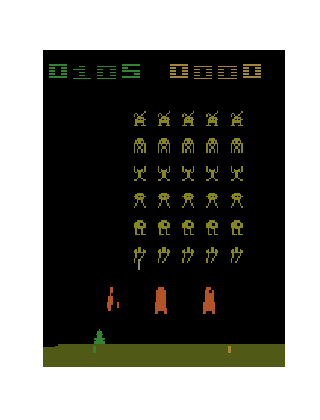
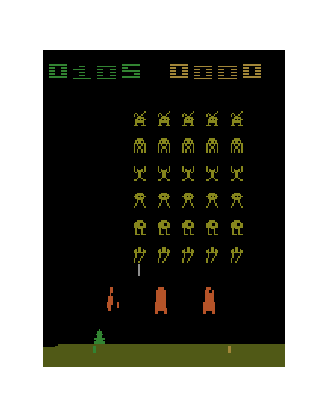
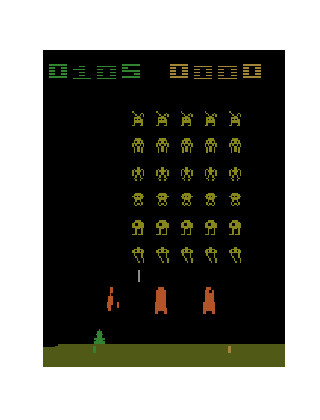
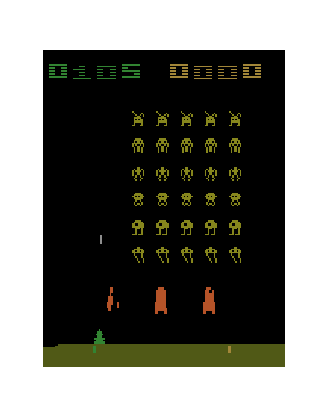
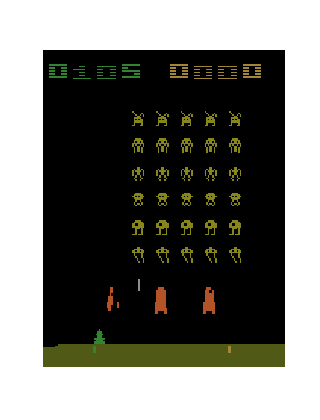
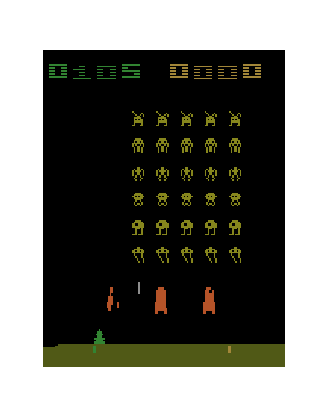
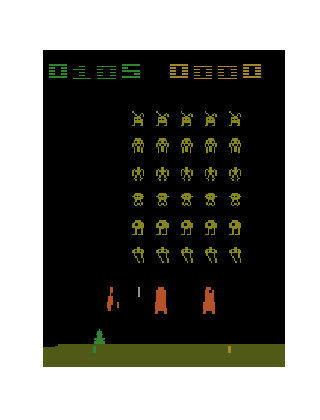
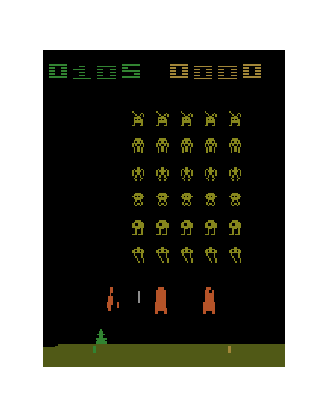
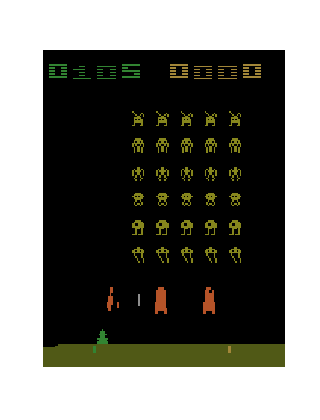
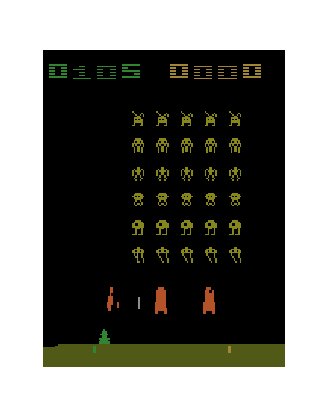
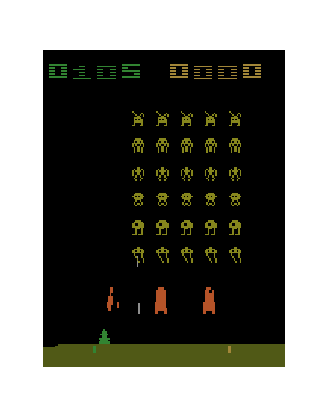
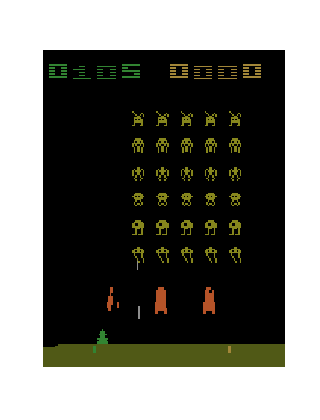
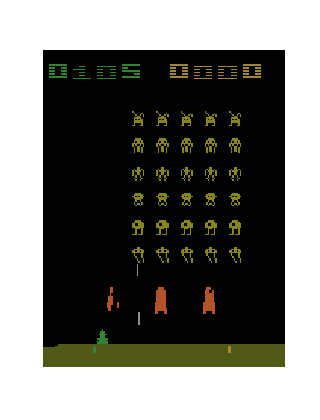
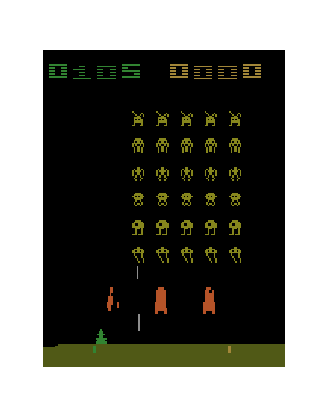
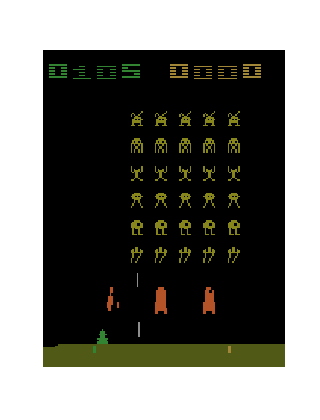
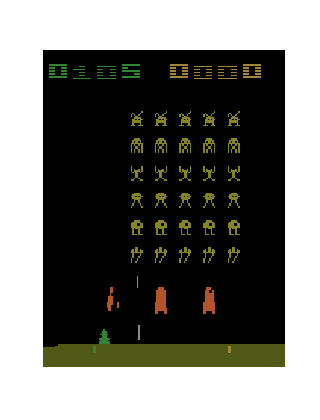
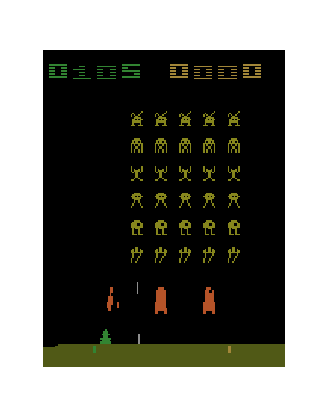
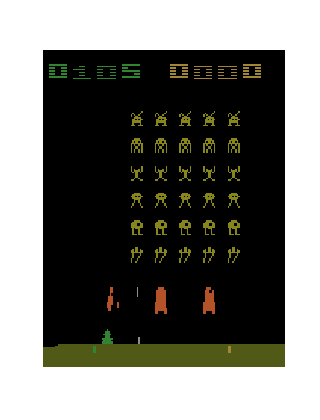
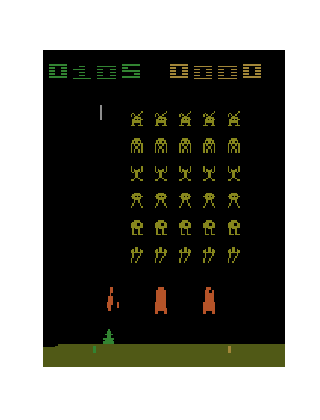
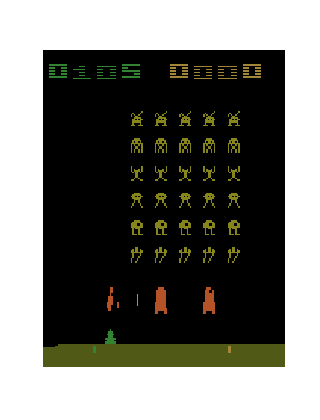
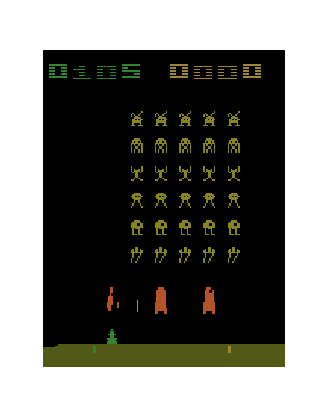
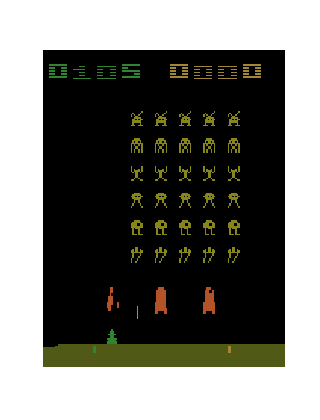
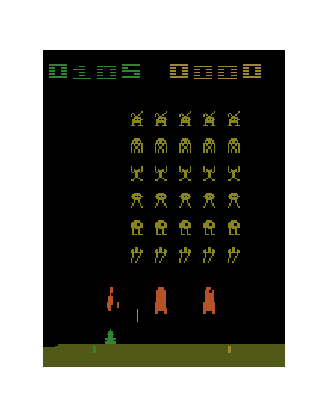
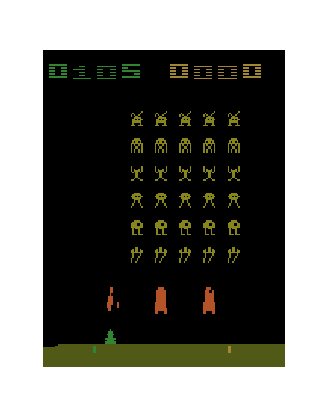
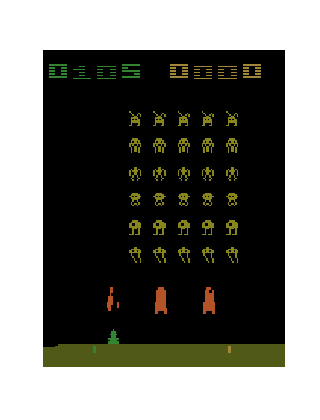
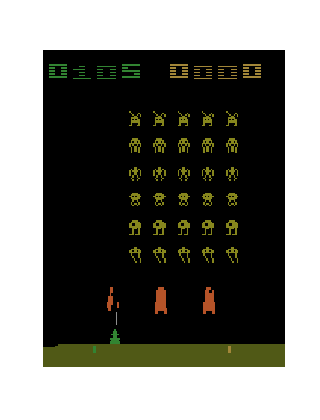
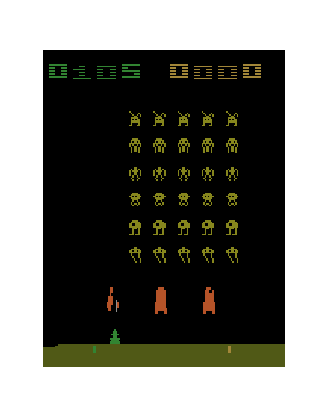
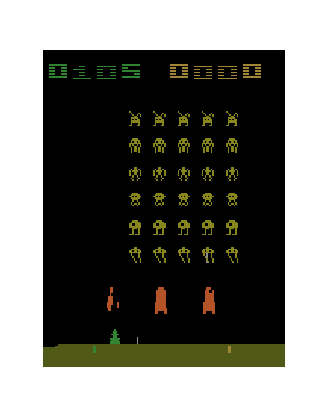
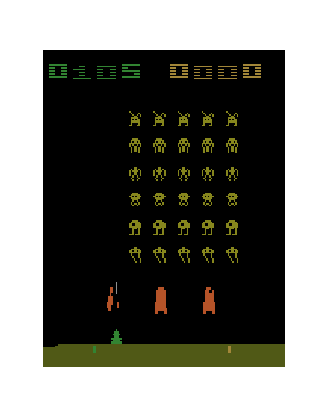
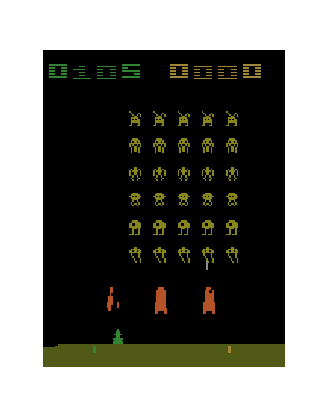
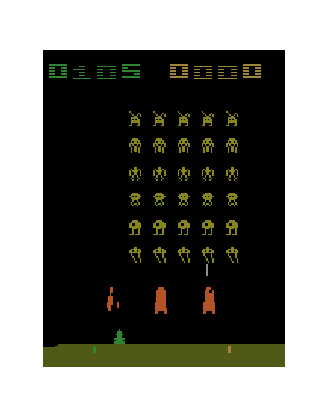
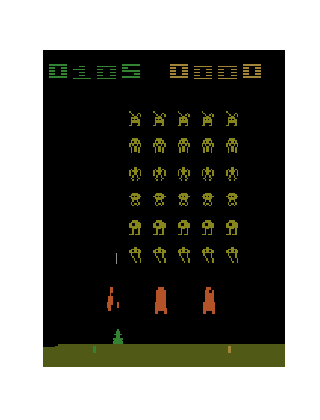
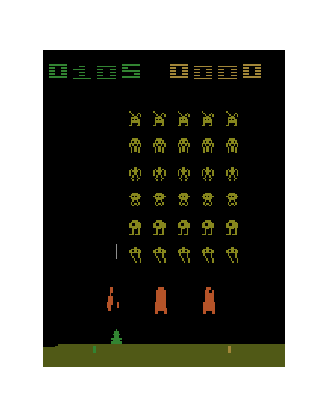
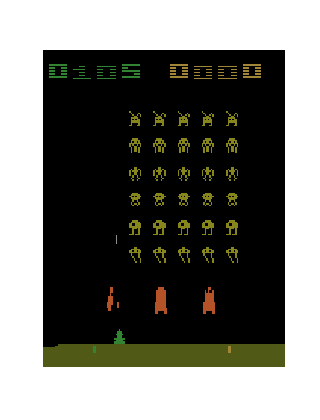
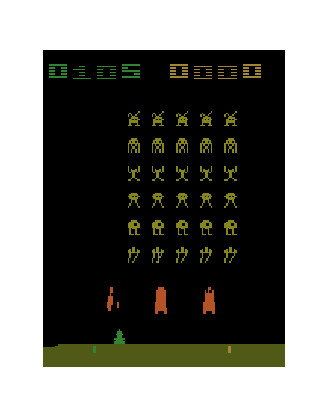
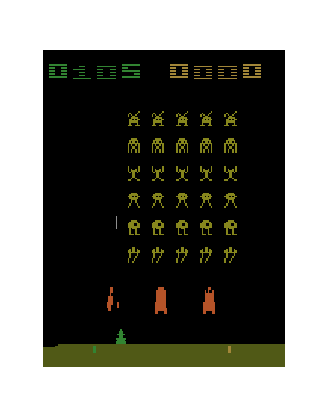
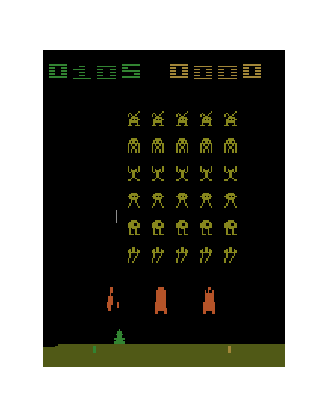
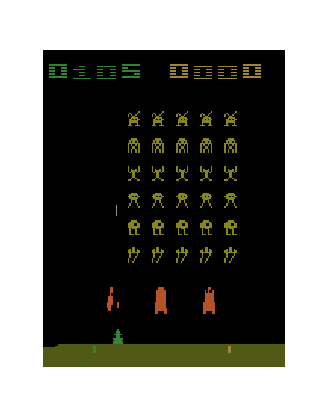
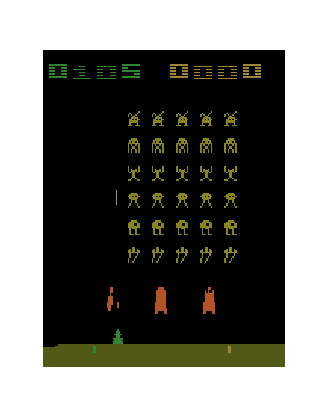
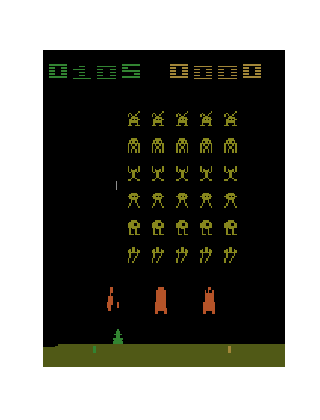
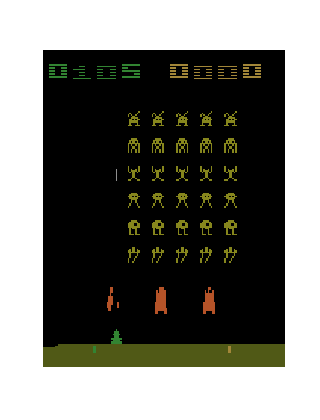
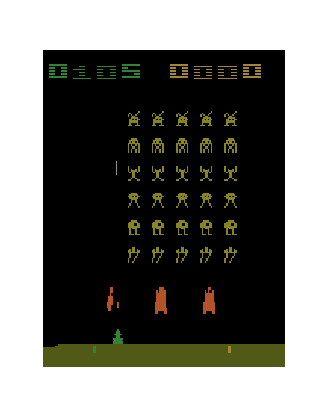
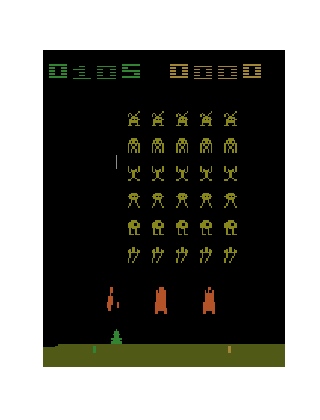
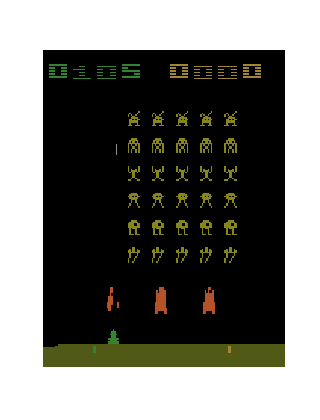
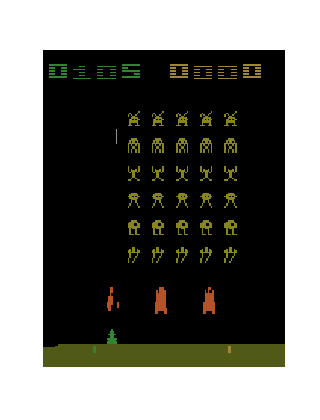
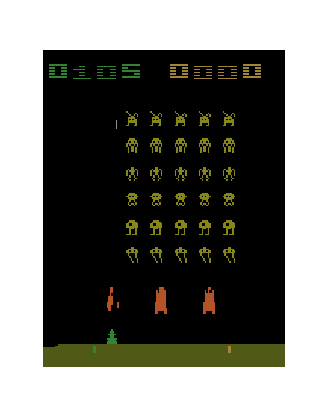
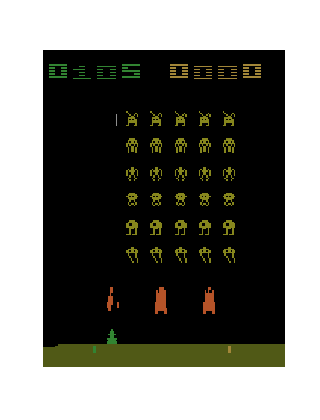
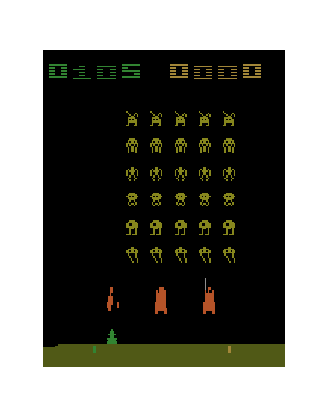
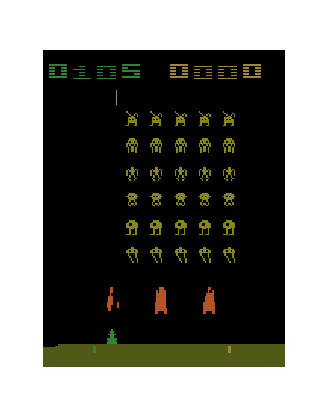
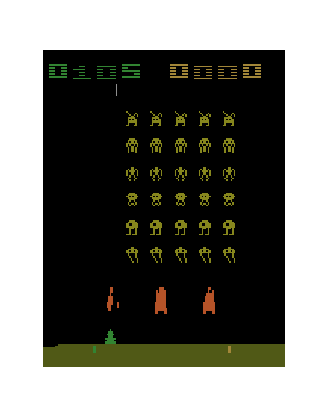
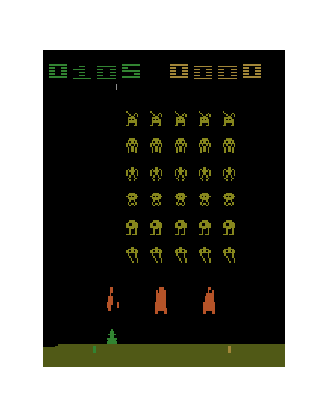
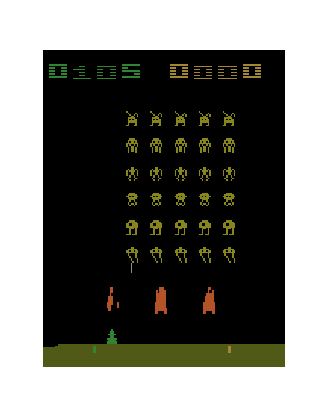
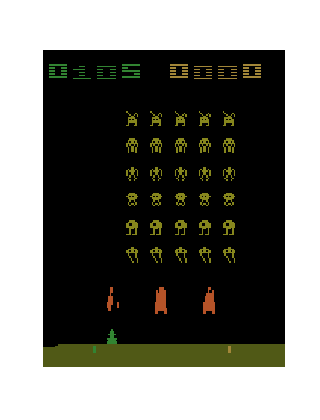
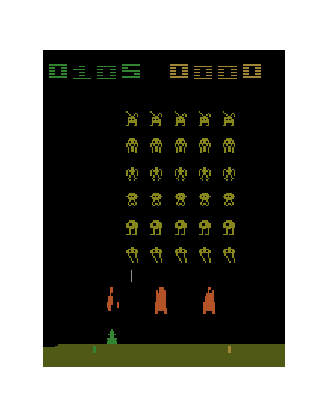
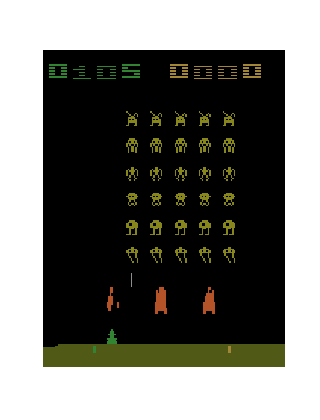
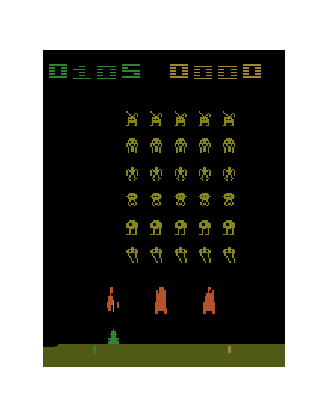
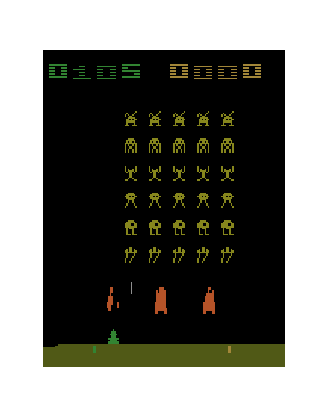
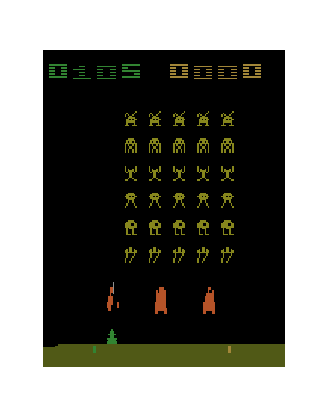
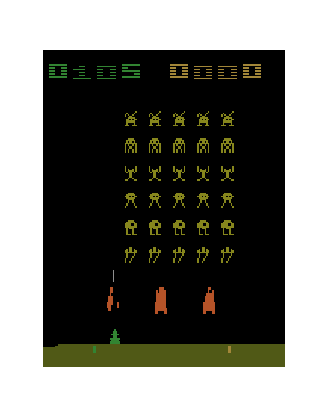
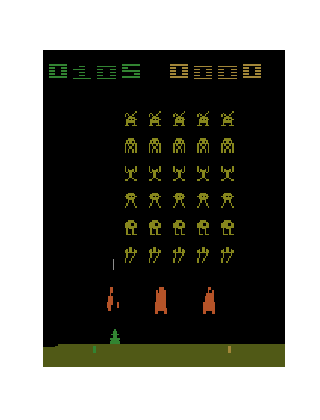
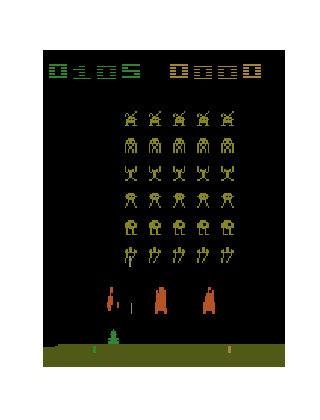
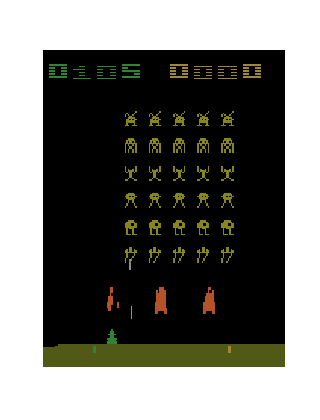
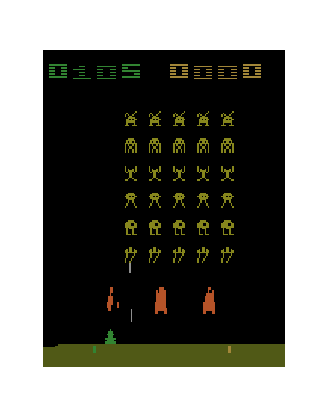
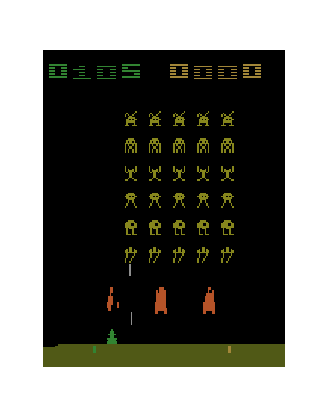
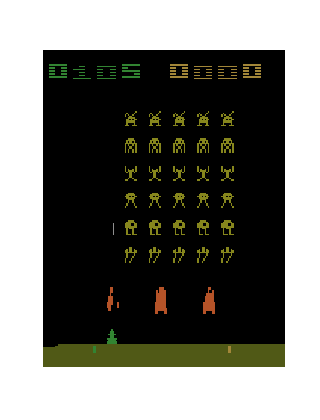
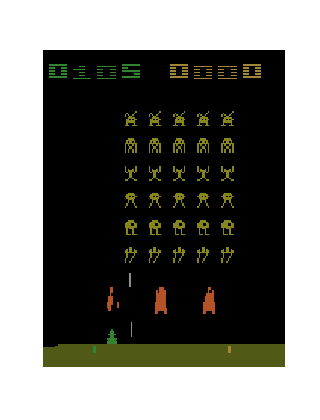
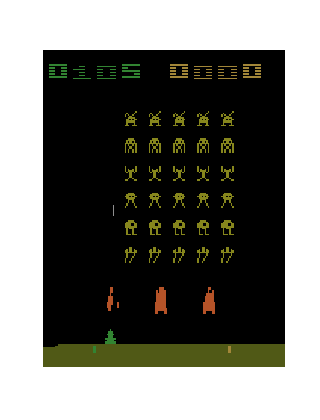
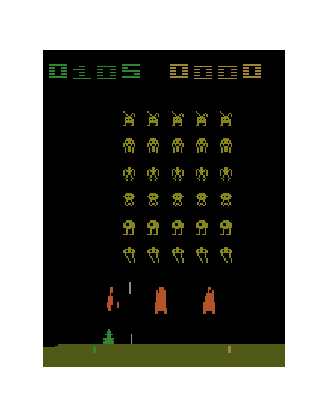
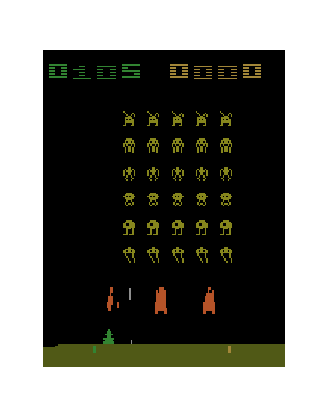
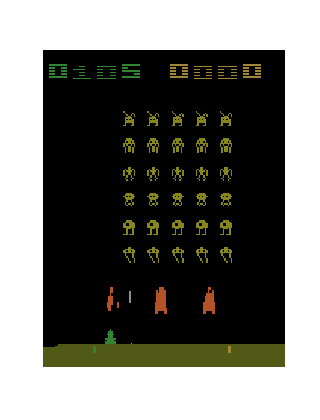
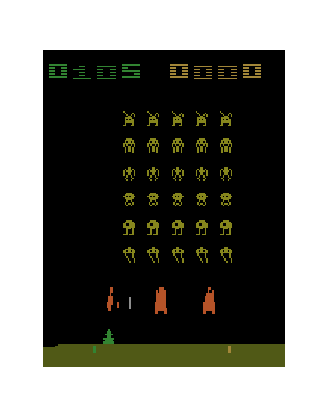
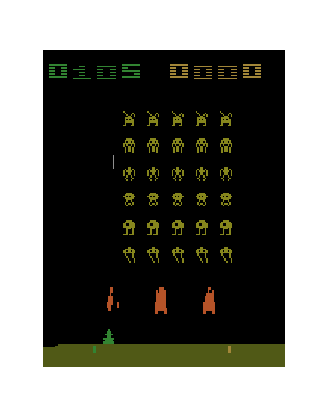
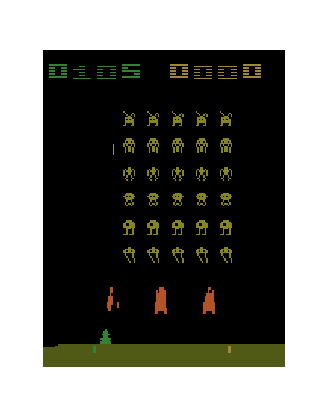
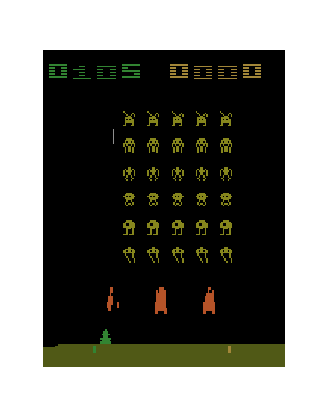
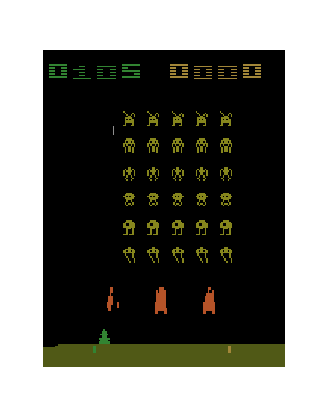
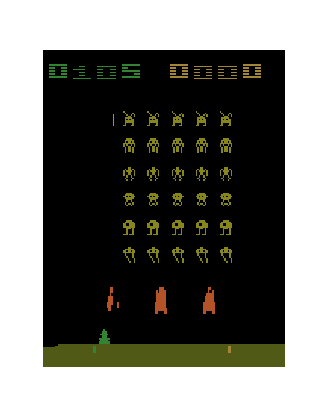
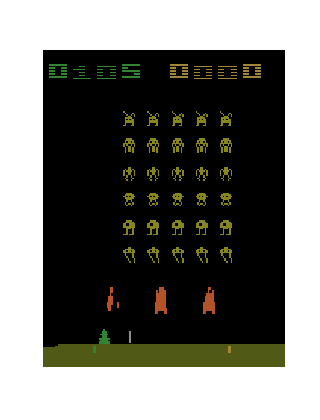
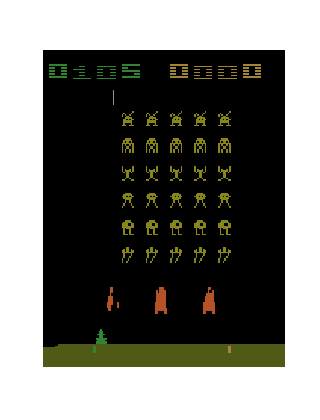
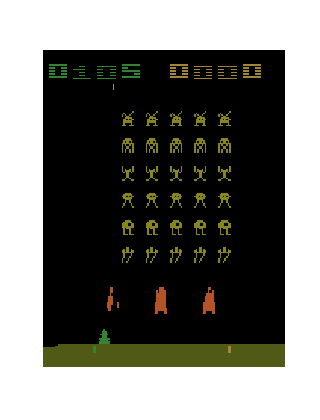
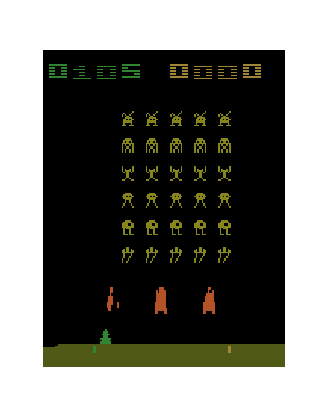
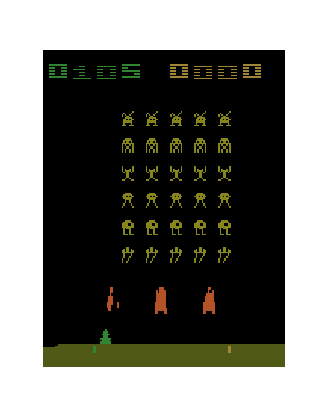
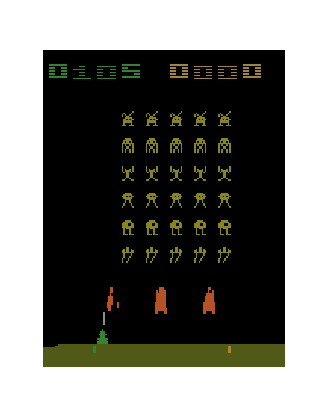
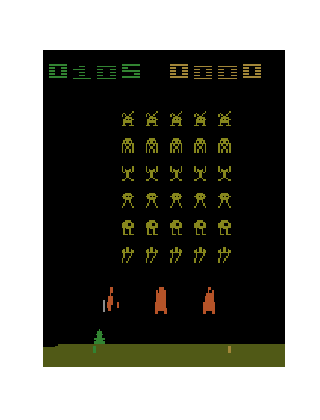
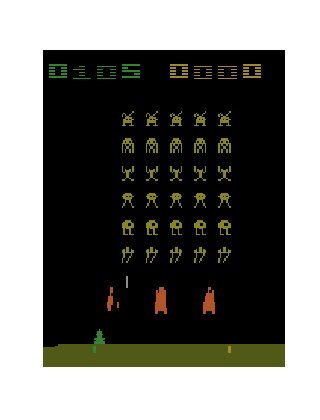
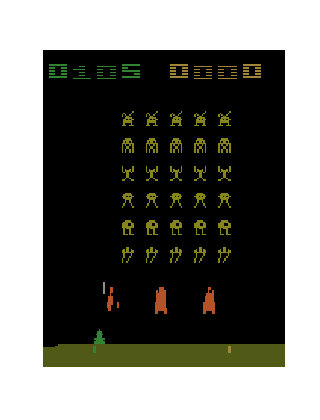
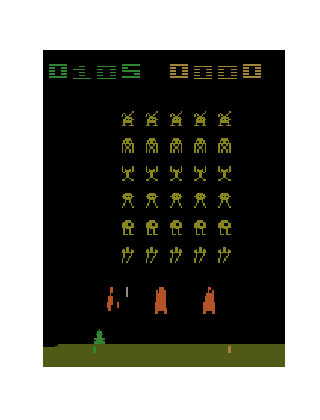
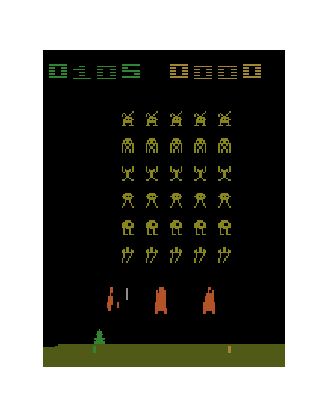
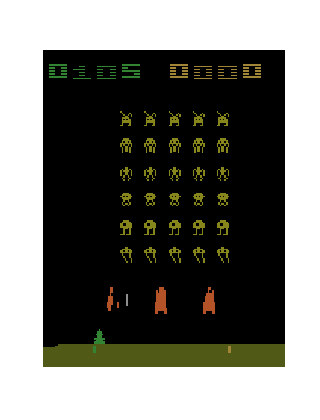
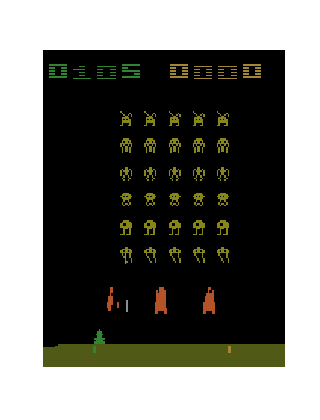
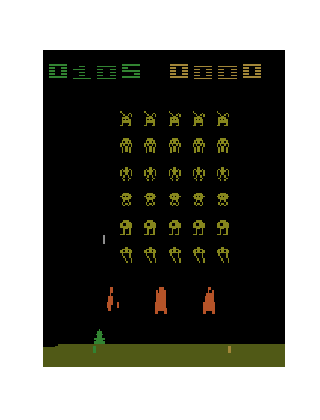
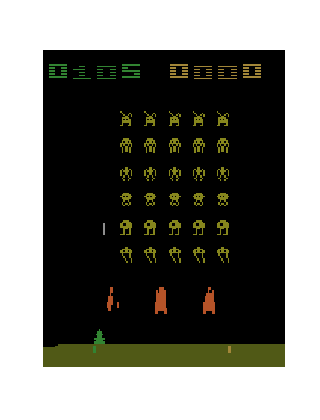
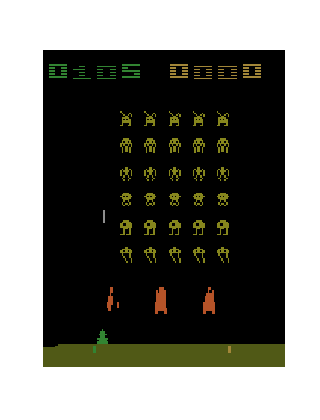
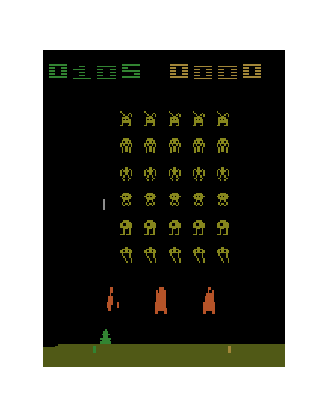
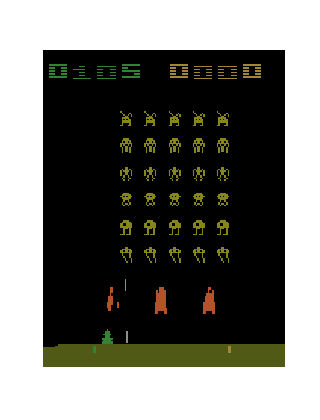
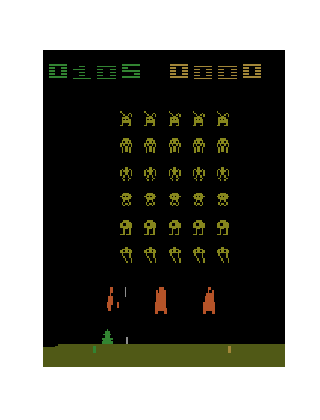
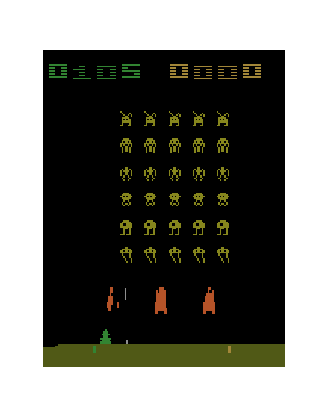
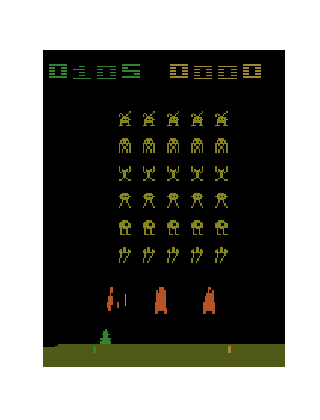
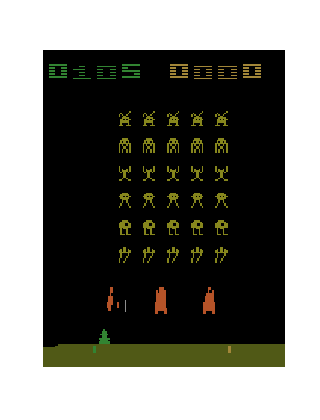
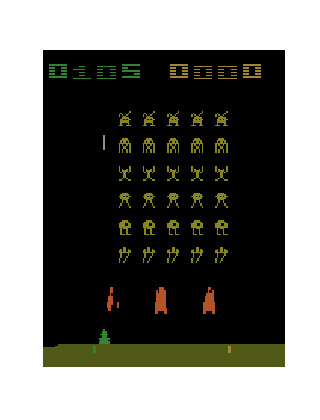
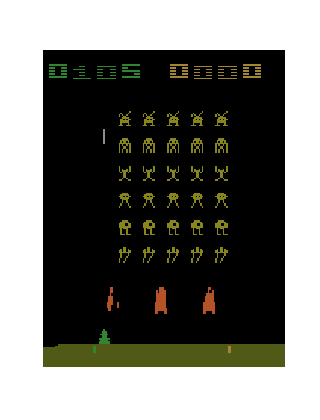
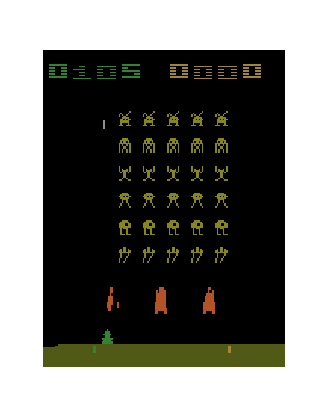
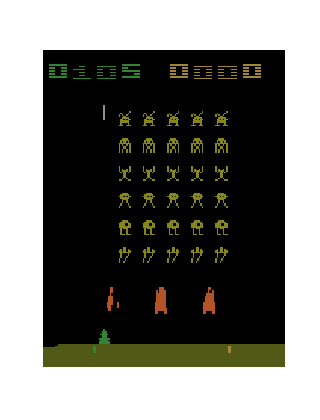
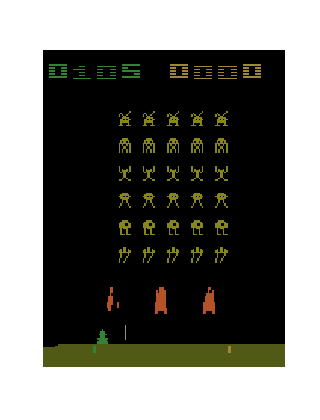
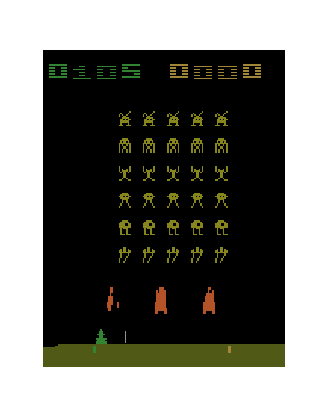
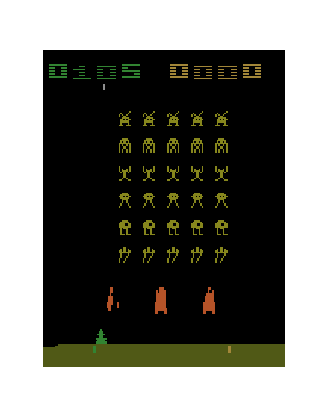
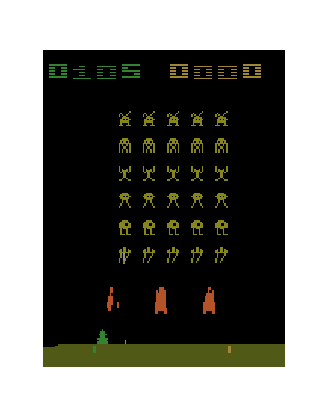
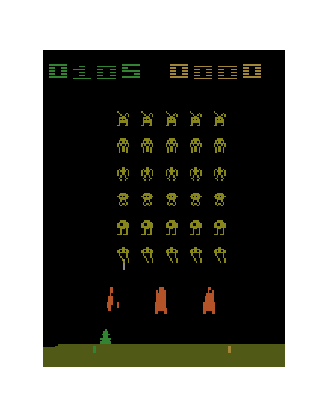
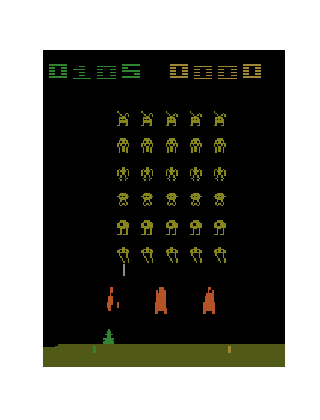
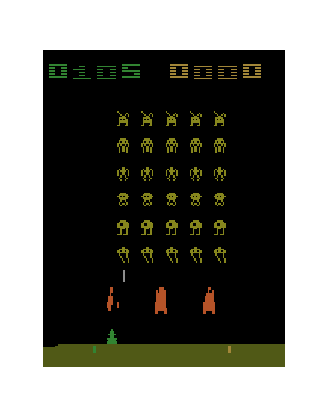
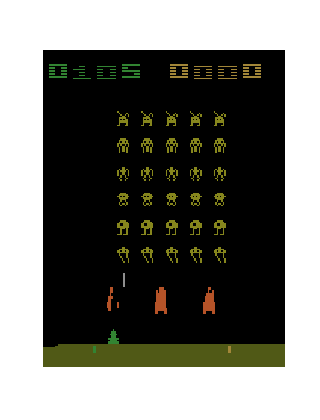
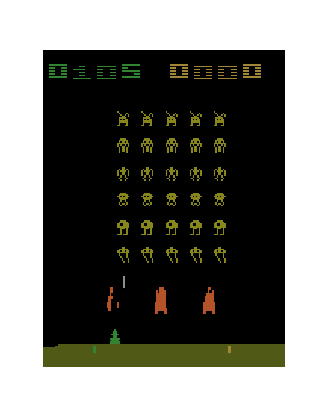
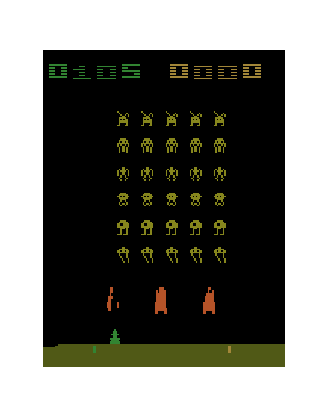
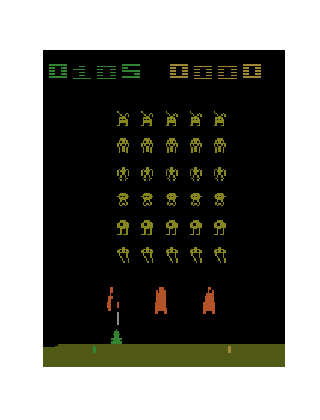
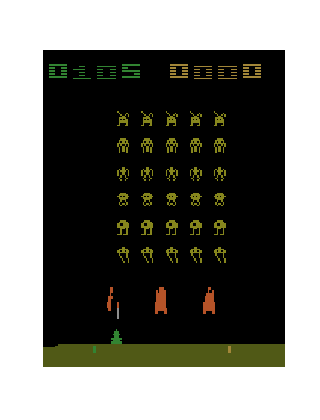
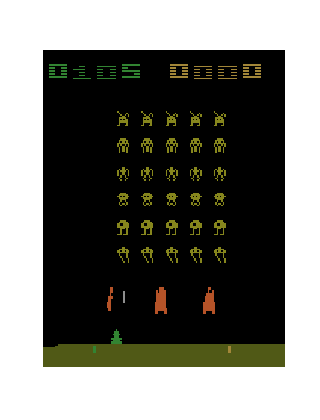
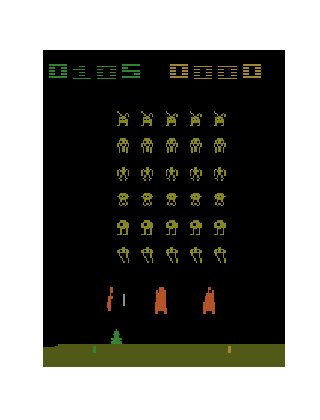
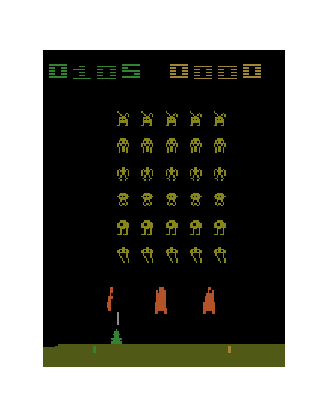
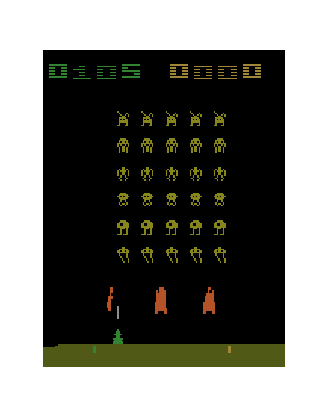
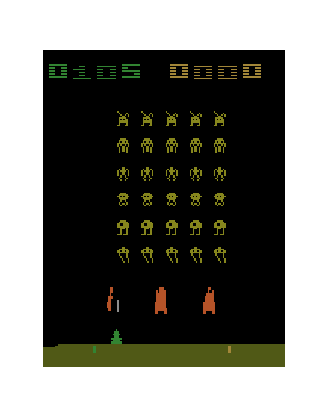
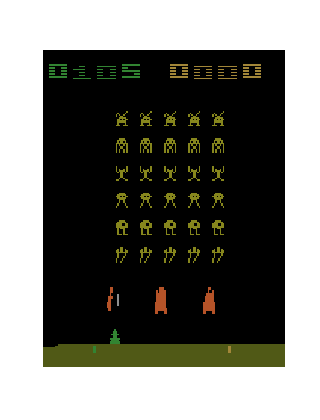
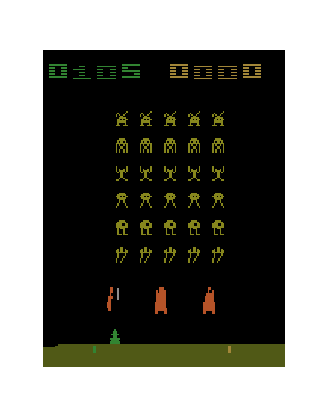
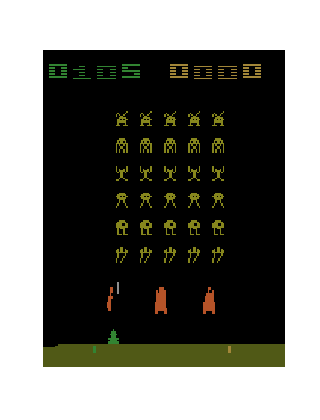
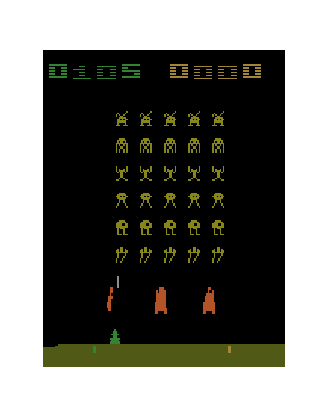
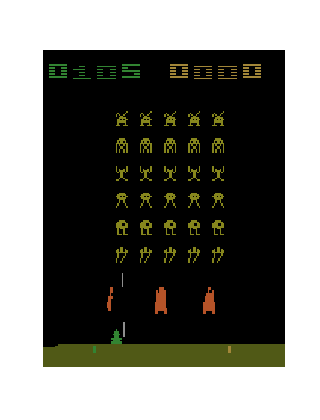
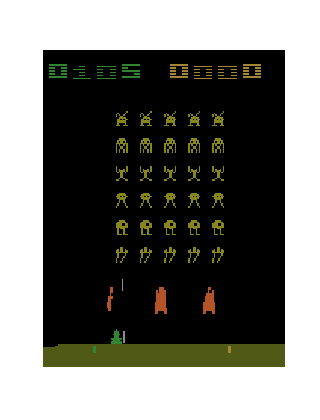
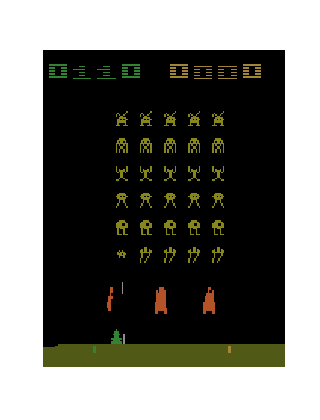
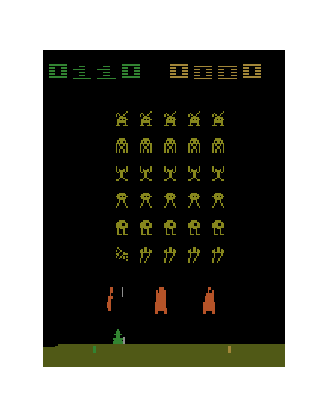
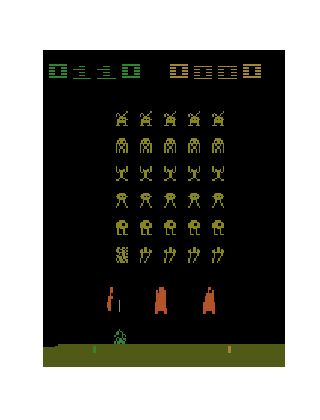
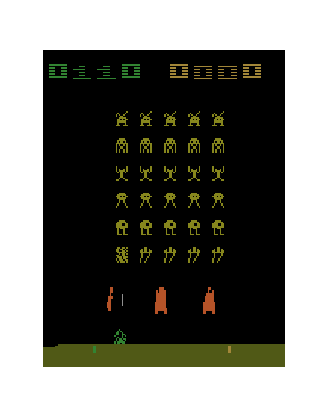
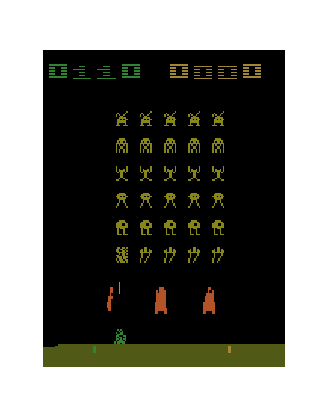
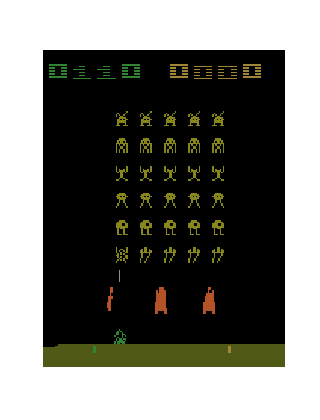
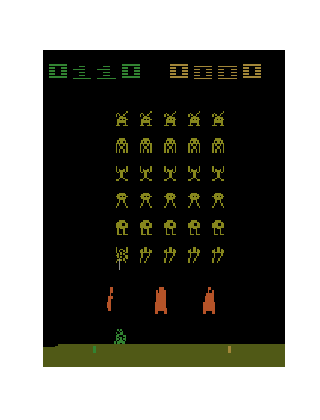
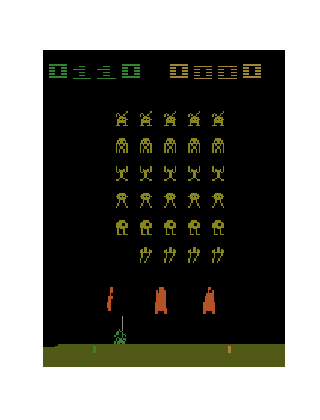
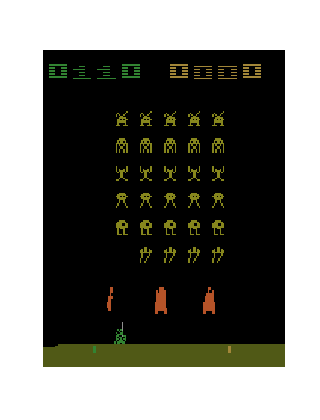
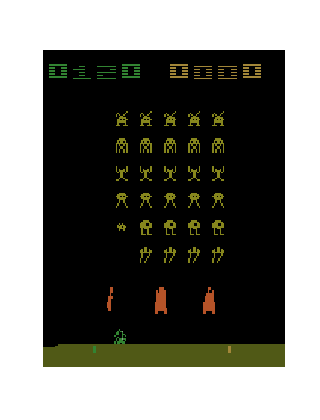
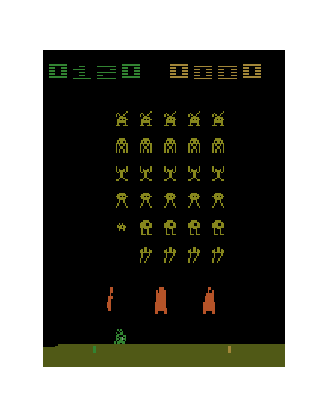
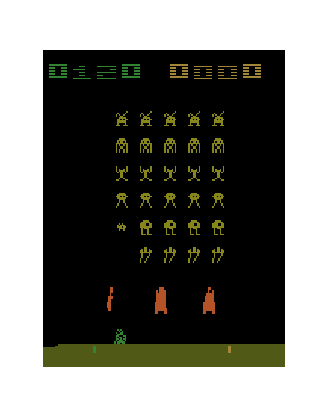
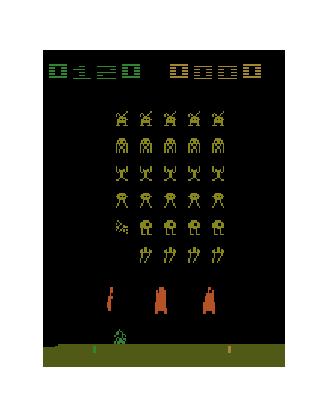
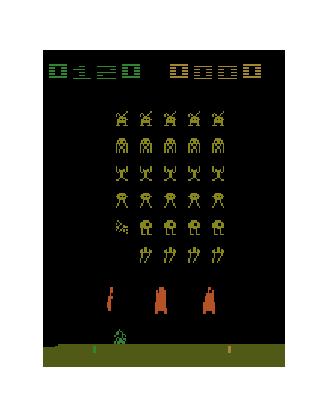
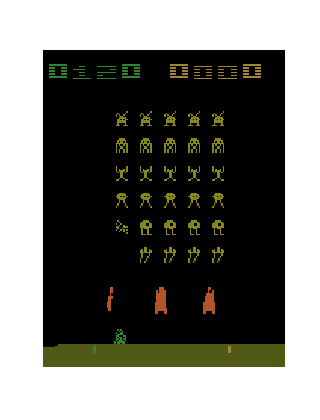
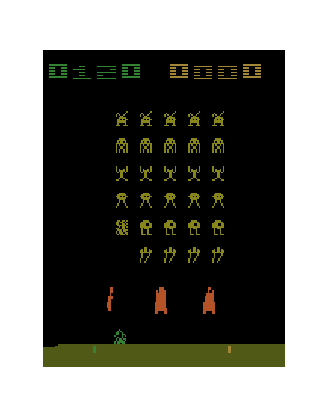
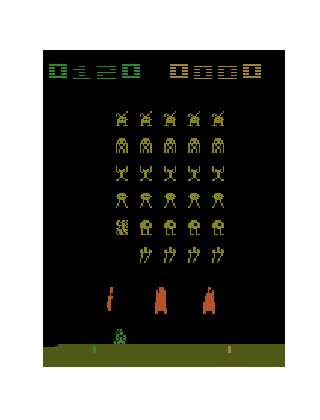
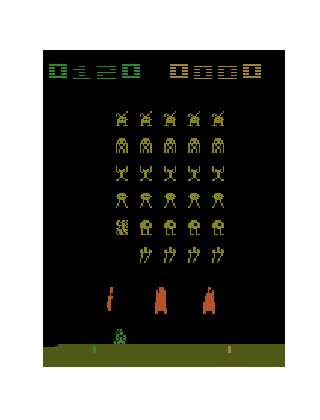
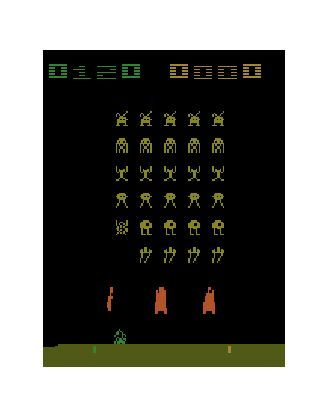
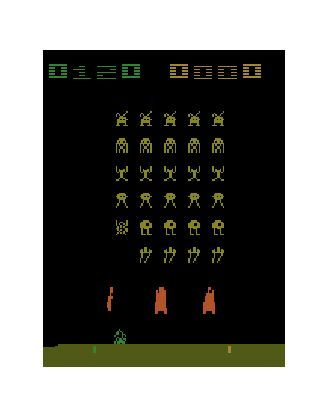
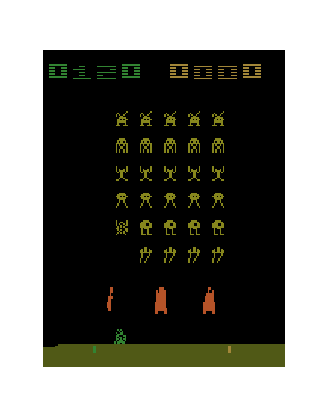
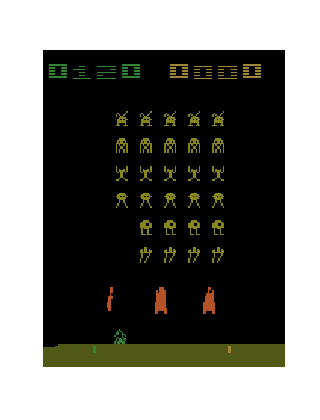
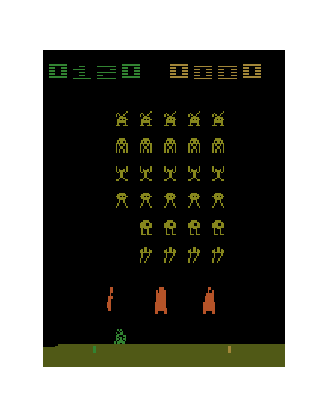
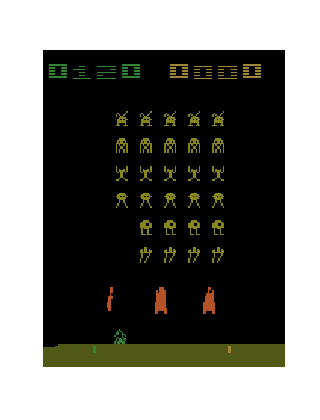
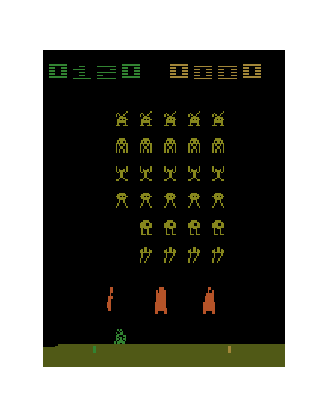
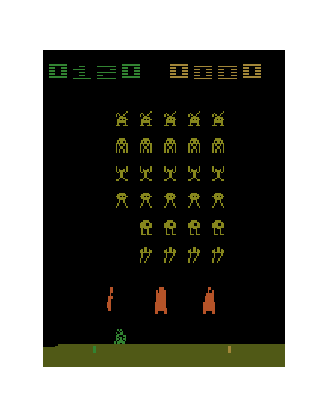
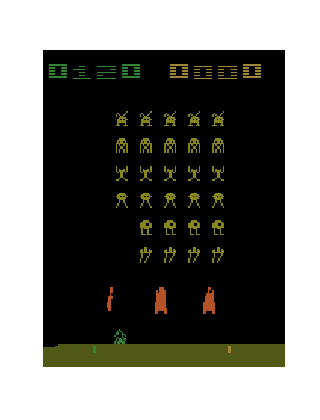
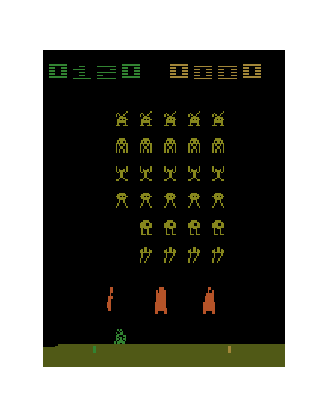
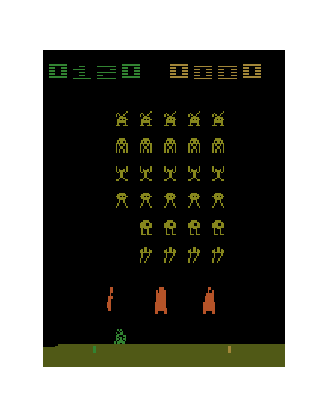
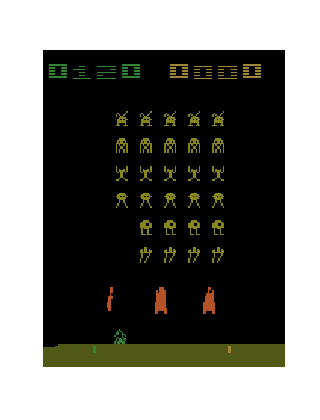
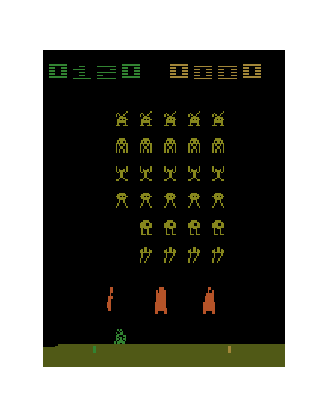
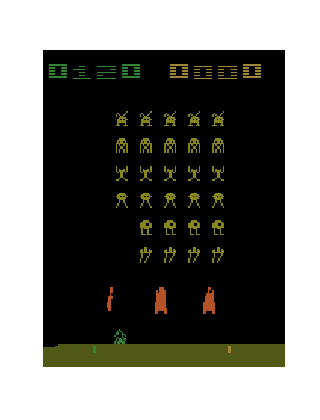
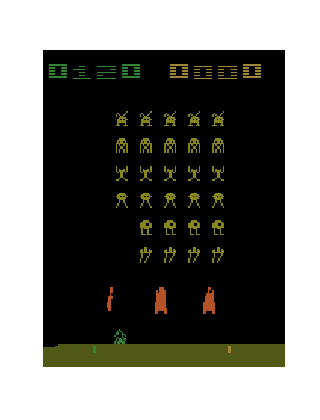
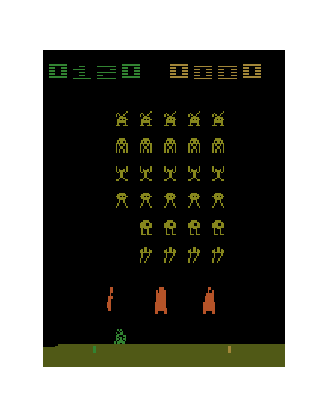
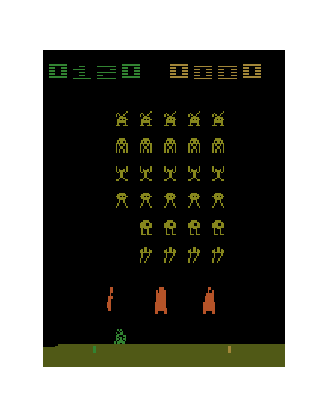
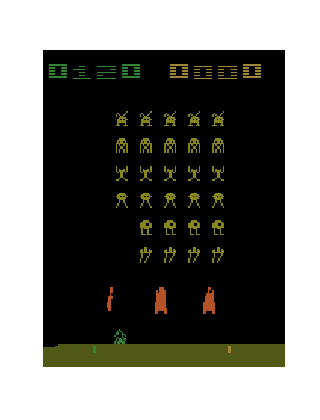
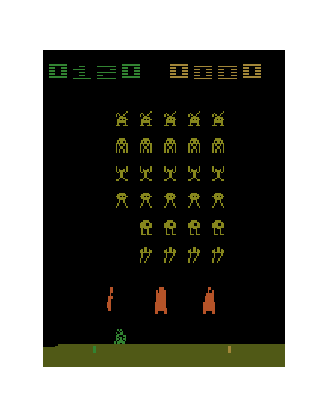
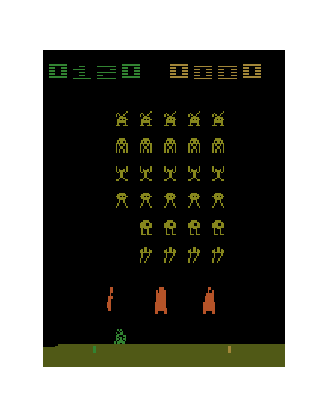
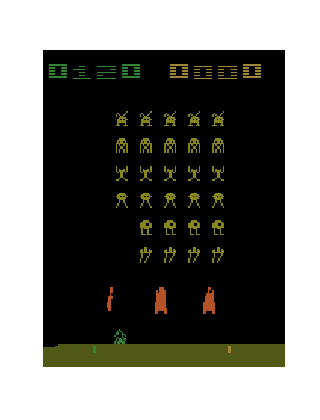
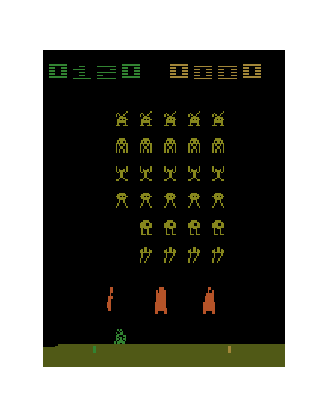
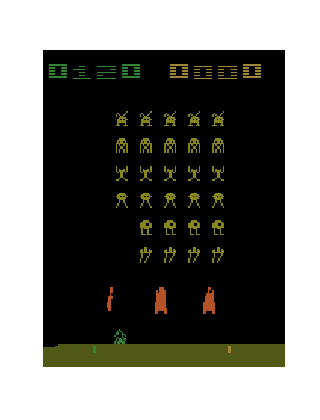
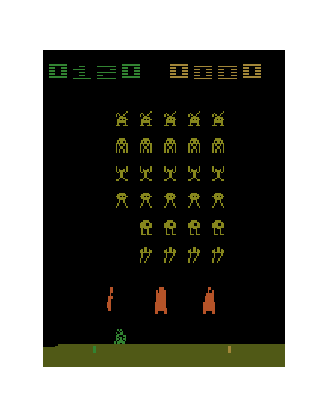
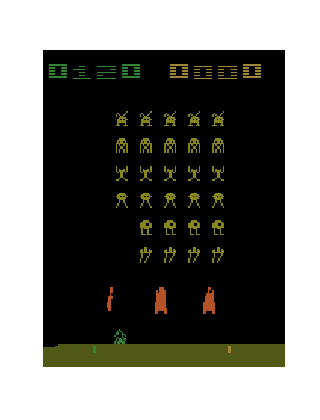
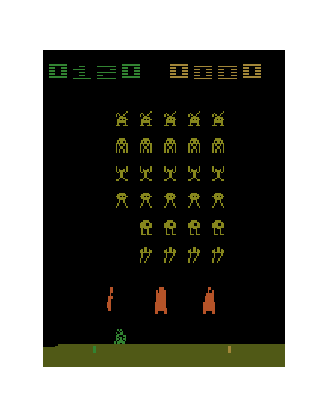
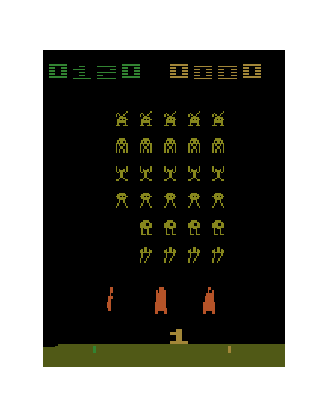
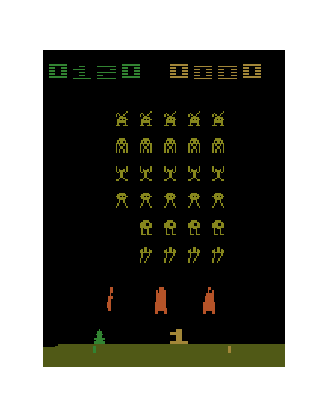
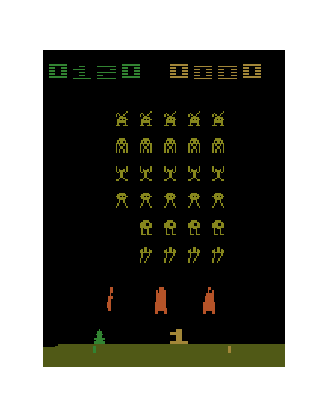
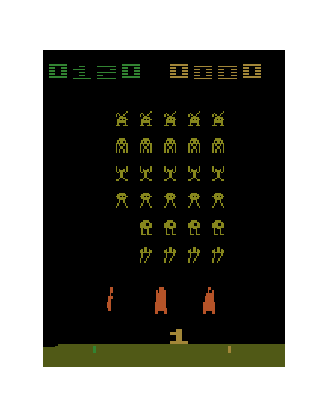
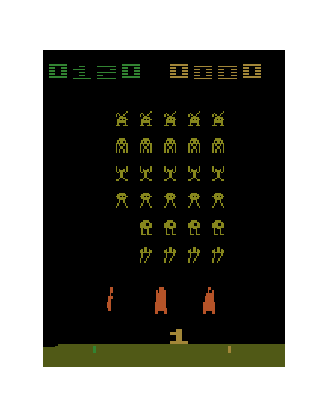
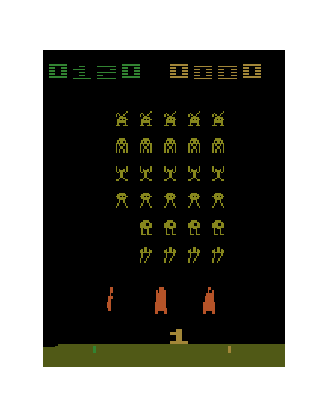
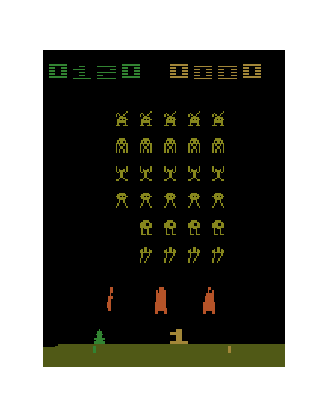
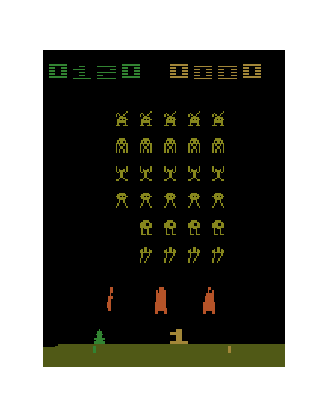
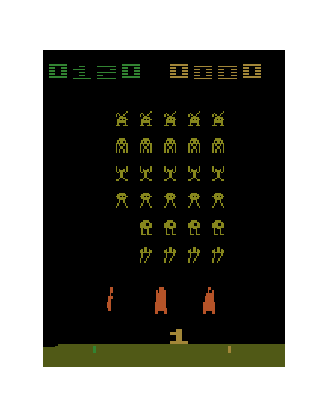
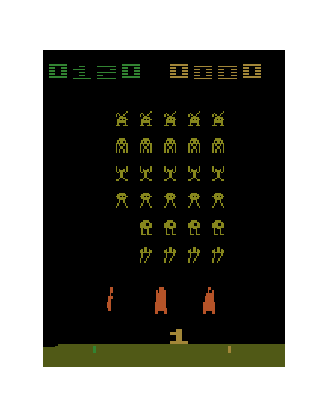
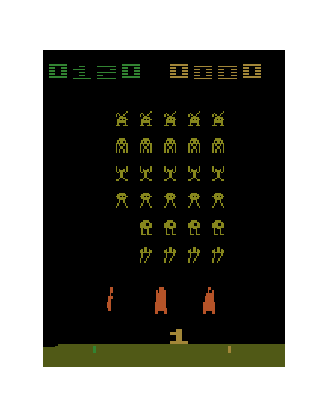
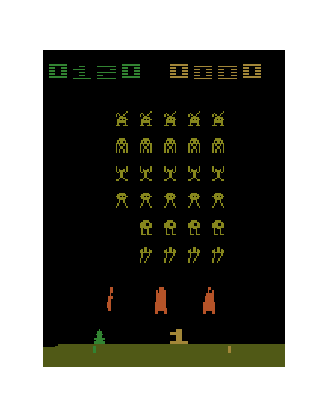
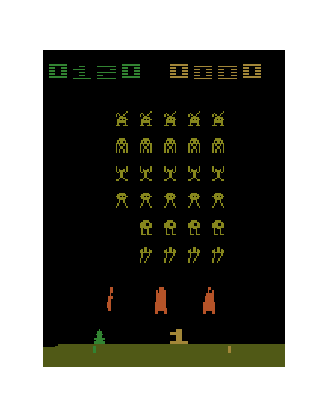
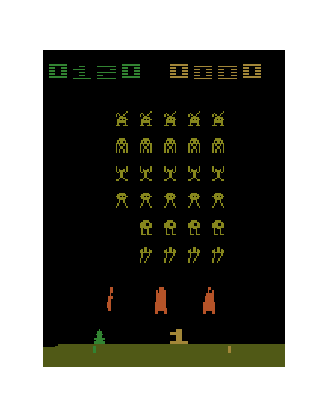
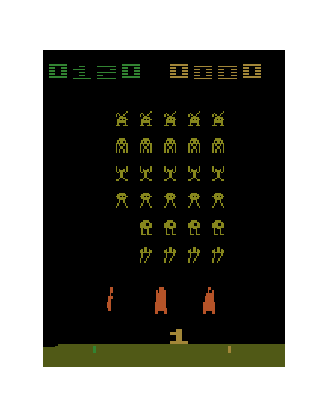
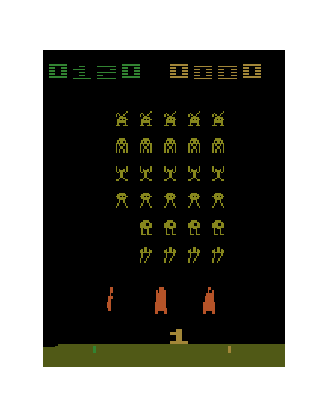
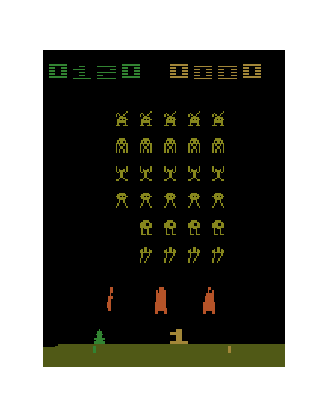
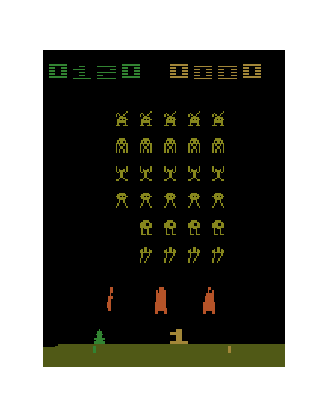
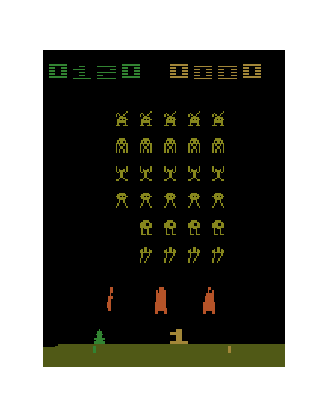
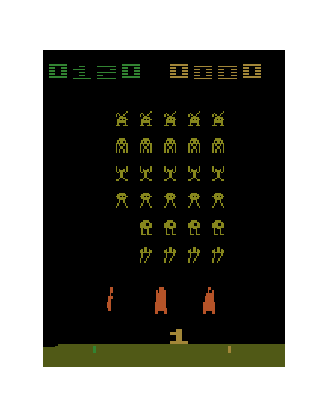
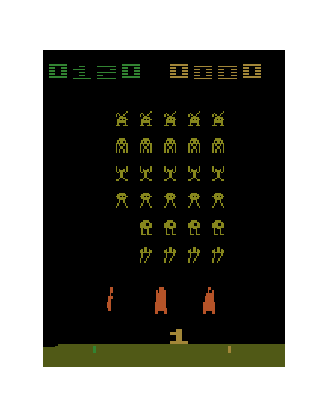
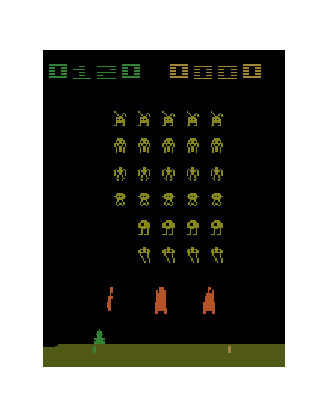
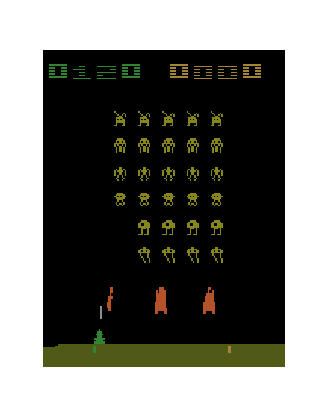
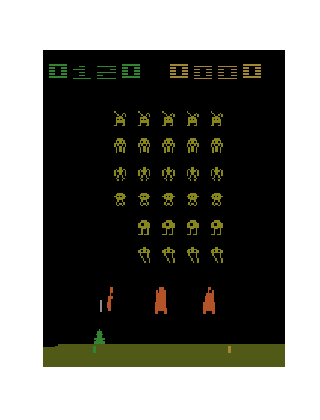
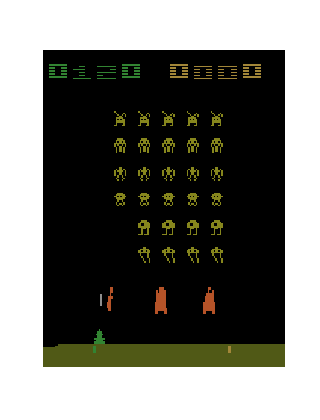
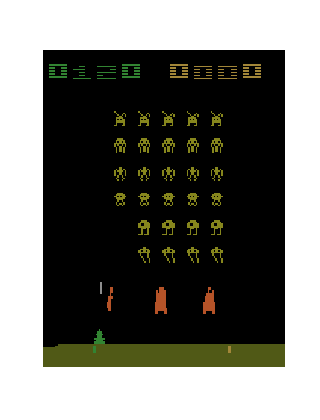
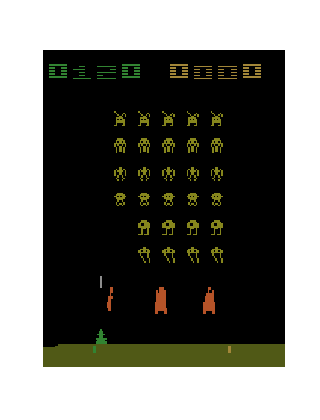
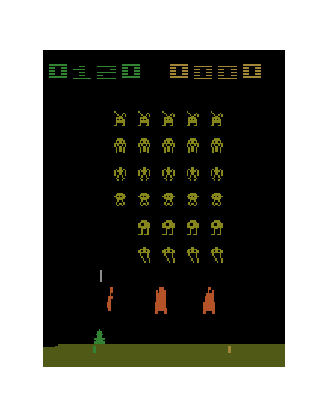
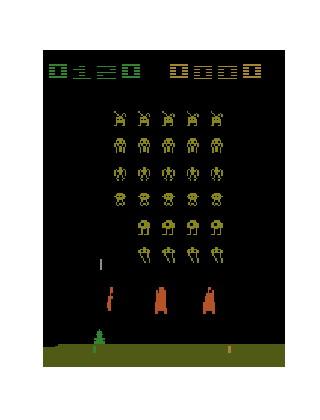
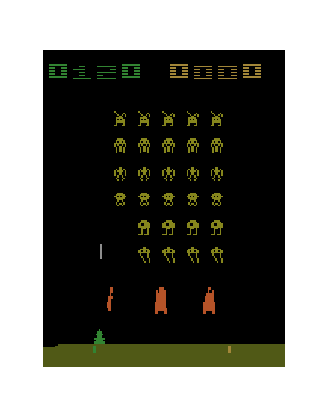
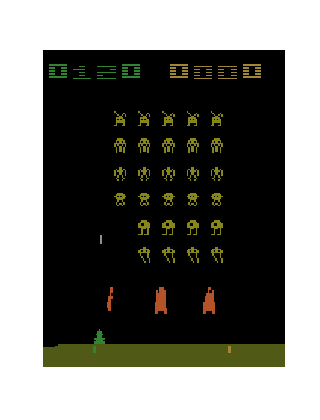
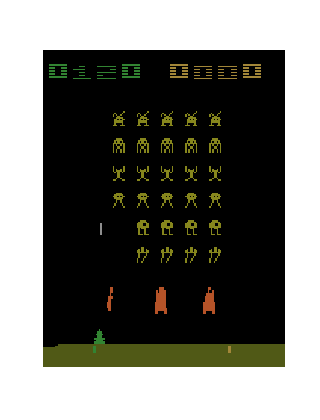
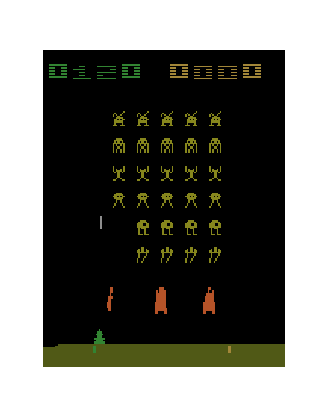
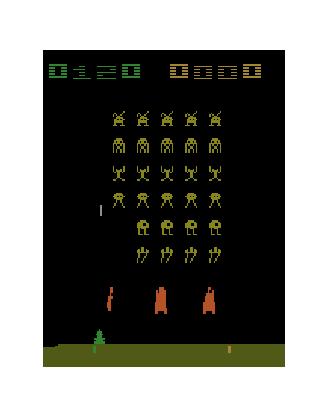
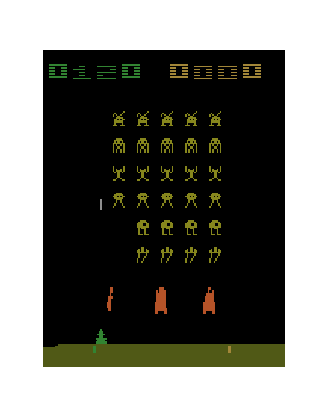
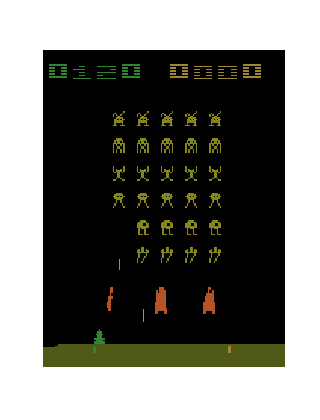
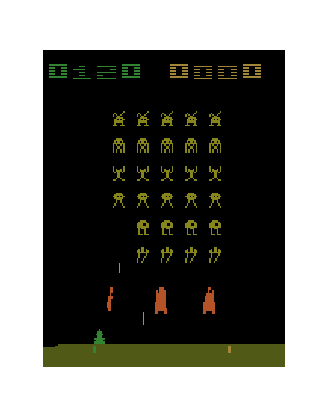
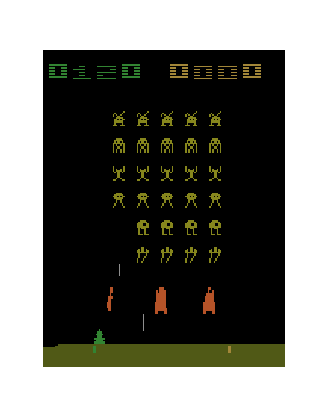
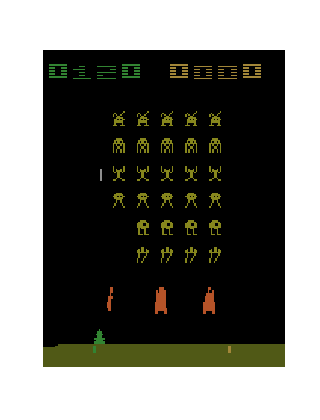
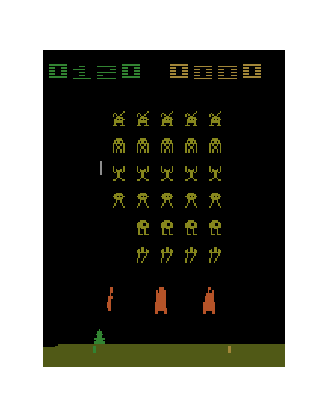
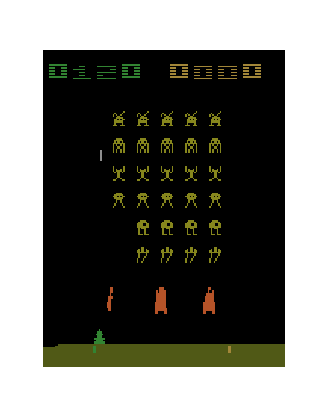
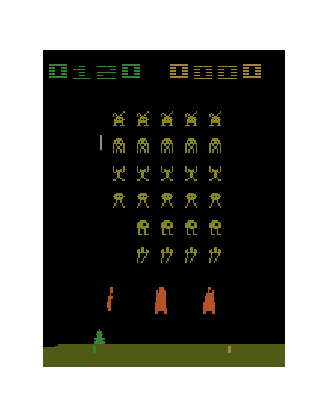
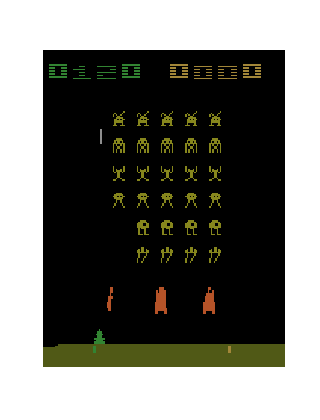
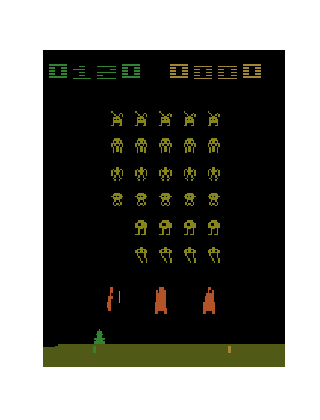
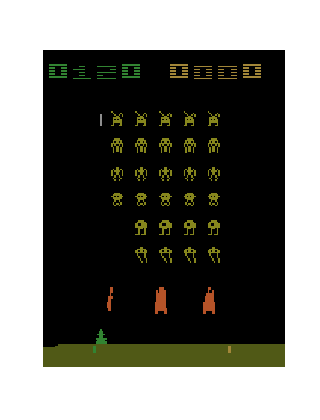
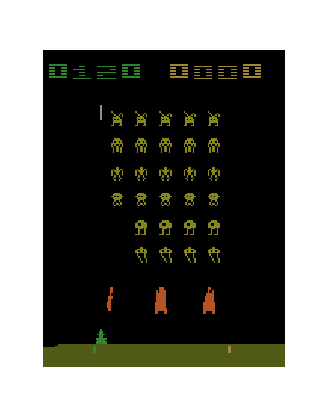
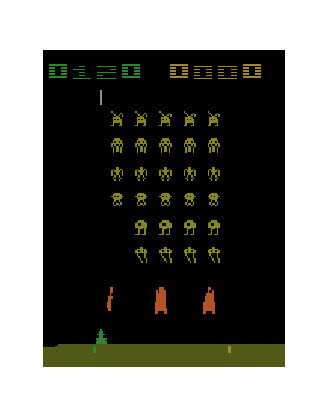
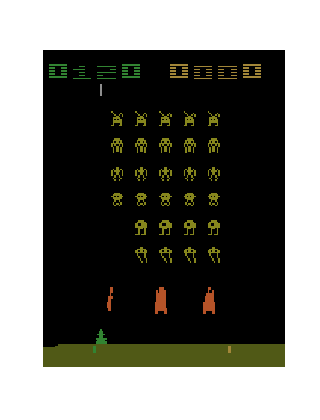
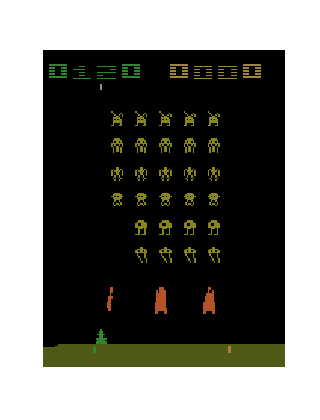
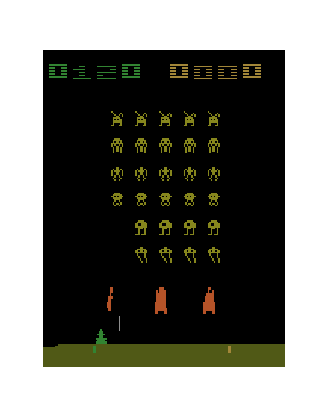
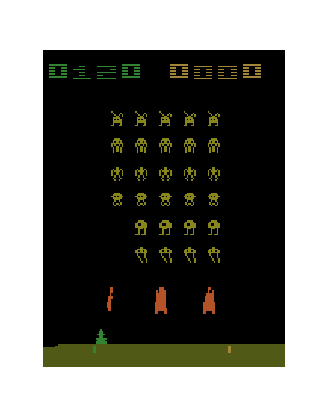
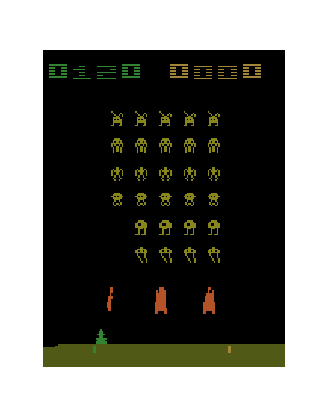
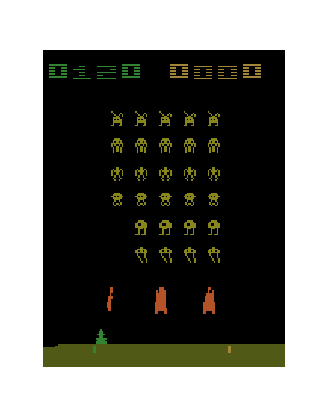
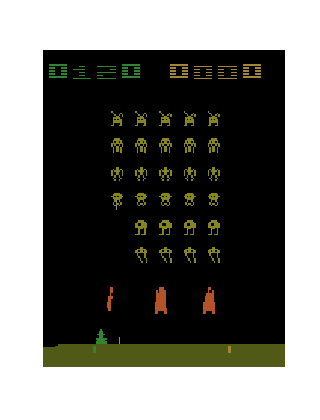
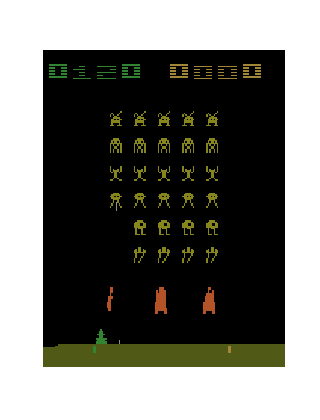
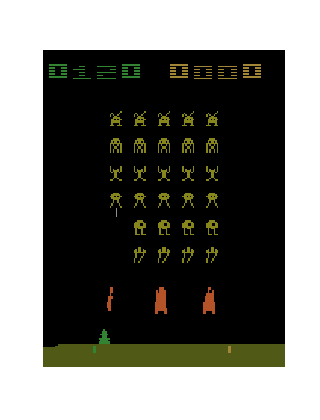
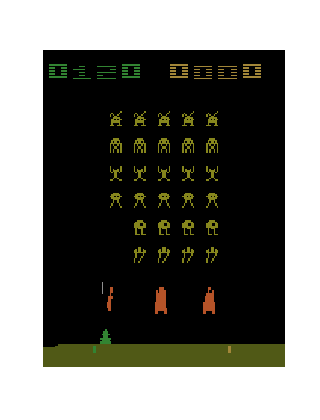
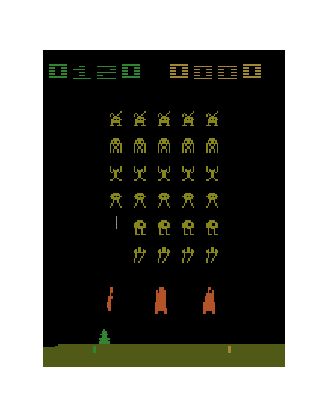
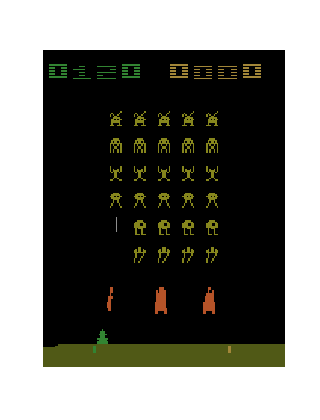
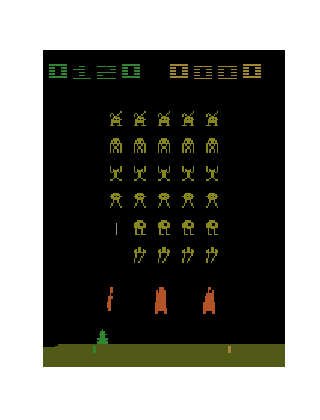
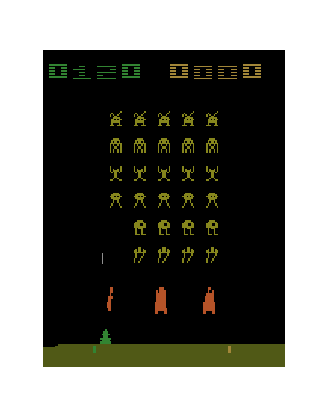
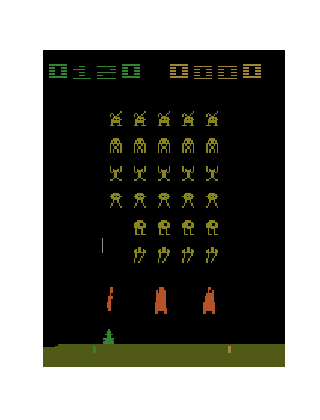
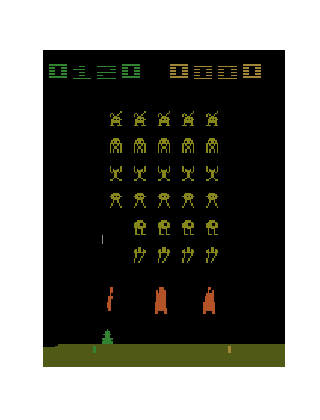
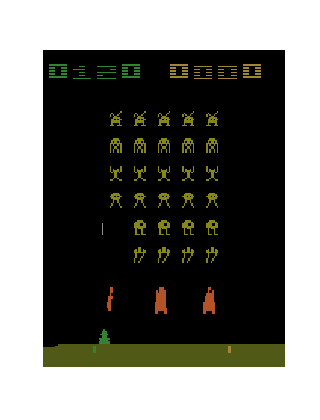
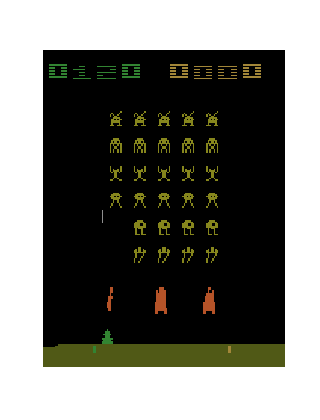
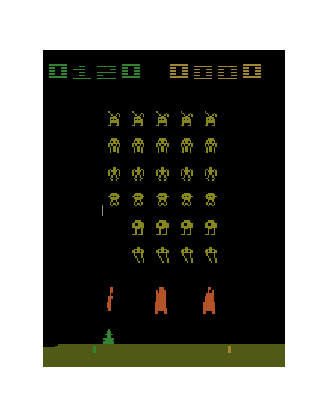
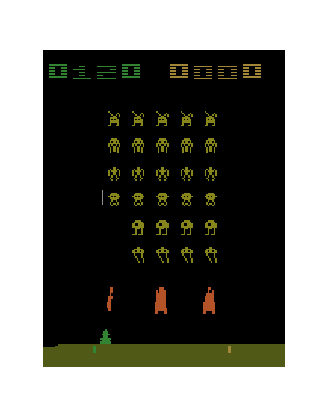
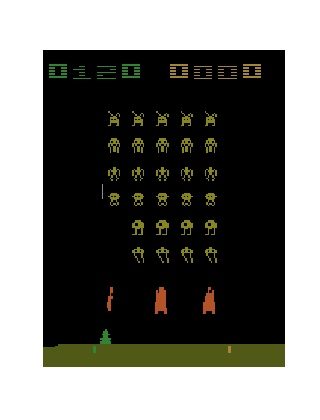
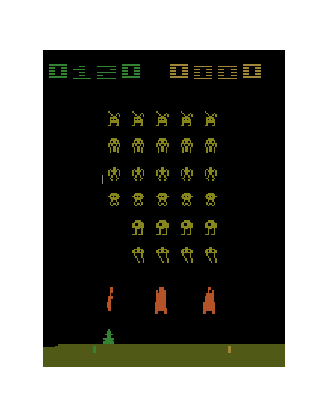
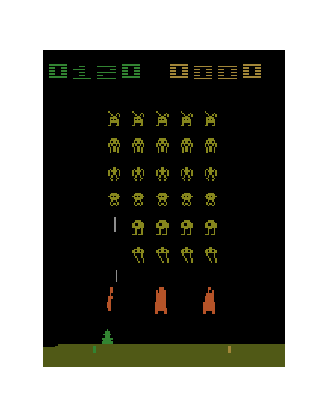
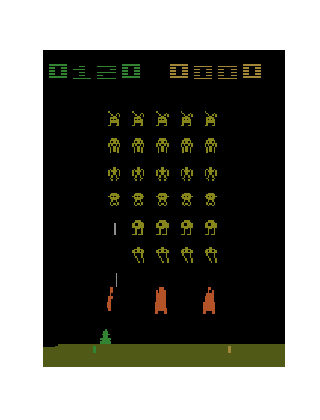
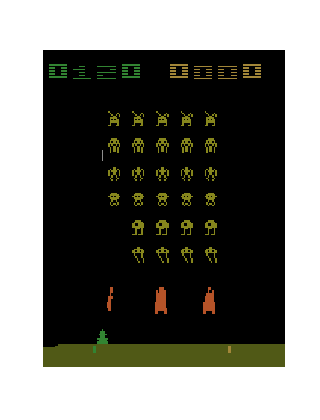
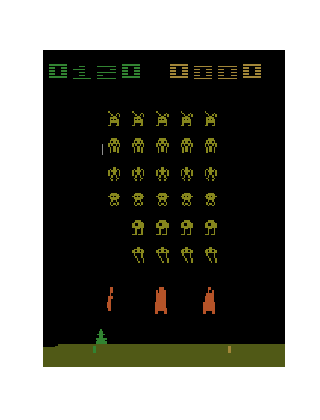
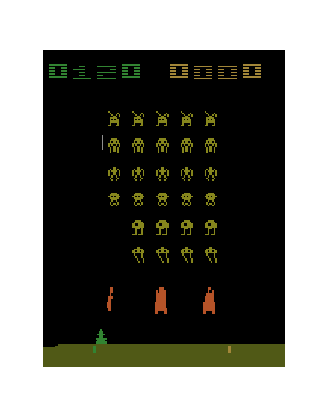
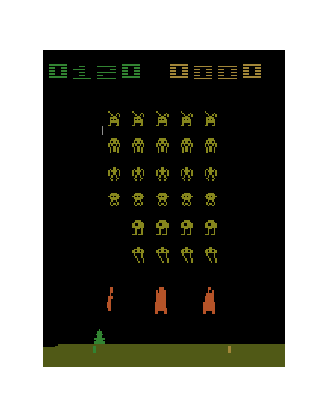
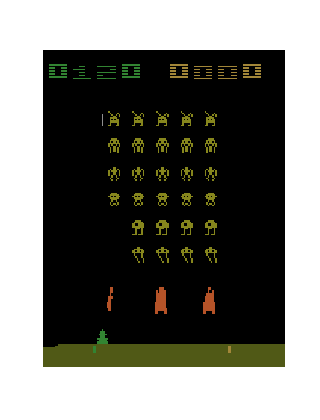
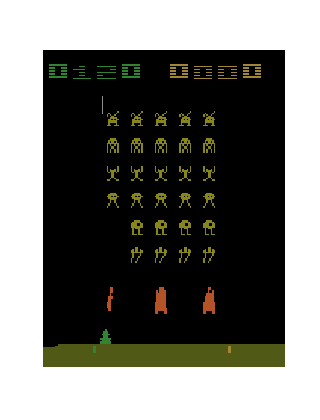
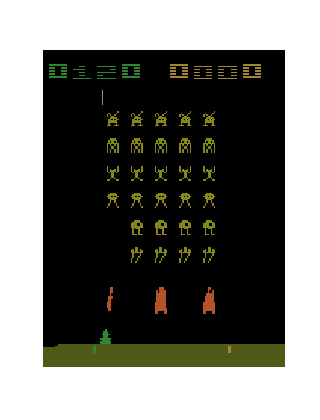
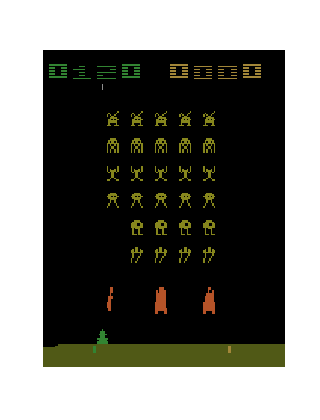
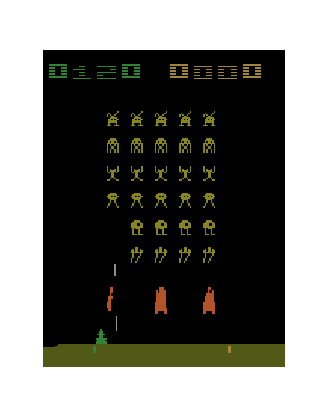
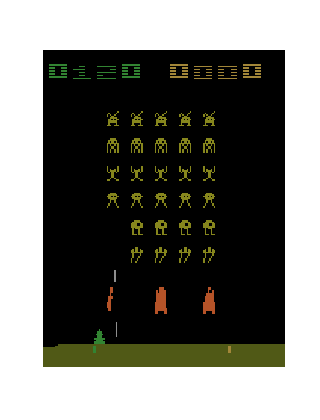
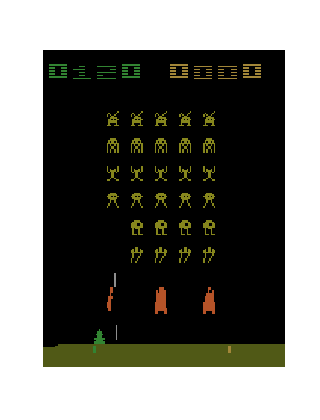
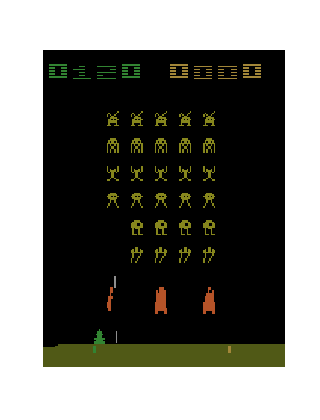
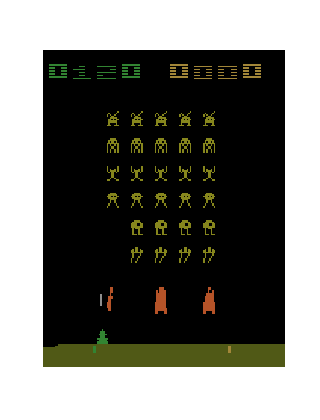
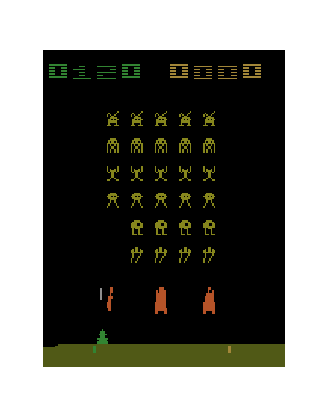
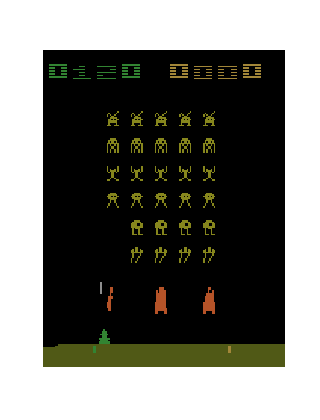
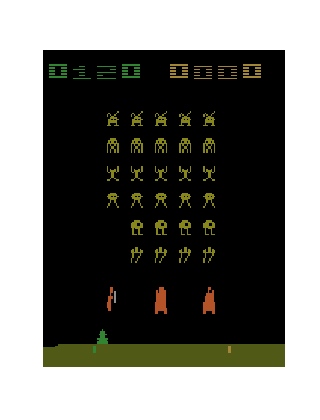
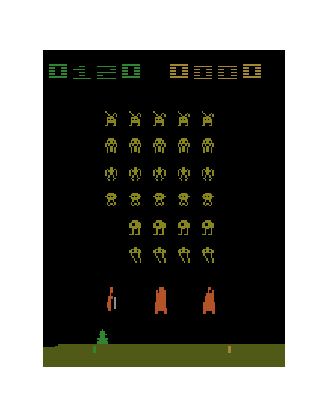
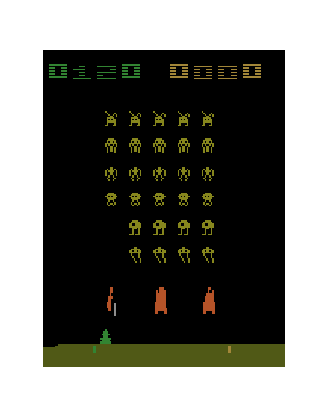
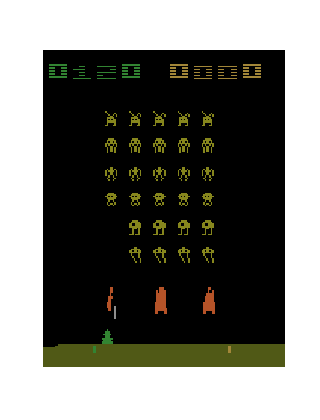
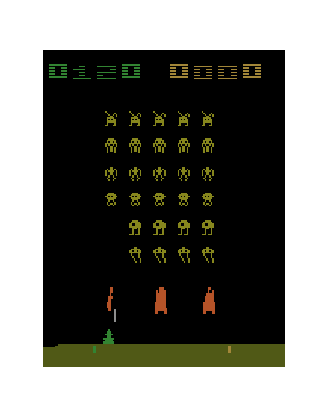
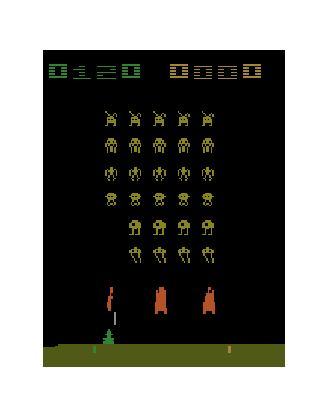
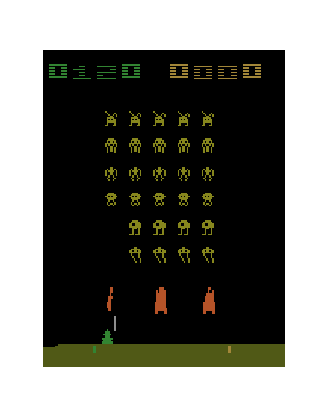
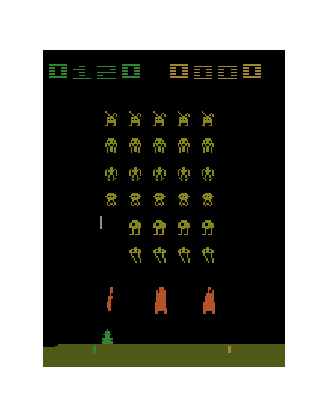
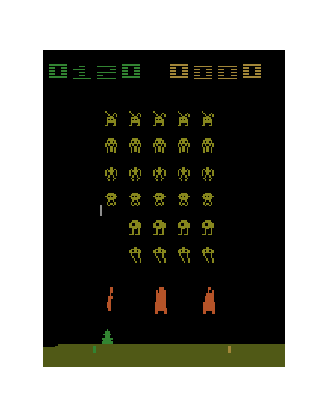
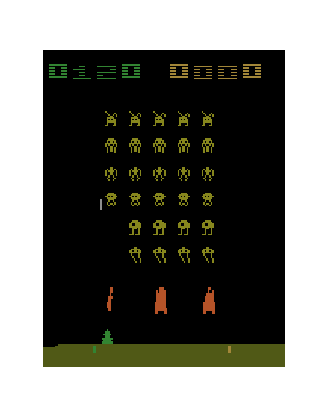
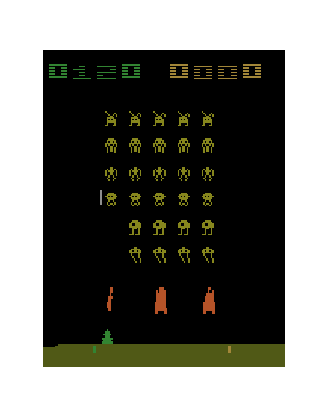
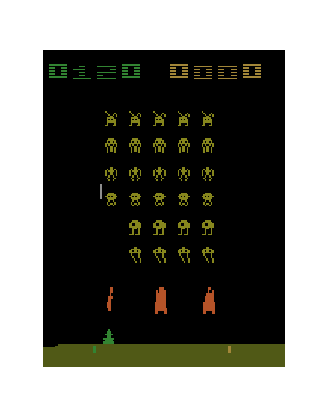
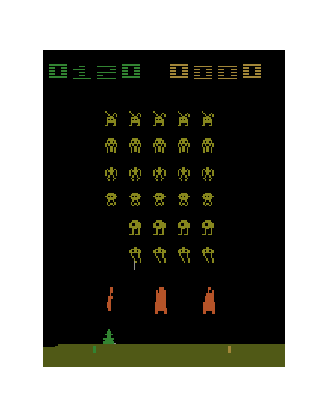
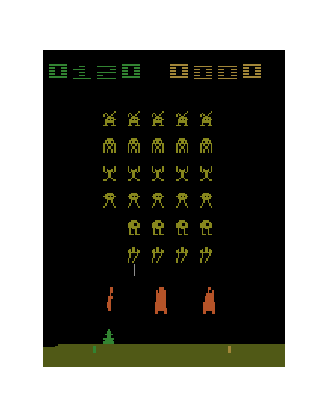
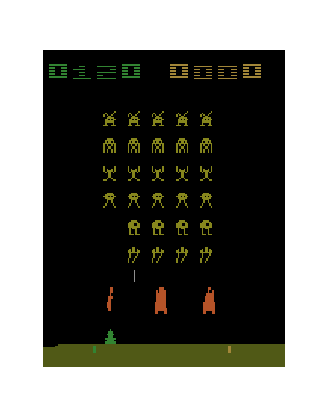
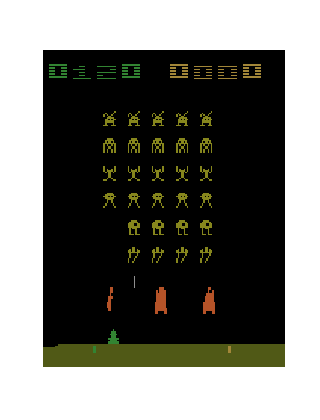
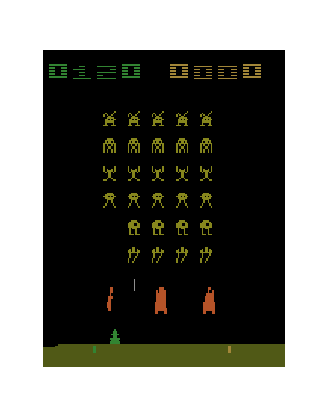
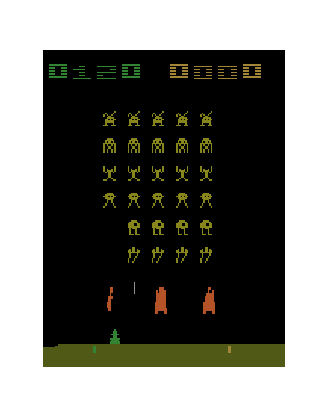
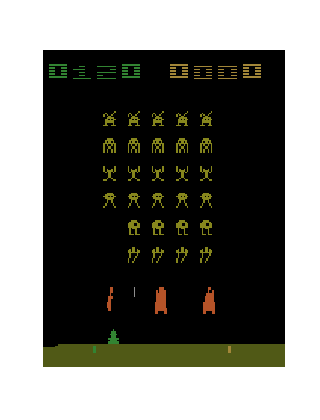
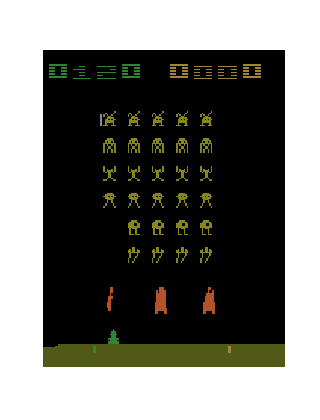
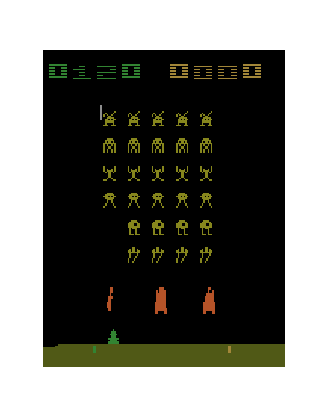
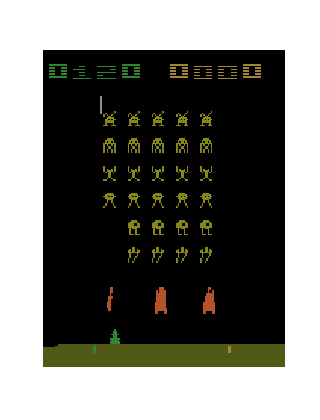
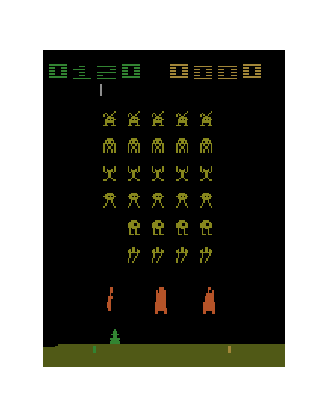
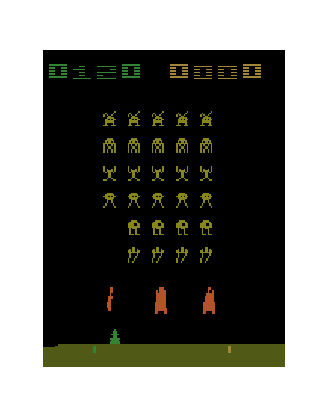
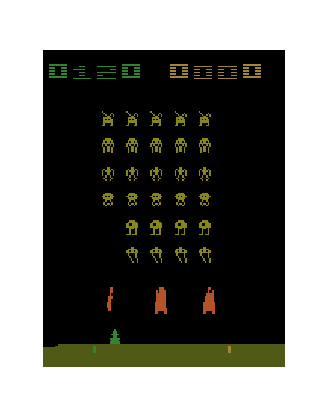
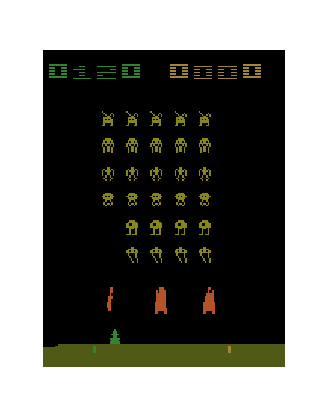
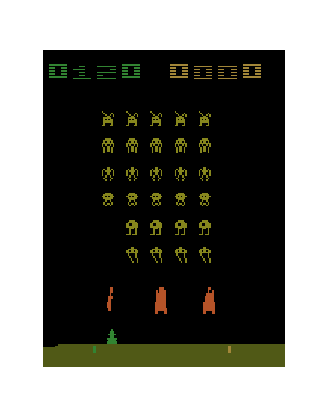
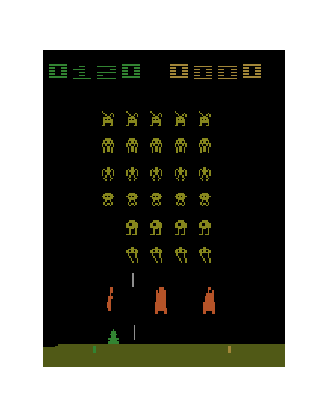
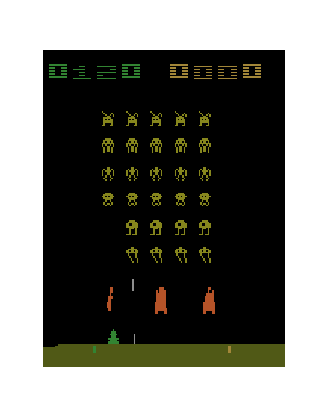
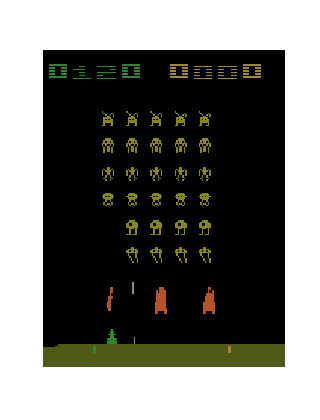
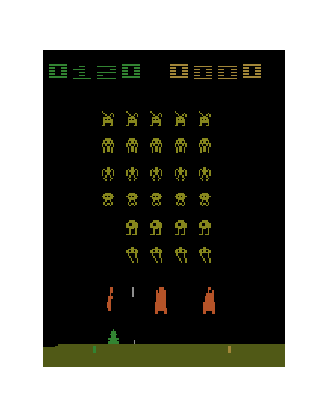
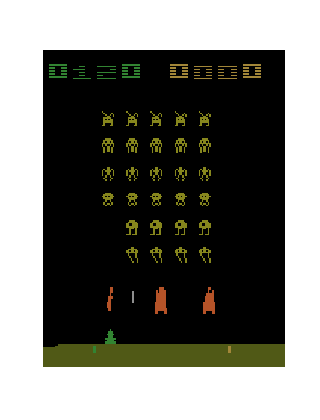
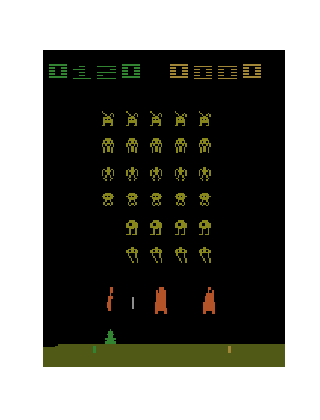
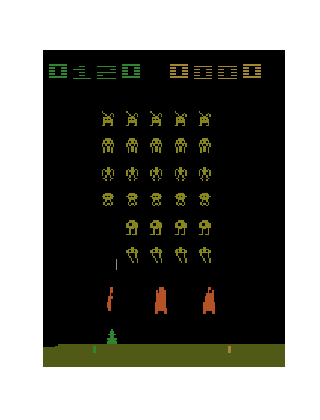
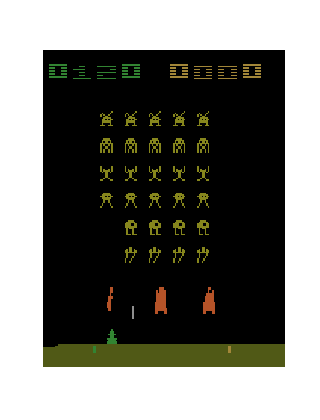
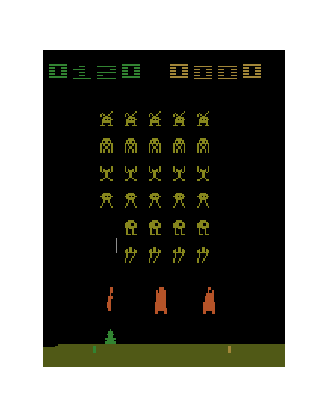
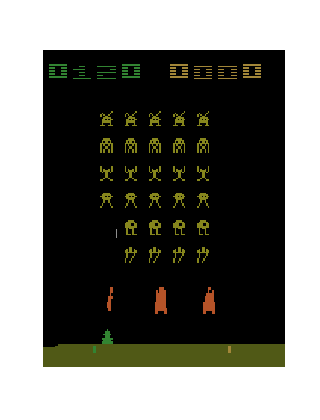
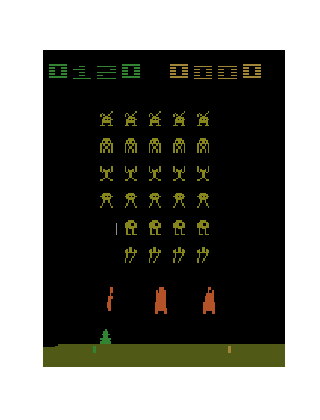
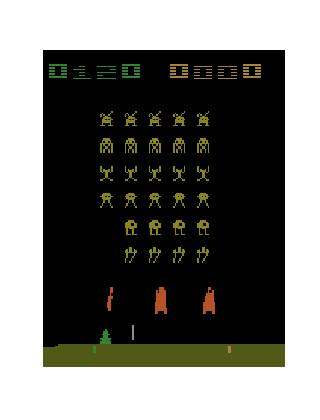
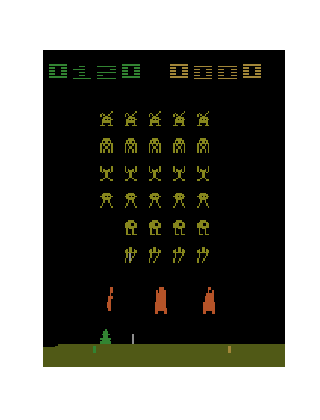
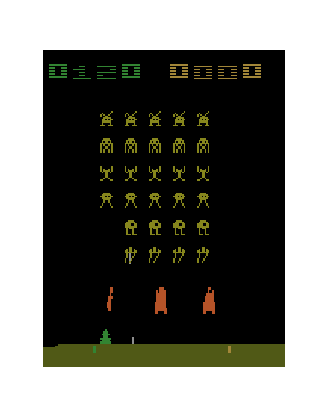
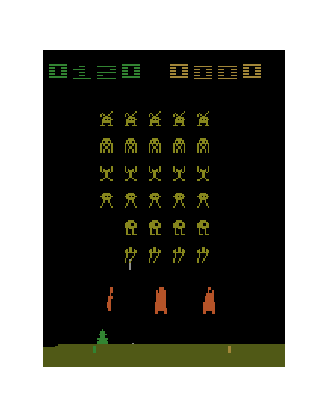
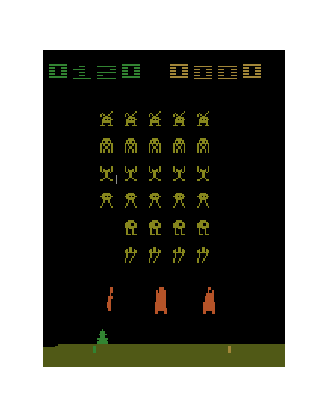
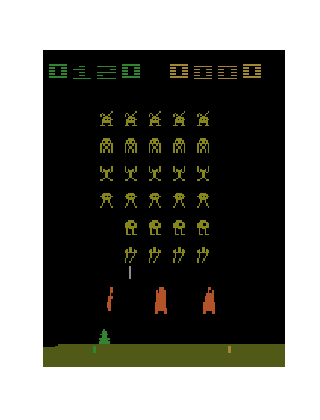
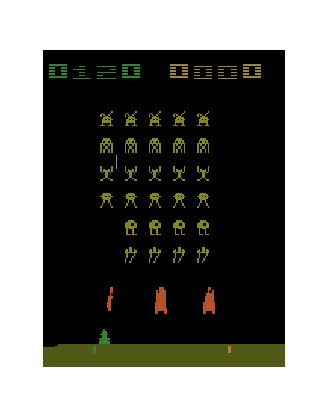
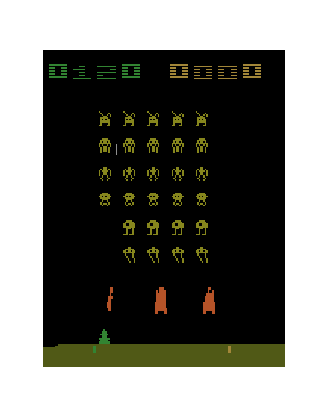
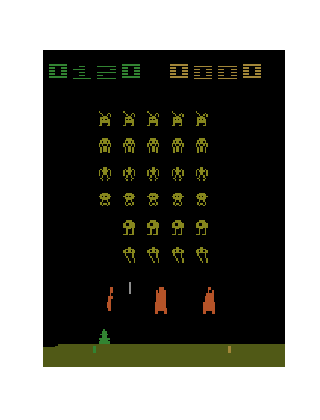
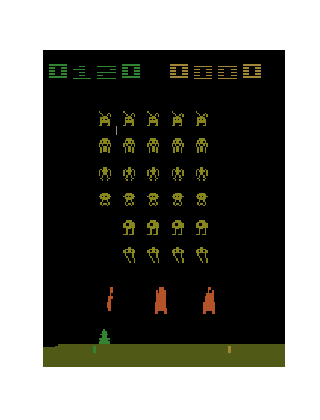
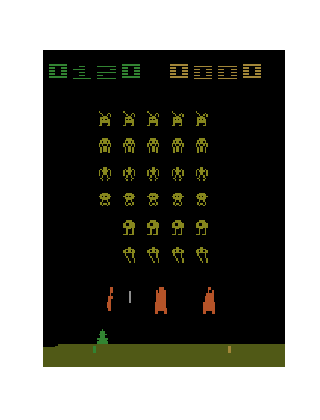
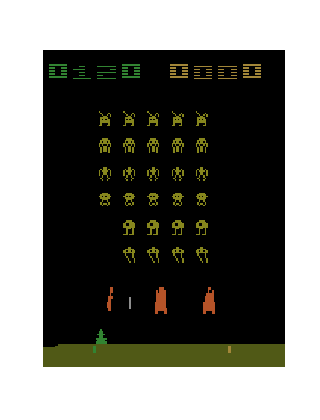
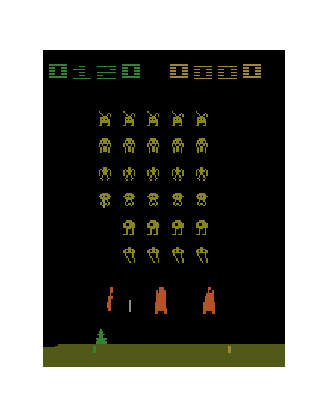
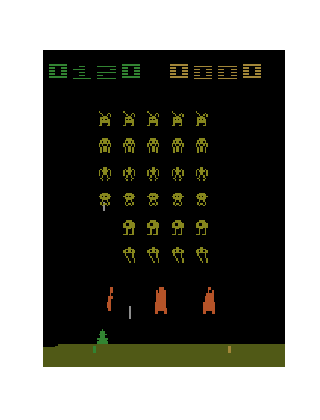
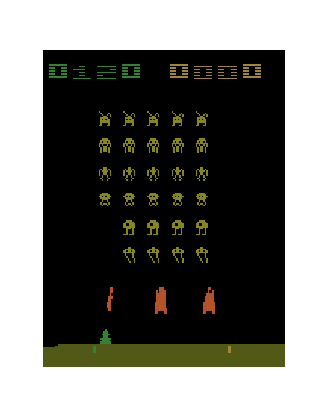
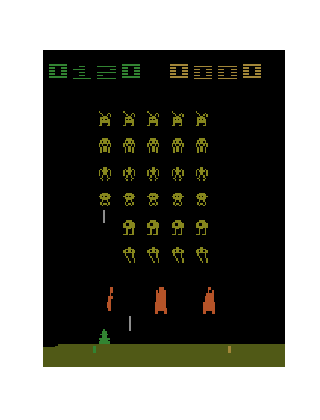
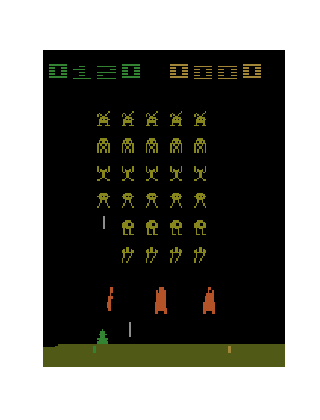
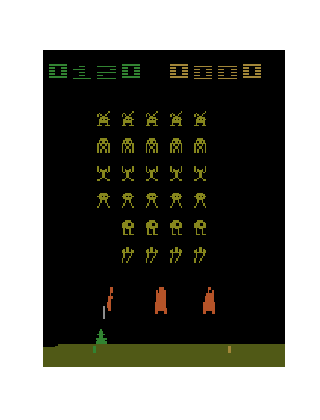
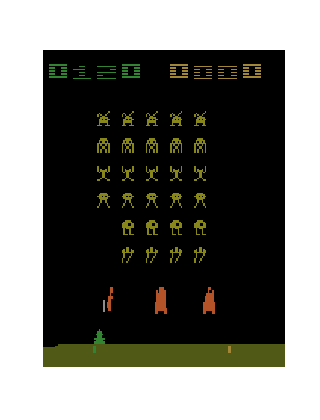
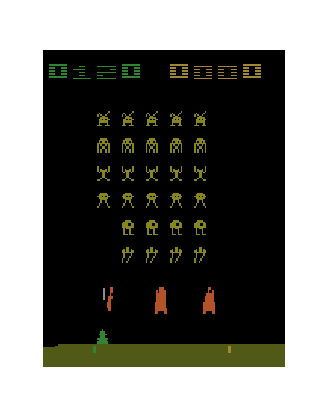
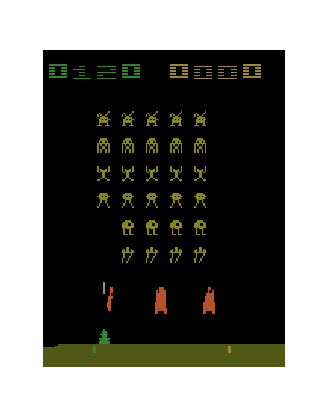
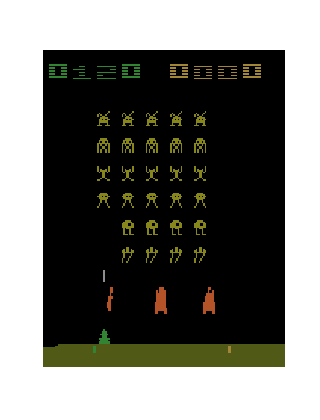
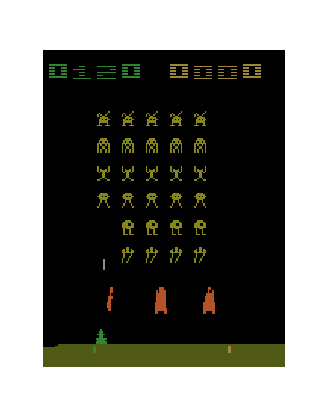
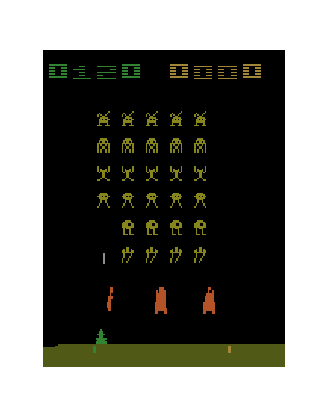
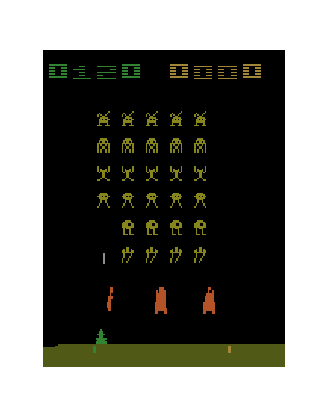
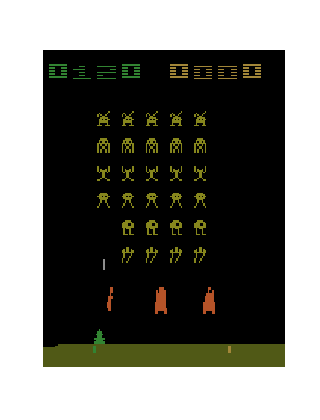
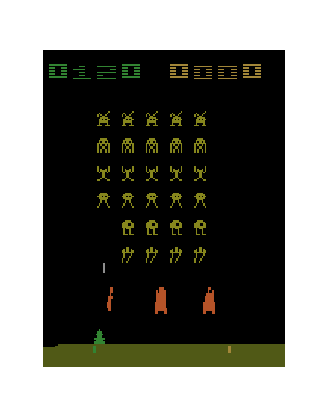
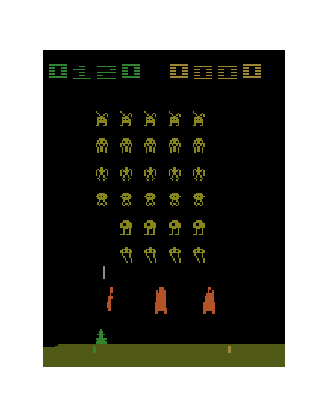
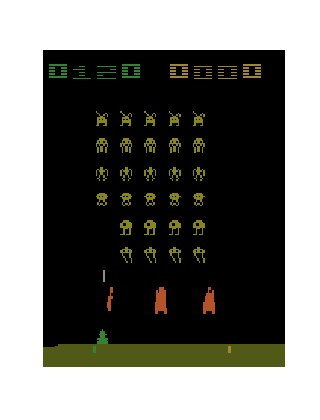
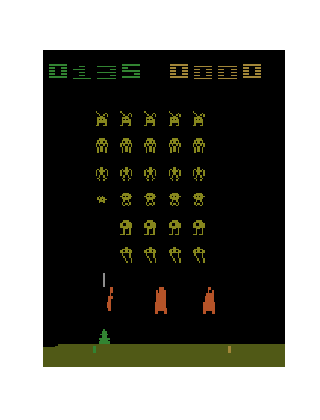
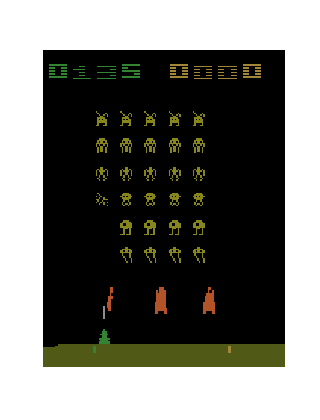
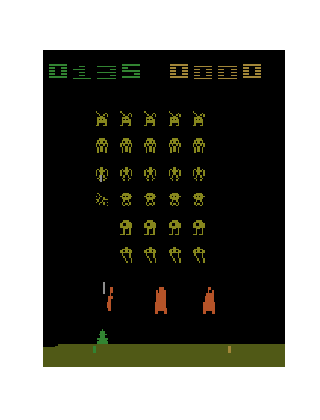
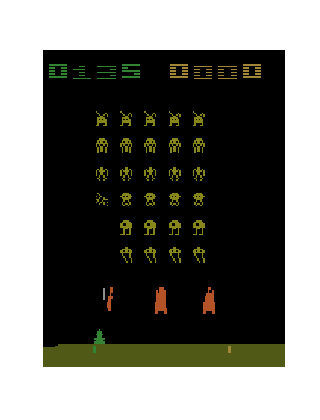
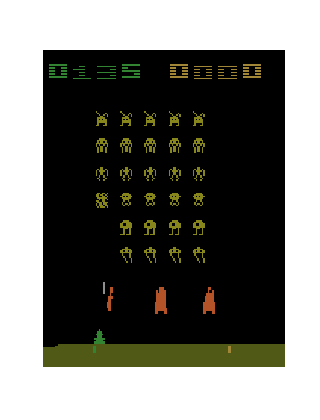
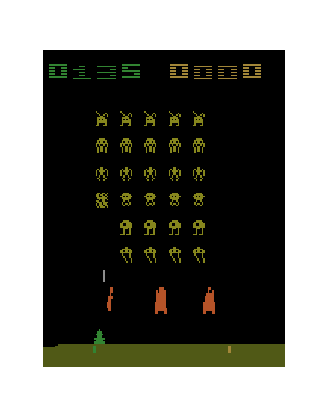
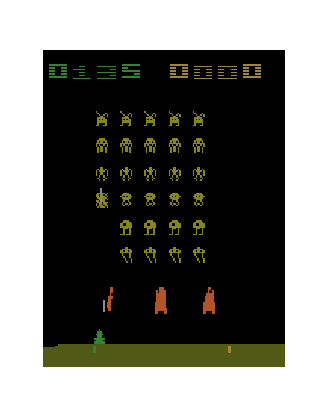
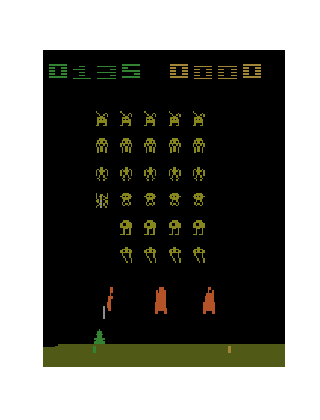
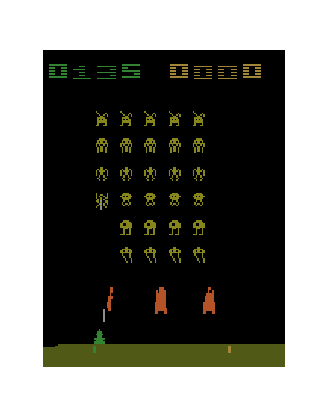
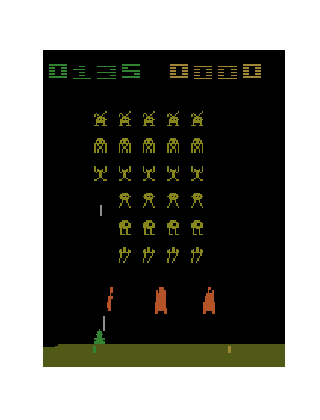
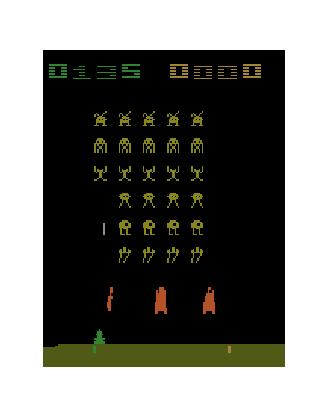
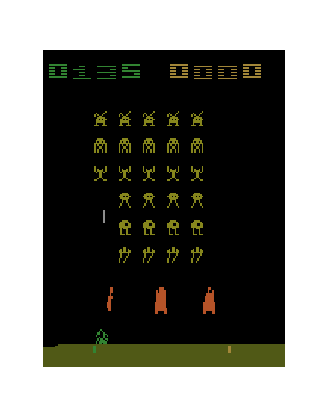
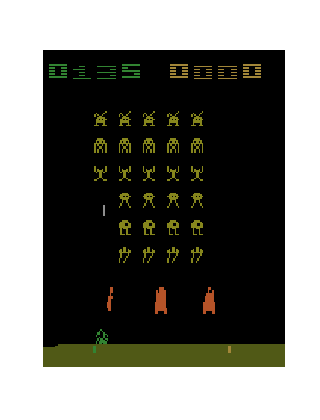
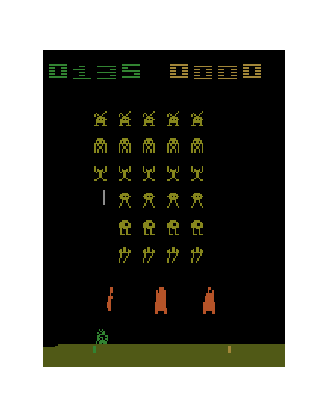
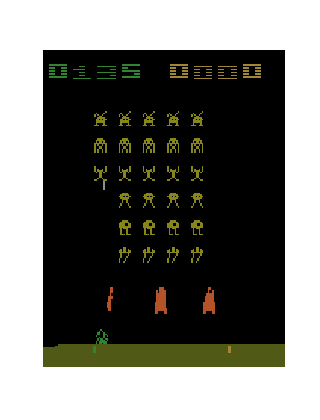
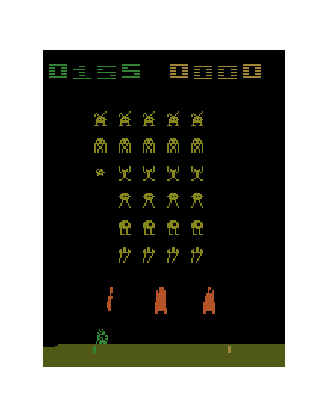
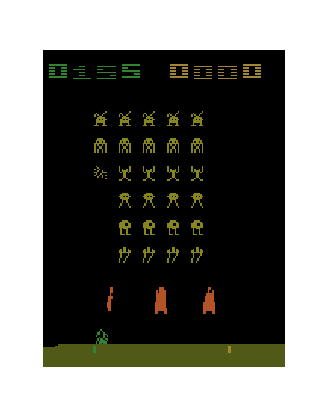
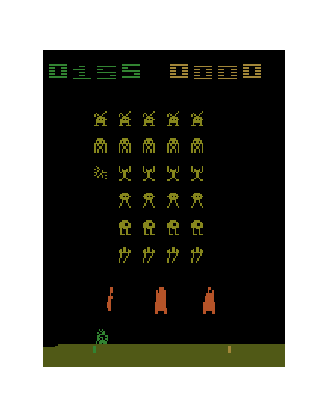
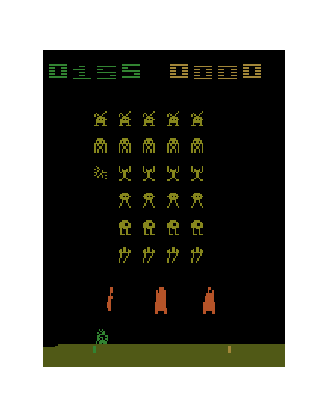
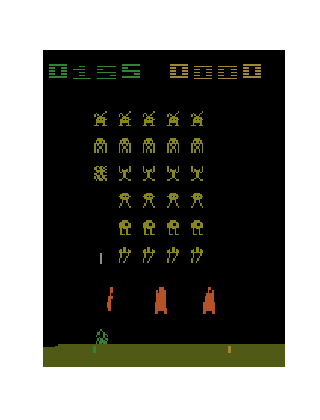
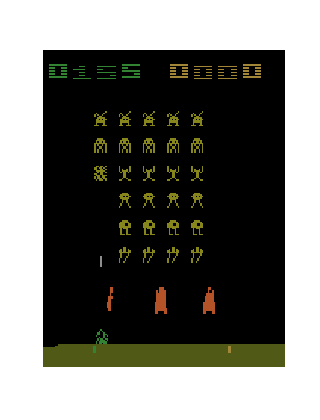
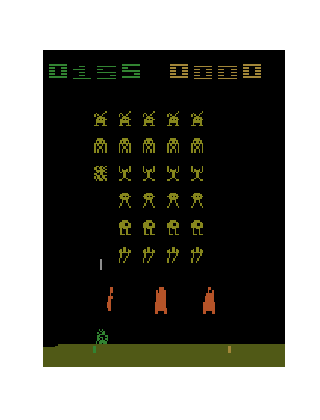
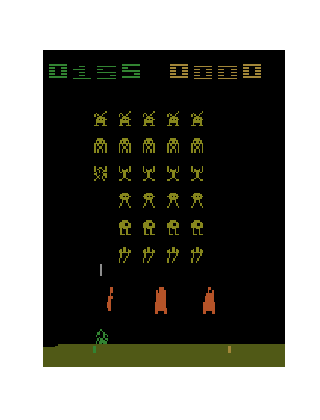
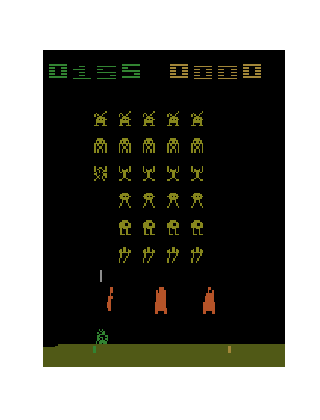
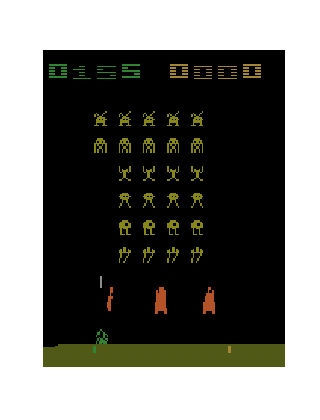
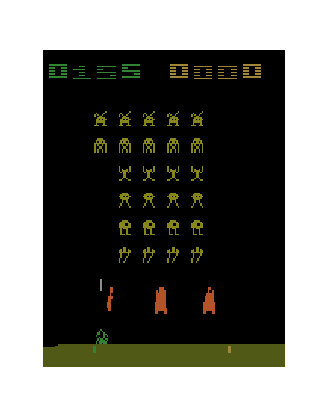
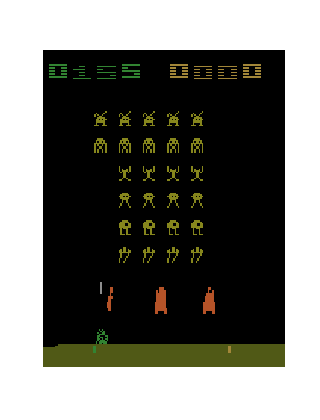
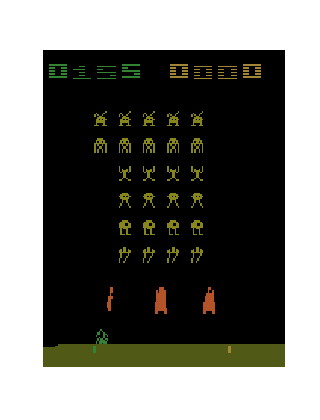
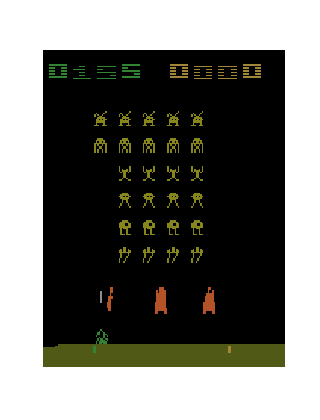
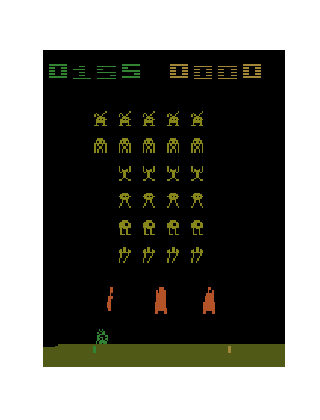
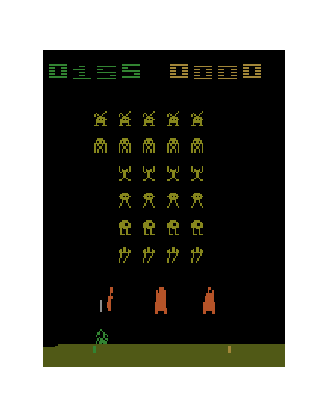
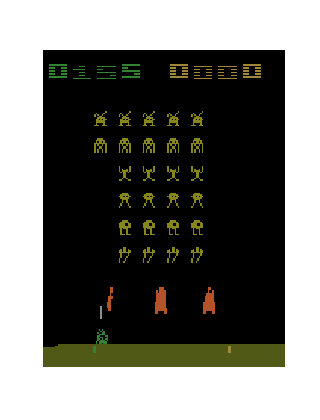
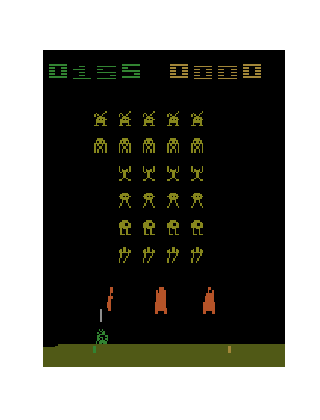
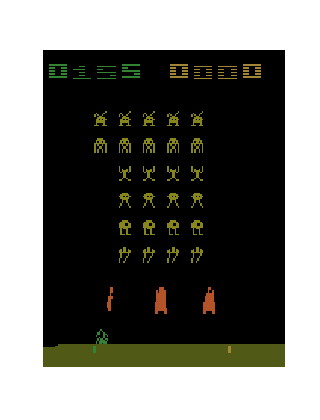
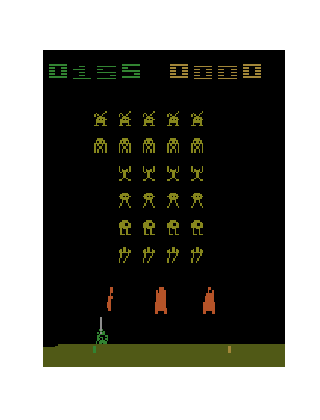
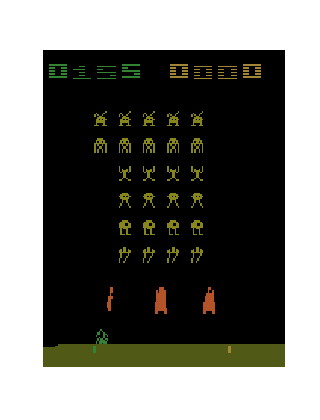
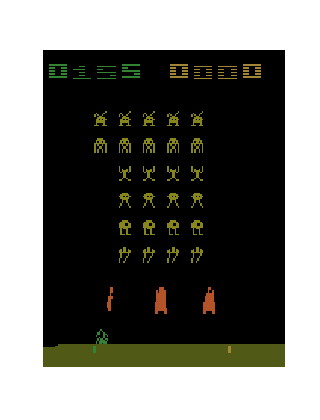
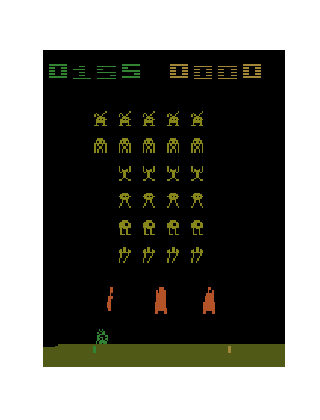
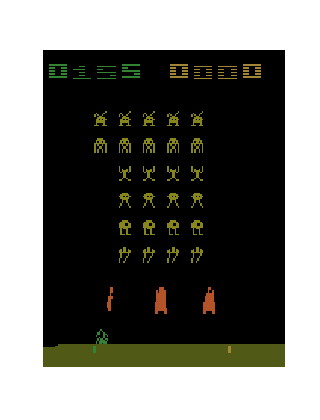
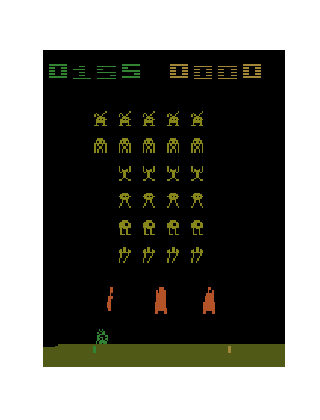
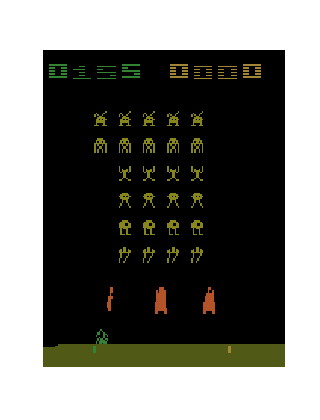
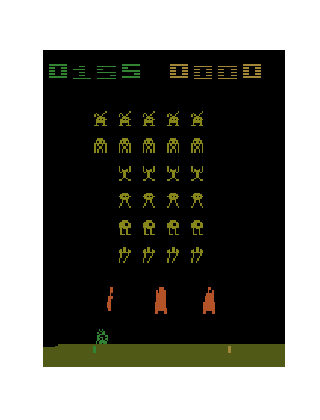
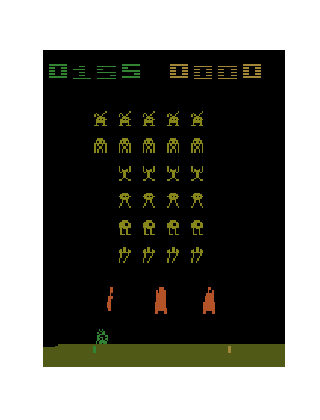
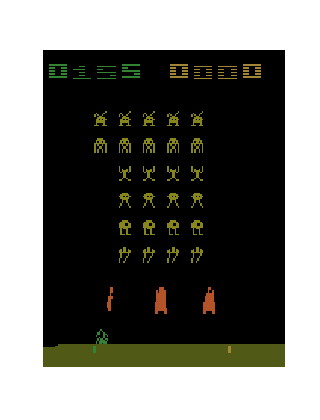
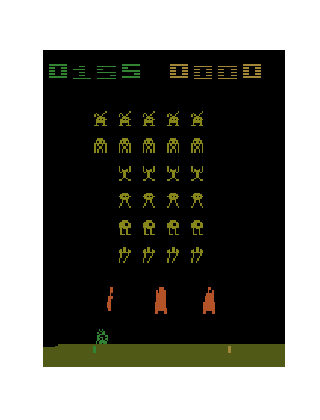
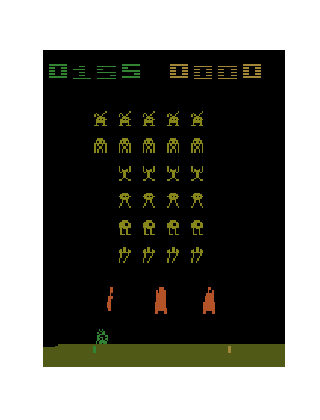
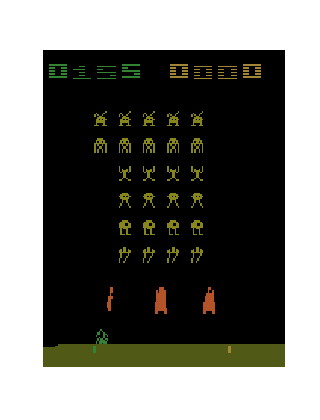
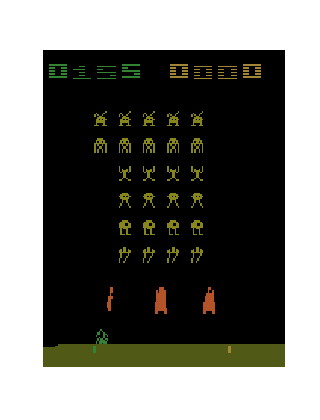
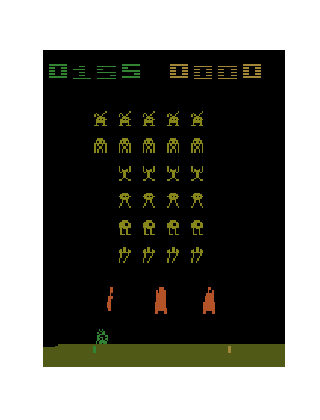
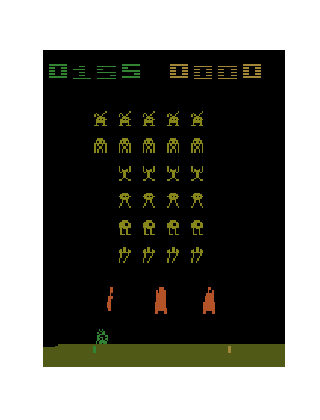
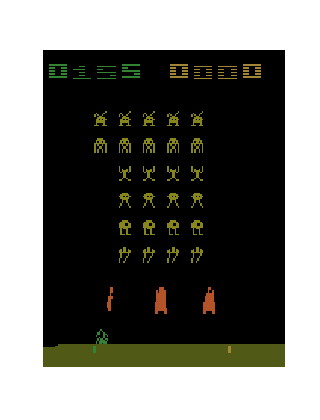
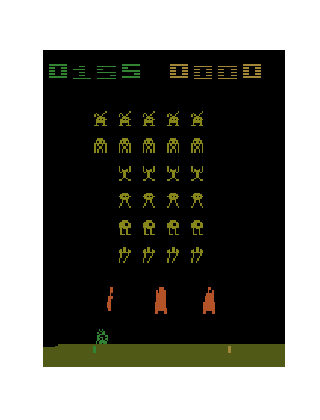
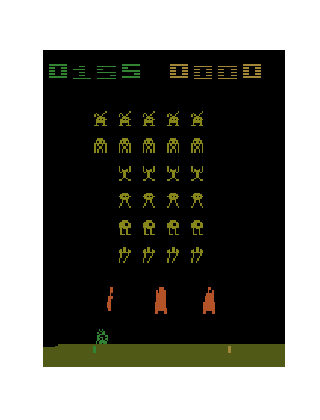
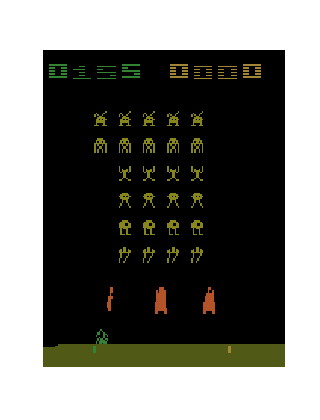
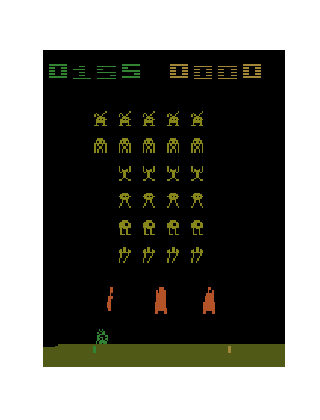
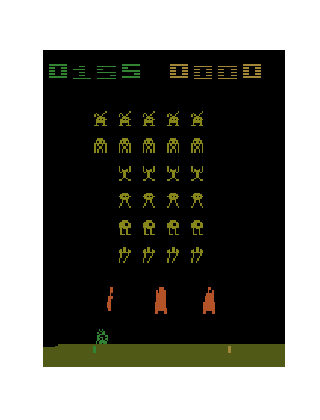

In [16]:
display_frames_as_gif(frames)

## Step 2b: Text based representations


## Step 3: Baselines